In [52]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Input, Bidirectional,SimpleRNN, Embedding, Conv1D, LSTM, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split



from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)


2.14.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('D:/senego/dataafrica/socialcons_clean2.csv')
# df = pd.read_csv('D:/senego/dataafrica/socialcons_clean2.csv')
#df = pd.read_csv('C:/Users/Administrator/OneDrive/Documents/africa/dataafrica/socialcons_clean.csv', encoding = "UTF-8")
# df=pd.read_csv('D:/senego/dataafrica/analysis/new_dataset2_aspects.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_dataset2_aspects.csv')
df=df.astype(str)
df.head(5)

Unnamed: 0.7 Unnamed: 0.6 Unnamed: 0.5 Unnamed: 0.4 Unnamed: 0.3  \
0            1            1            1            1            1   
1           25           25           25           25           25   
2           27           27           27           27           27   
3           33           33           33           33           33   
4           34           34           34           34           34   

  Unnamed: 0.2 Unnamed: 0.1 Unnamed: 0 textid  \
0            1            1          7     14   
1           25           25         38     62   
2           27           27         53     88   
3           33           33         94    223   
4           34           34         96    230   

                                             alltext  ...  \
0  i had a truly interesting exchange of view tod...  ...   
1  loneliness is stressful and carries the same h...  ...   
2  @uct_vc higher education should really foster ...  ...   
3  @errolbsk @pungutja our problem in sa is toler...  ...   
4  in south africa; given the inequalities we hav...  ...   

                                       Opinion_Words Sentiment_Labels  \
0                                  truly interesting          neutral   
1             alcoholic obese traditional amp public         negative   
2  higher really professional especially contribu...         positive   
3                                  last amp economic         negative   
4          still black young unemployed psychosocial         negative   

    Emotion Emotional_Polarity Common_Sentiment32 Bert_aspects Sentimentall  \
0     trust           positive           positive     positive     positive   
1  negative           negative           conflict     negative     negative   
2  positive           positive           positive     positive     positive   
3  negative           negative           conflict     negative     negative   
4  negative           negative           negative     negative     negative   

  Sentiment2 Sentiment2_prediction Predicted_Labels  
0          2              positive                2  
1          0              negative                0  
2          2              positive                2  
3          0              negative                0  
4          0              negative                0  

[5 rows x 57 columns]

In [ ]:
df.shape

(52043, 57)

In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels'],
      dtype='object')

In [ ]:
# import pandas as pd

# # Assuming you already have the df2 DataFrame and df21 is a subset of it
# df21 = df2[['textid', 'alltext', 'sourcetype', 'Text_lemma', 'bert_umap', 'Bert_label','Name_x', 'Keysector']]

# # Shuffle the rows of df21
# df21 = df21.sample(frac=1).reset_index(drop=True)

# # Rename the 'Name_x' column to 'topic'
# df21 = df21.rename(columns={'Name_x': 'topic', 'Bert_label':'cluster'})

# # Display the first 10 rows of the shuffled DataFrame
# df21.head(10)


**Extract year and month**

In [ ]:
# import pandas as pd

# Assuming 'Date_Extracted' is in a non-datetime format (e.g., string)
# Convert it to a datetime data type
df['Date_Extracted'] = pd.to_datetime(df['Date_Extracted'])

# Now you can use .dt accessor for datetime operations
df['year-month'] = df['Date_Extracted'].dt.to_period('M')
df['Date (by month)'] = [month.to_timestamp() for month in df['year-month']]


**Set year and month as Pandas Index**

In [ ]:
df = df.set_index('Date (by month)')

In [ ]:
# topic_number = 10

# topic_label = " ".join(topics[topic_number][:4])

# trump_df[topic_label].plot(style='.', title=f'Trump Tweets By Topic: \n{topic_label.title()}')

In [ ]:

df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month'],
      dtype='object')

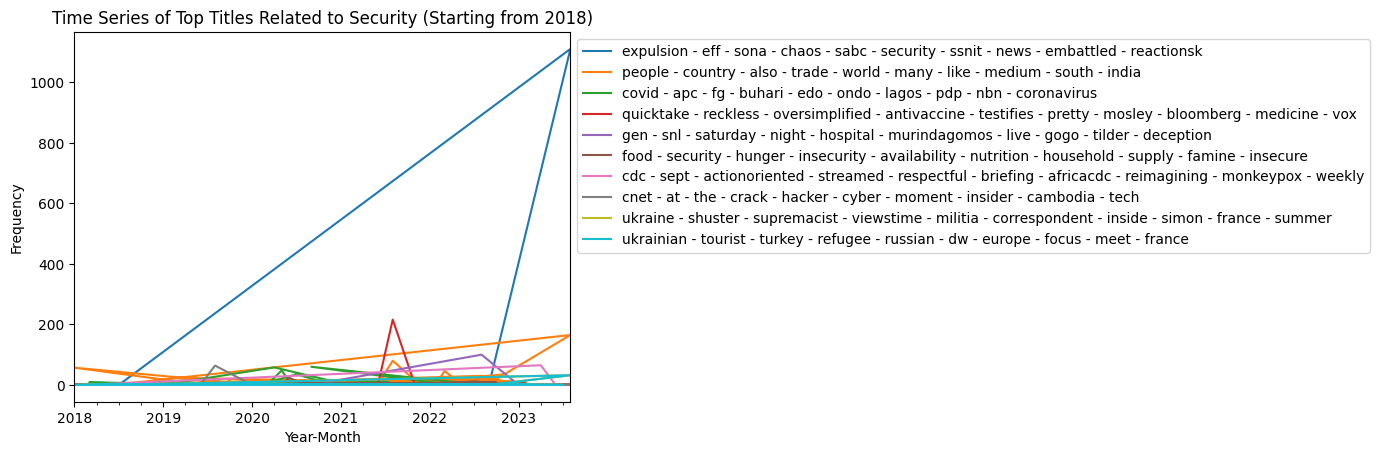

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Convert the 'Year_Extracted' column to integers
df['Year_Extracted'] = df['Year_Extracted'].astype(int)

# Filter the DataFrame to include only rows with 'Year_Extracted' >= 2018
df = df[df['Year_Extracted'] >= 2018]

# Filter the DataFrame to include rows where 'Keysector' is 'security'
security_df = df[df['Keysector'] == 'security']

# Group the DataFrame by 'year-month'
grouped = security_df.groupby('year-month')

# Create a dictionary to store the frequency of titles for each month
titles_freq = {month: {} for month in security_df['year-month'].unique()}

# Loop through each group (month) and calculate the frequency of titles
for month, group_data in grouped:
    # Get the titles (unique values) from the 'Top_n_words' column for this month
    titles = group_data['Top_n_words'].unique()

    # Calculate the frequency of each title and store it in a dictionary
    title_freq = group_data['Top_n_words'].value_counts().to_dict()

    # Store the frequency of titles for this month
    titles_freq[month] = title_freq

# Define the top titles (you can adjust this based on your data)
# Here, we'll take the top ten titles based on the overall frequency
top_titles = security_df['Top_n_words'].value_counts().head(10).index.tolist()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the time series for each of the top titles
for title in top_titles:
    title_freq_series = pd.Series({month: titles_freq[month].get(title, 0) for month in security_df['year-month'].unique()})
    title_freq_series.plot(label=title)

# Position the legend outside of the graph
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Time Series of Top Titles Related to Security (Starting from 2018)')
plt.show()


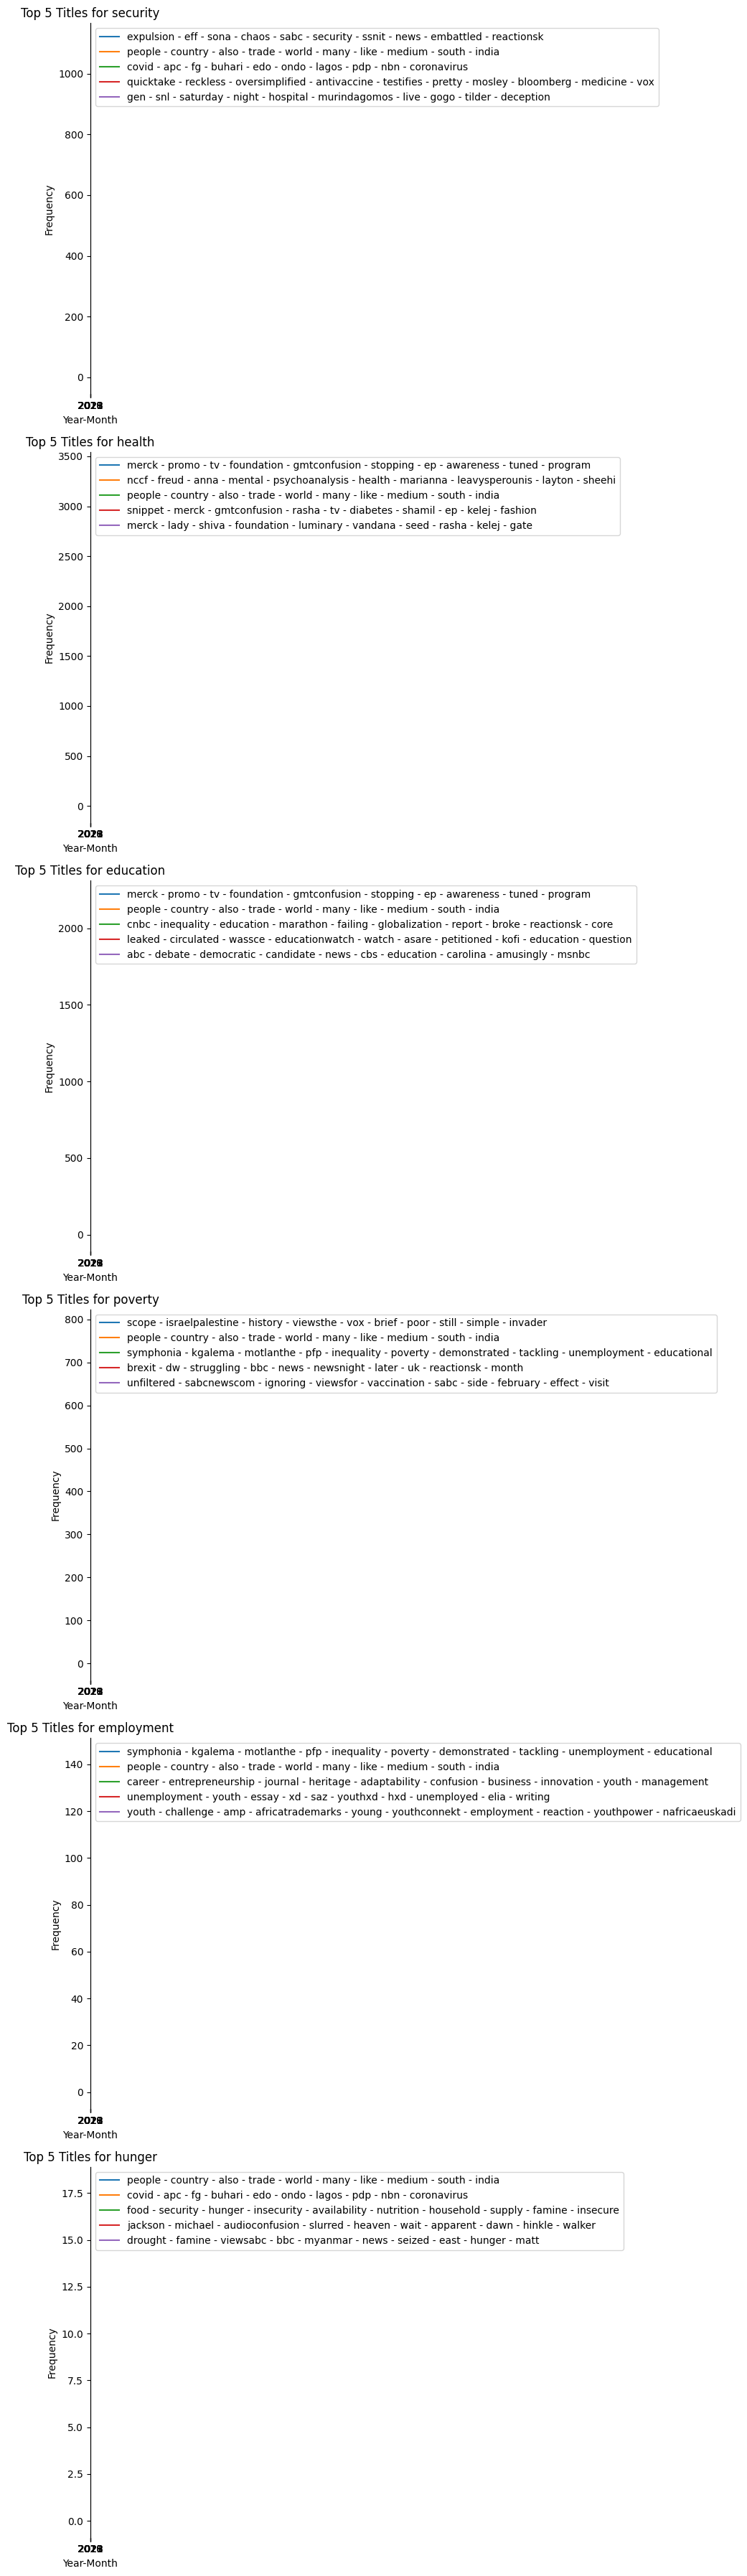

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Convert the 'Year_Extracted' column to integers
df['Year_Extracted'] = df['Year_Extracted'].astype(int)

# Filter the DataFrame to include only rows with 'Year_Extracted' >= 2018
df = df[df['Year_Extracted'] >= 2018]

# Get unique values in the 'Keysector' column
unique_sectors = df['Keysector'].unique()

# Create subplots for each unique 'Keysector' value
fig, axs = plt.subplots(len(unique_sectors), figsize=(10, 6 * len(unique_sectors)))

# Iterate through each unique 'Keysector' value and create a subplot
for i, sector in enumerate(unique_sectors):
    # Filter the DataFrame for the current sector
    sector_df = df[df['Keysector'] == sector]

    # Group the DataFrame by 'year-month'
    grouped = sector_df.groupby('year-month')

    # Create a dictionary to store the frequency of titles for each month
    titles_freq = {month: {} for month in sector_df['year-month'].unique()}

    # Loop through each group (month) and calculate the frequency of titles
    for month, group_data in grouped:
        # Get the titles (unique values) from the 'Top_n_words' column for this month
        titles = group_data['Top_n_words'].unique()

        # Calculate the frequency of each title and store it in a dictionary
        title_freq = group_data['Top_n_words'].value_counts().to_dict()

        # Store the frequency of titles for this month
        titles_freq[month] = title_freq

    # Define the top titles for the current sector (top 5)
    top_titles = sector_df['Top_n_words'].value_counts().head(5).index.tolist()

    # Plot the time series for each of the top titles for the current sector
    for title in top_titles:
        title_freq_series = pd.Series({month: titles_freq[month].get(title, 0) for month in sector_df['year-month'].unique()})
        title_freq_series.plot(label=title, ax=axs[i])

    # Set titles and labels for the subplot
    axs[i].set_xlabel('Year-Month')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Top 5 Titles for {sector}')
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


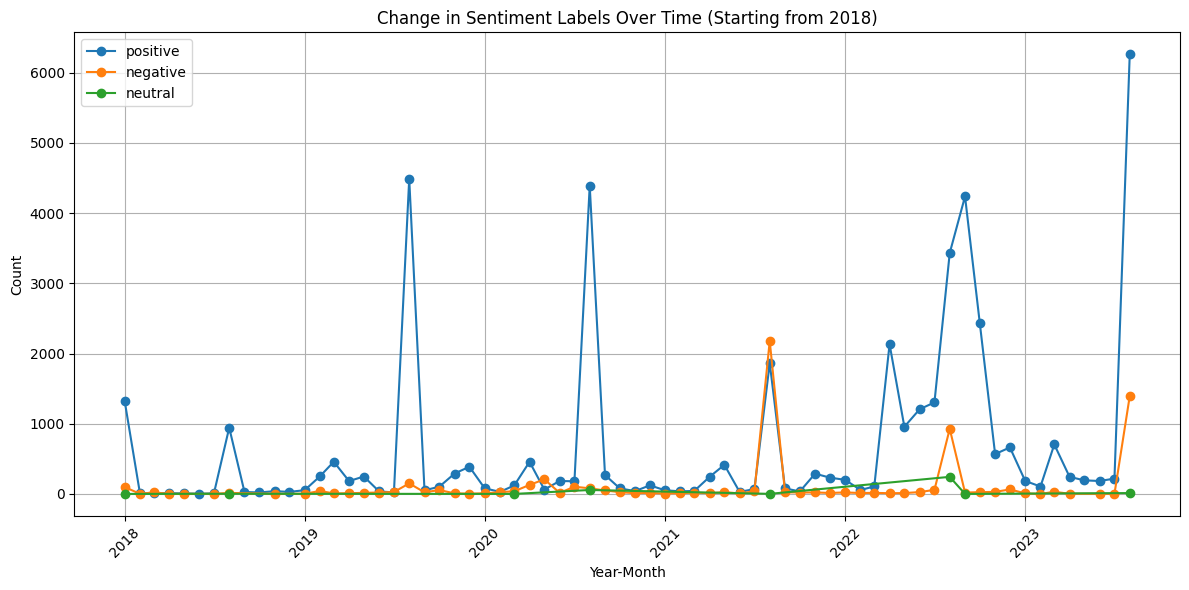

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Ensure that the 'year-month' column is consistently in string format
df['year-month'] = df['year-month'].astype(str)

# Convert the 'year-month' column to datetime format and set it as the index
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Filter the DataFrame to include only rows from January 2018 onwards
df = df[df['year-month'] >= '2018-01-01']

# Create a label encoder to convert sentiment categories to numerical values
label_encoder = LabelEncoder()

# Encode the 'Sentiment_vad' column and store it in a new column 'Sentiment_encoded'
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment2_prediction'])

# Separate the DataFrame into three DataFrames for each sentiment label
positive_df = df[df['Sentiment_encoded'] == label_encoder.transform(['positive'])[0]]
negative_df = df[df['Sentiment_encoded'] == label_encoder.transform(['negative'])[0]]
neutral_df = df[df['Sentiment_encoded'] == label_encoder.transform(['neutral'])[0]]

# Group the DataFrames by 'year-month' and calculate the count of each sentiment label for each month
positive_sentiment = positive_df.groupby(positive_df.index)['Sentiment_encoded'].count()
negative_sentiment = negative_df.groupby(negative_df.index)['Sentiment_encoded'].count()
neutral_sentiment = neutral_df.groupby(neutral_df.index)['Sentiment_encoded'].count()

# Create separate line plots for each sentiment label
plt.figure(figsize=(12, 6))
plt.plot(positive_sentiment.index, positive_sentiment.values, label='positive', marker='o', linestyle='-')
plt.plot(negative_sentiment.index, negative_sentiment.values, label='negative', marker='o', linestyle='-')
plt.plot(neutral_sentiment.index, neutral_sentiment.values, label='neutral', marker='o', linestyle='-')
plt.title('Change in Sentiment Labels Over Time (Starting from 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


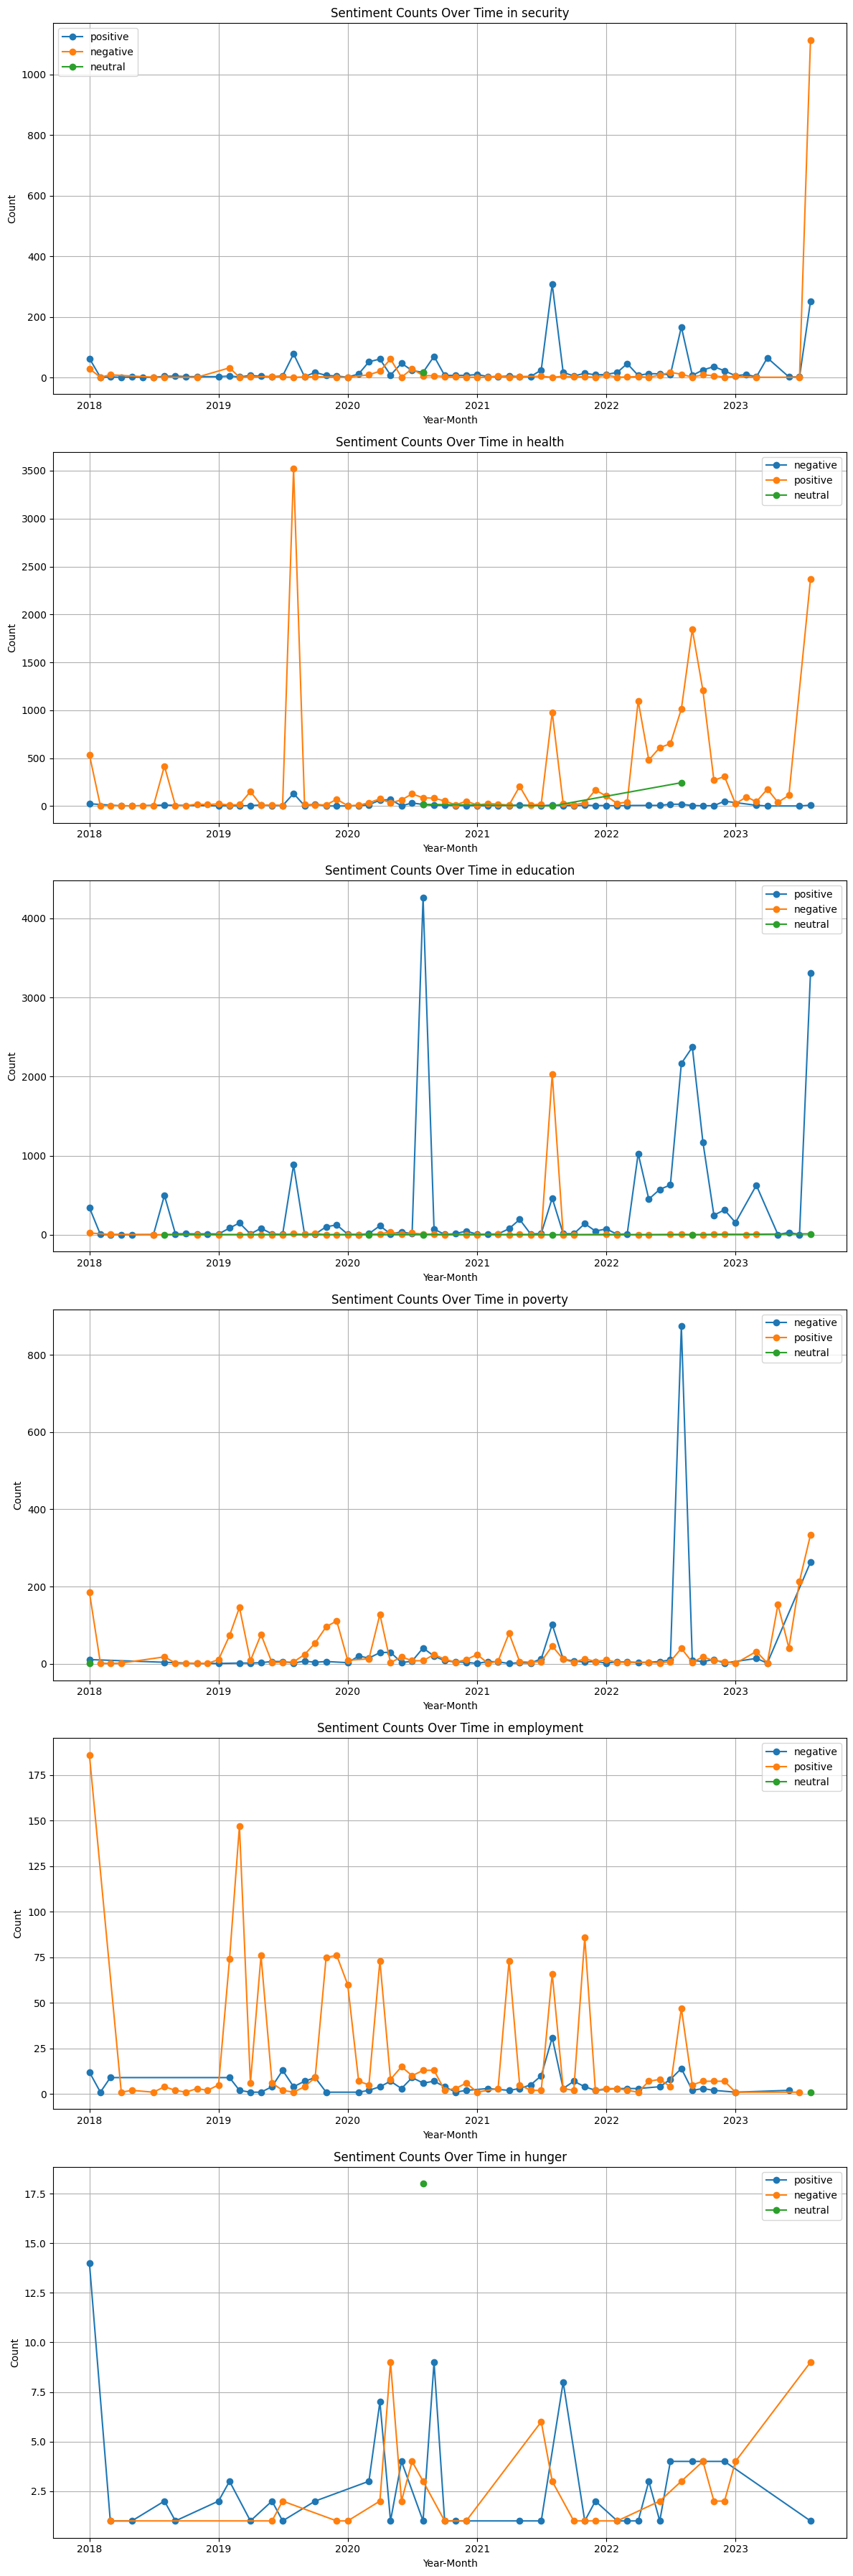

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Convert the 'year-month' column to datetime format (if not already in datetime)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Check the unique values in the 'Keysector' column
unique_sectors = df['Keysector'].unique()

# Create a label encoder to convert sentiment categories to numerical values
label_encoder = LabelEncoder()

# Create subplots for each unique 'Keysector' value
fig, axs = plt.subplots(len(unique_sectors), figsize=(12, 6 * len(unique_sectors)))

# Iterate through each unique 'Keysector' value and create subplots
for i, sector in enumerate(unique_sectors):
    # Filter the DataFrame for the current sector
    sector_df = df[df['Keysector'] == sector]

    # Check the unique sentiment values in the filtered DataFrame
    unique_sentiments = sector_df['Sentiment2_prediction'].unique()

    # Create a dictionary to store the encoded DataFrames for each sentiment label
    encoded_sentiment_data = {}

    # Encode each sentiment label and store it in the dictionary
    for sentiment in unique_sentiments:
        sentiment_encoded = label_encoder.fit_transform(sector_df[sector_df['Sentiment2_prediction'] == sentiment]['Sentiment2_prediction'])
        encoded_sentiment_data[sentiment] = sentiment_encoded

    # Group the encoded DataFrames by 'year-month' and calculate the count of each sentiment label for each month
    sentiment_counts = {}
    for sentiment, encoded_data in encoded_sentiment_data.items():
        sentiment_counts[sentiment] = sector_df[sector_df['Sentiment2_prediction'] == sentiment].groupby('year-month').size()

    # Create separate line plots for each sentiment label in the subplot
    axs[i].set_title(f'Sentiment Counts Over Time in {sector}')
    axs[i].set_xlabel('Year-Month')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

    for sentiment, counts in sentiment_counts.items():
        axs[i].plot(counts.index, counts.values, label=sentiment, marker='o', linestyle='-')

    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

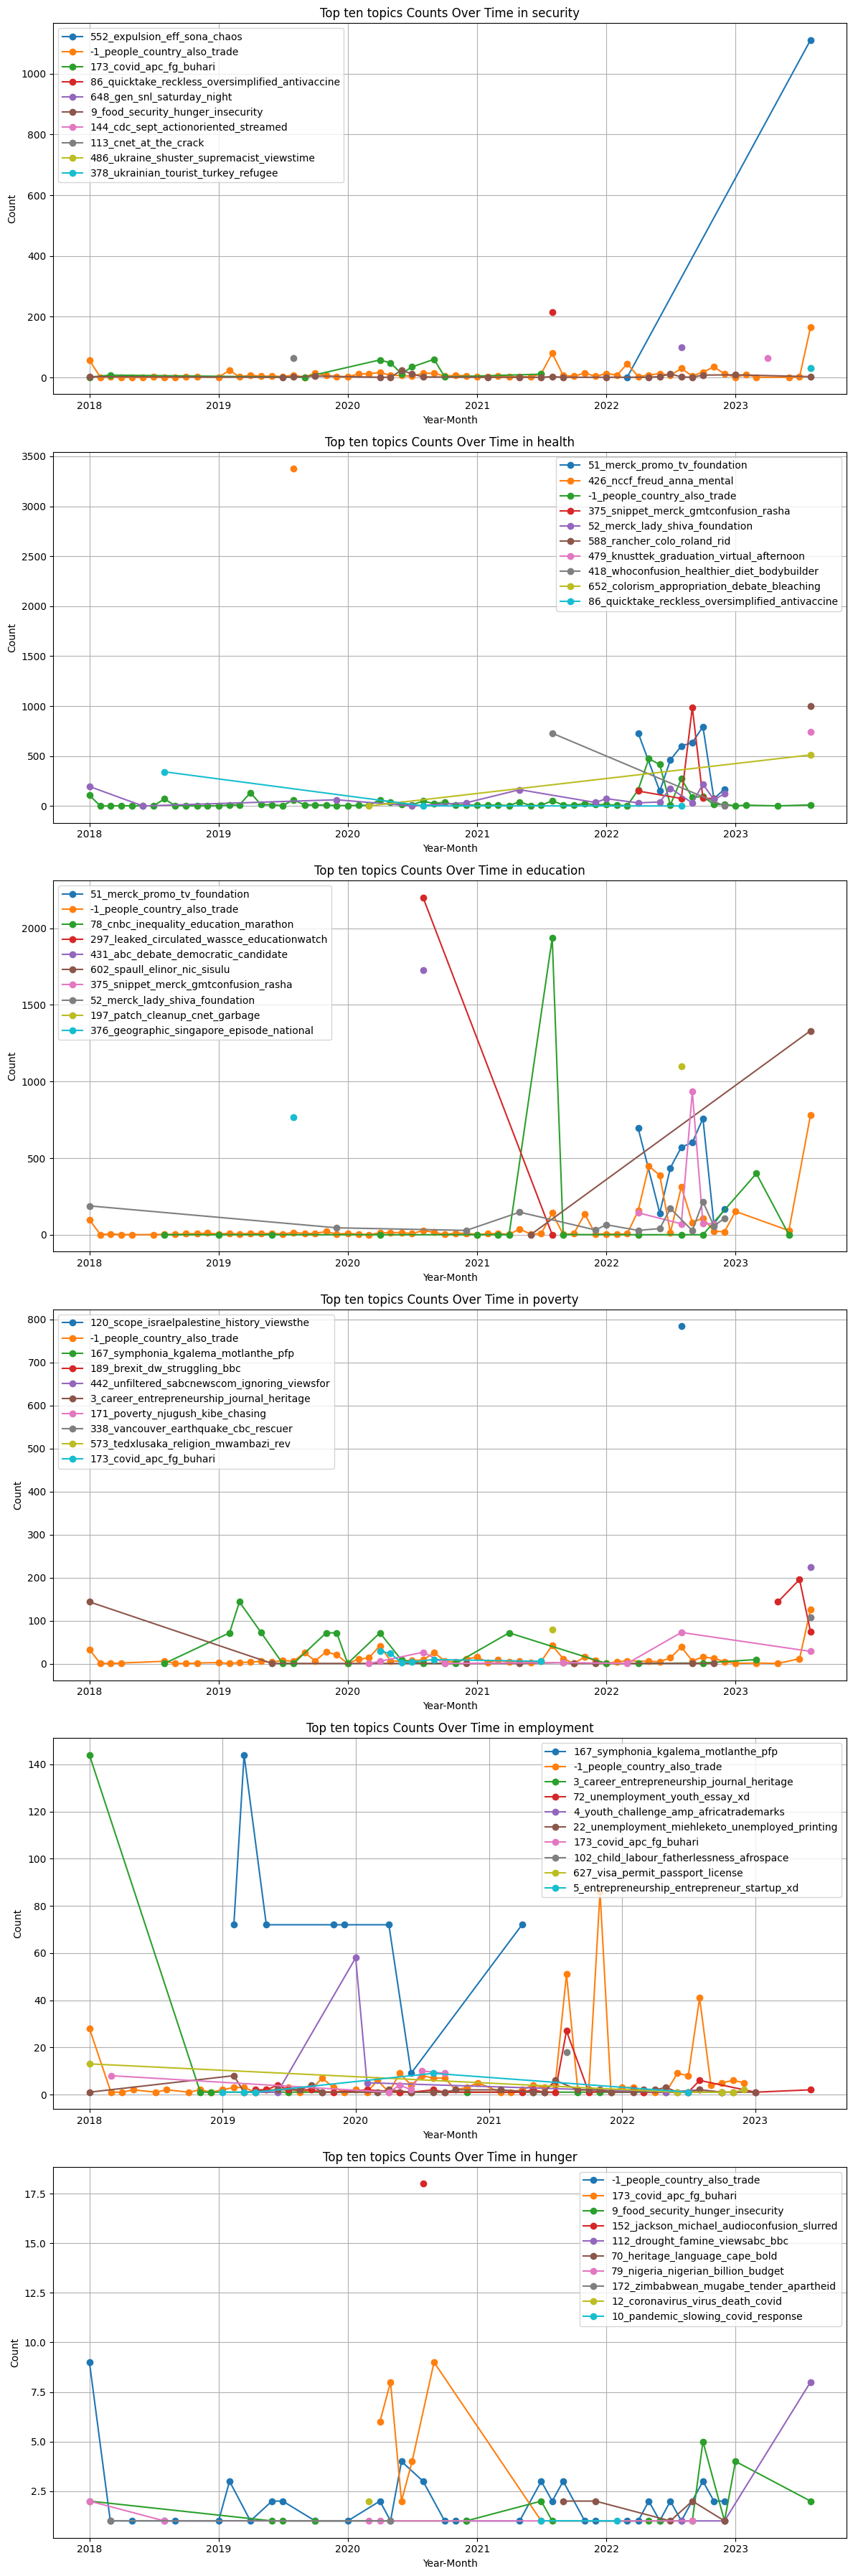

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Function to find the top ten common values in a series
def top_10_common_values(series):
    value_counts = series.value_counts()
    top_10_values = value_counts.nlargest(10)
    return top_10_values

# Convert the 'year-month' column to datetime format (if not already in datetime)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Check the unique values in the 'Keysector' column
unique_sectors = df['Keysector'].unique()

# Create a label encoder to convert sentiment categories to numerical values
label_encoder = LabelEncoder()

# Create subplots for each unique 'Keysector' value
fig, axs = plt.subplots(len(unique_sectors), figsize=(12, 6 * len(unique_sectors)))

# Iterate through each unique 'Keysector' value and create subplots
for i, sector in enumerate(unique_sectors):
    # Filter the DataFrame for the current sector
    sector_df = df[df['Keysector'] == sector]

    # Find the top ten common values in the 'Name_x' column for this sector
    top_10_names = top_10_common_values(sector_df['Name_x'])

    # Create a dictionary to store the encoded DataFrames for each sentiment label
    encoded_sentiment_data = {}

    # Encode each sentiment label and store it in the dictionary
    for sentiment in top_10_names.index:
        sentiment_encoded = label_encoder.fit_transform(sector_df[sector_df['Name_x'] == sentiment]['Name_x'])
        encoded_sentiment_data[sentiment] = sentiment_encoded

    # Group the encoded DataFrames by 'year-month' and calculate the count of each sentiment label for each month
    sentiment_counts = {}
    for sentiment, encoded_data in encoded_sentiment_data.items():
        sentiment_counts[sentiment] = sector_df[sector_df['Name_x'] == sentiment].groupby('year-month').size()

    # Create separate line plots for each sentiment label in the subplot
    axs[i].set_title(f'Top ten topics Counts Over Time in {sector}')
    axs[i].set_xlabel('Year-Month')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

    for sentiment, counts in sentiment_counts.items():
        axs[i].plot(counts.index, counts.values, label=sentiment, marker='o', linestyle='-')

    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


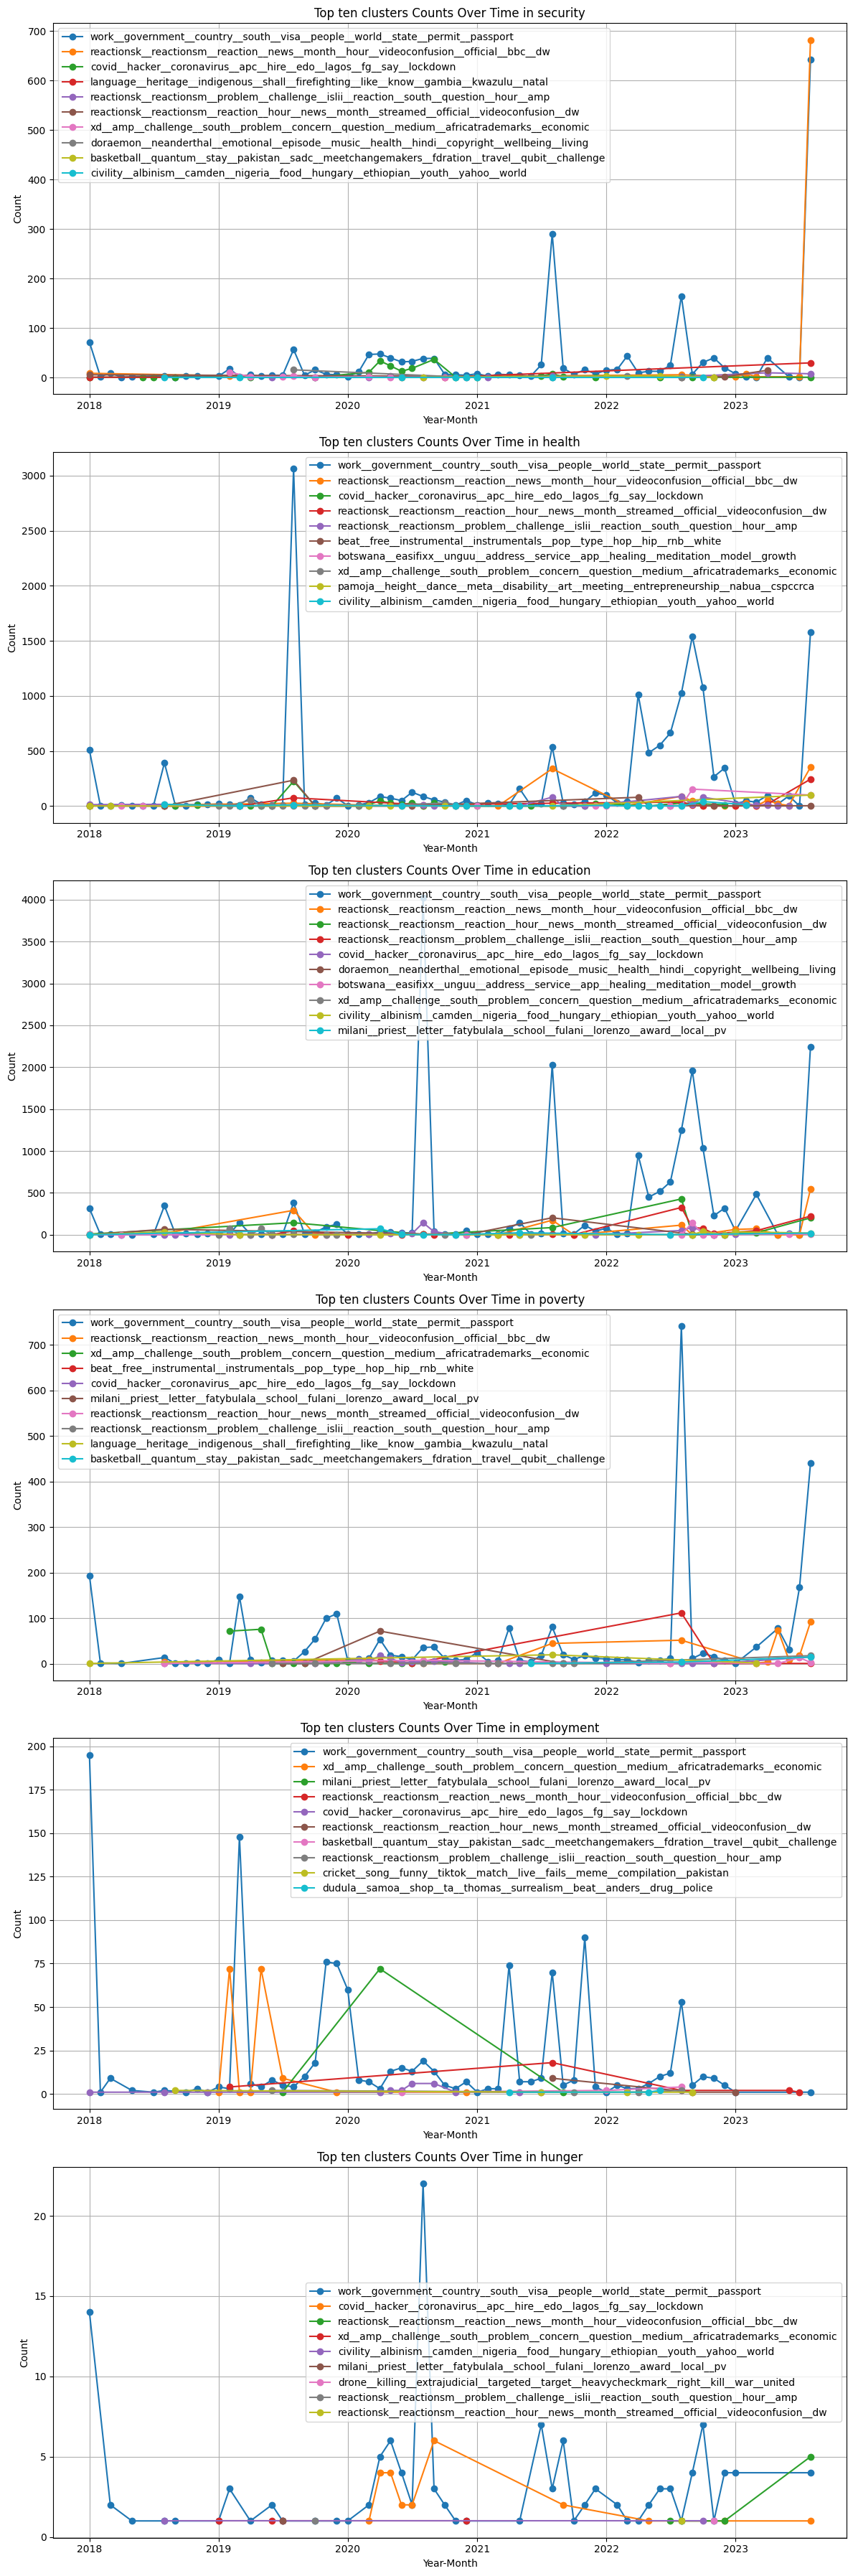

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Function to find the top ten common values in a series
def top_10_common_values(series):
    value_counts = series.value_counts()
    top_10_values = value_counts.nlargest(10)
    return top_10_values

# Convert the 'year-month' column to datetime format (if not already in datetime)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Check the unique values in the 'Keysector' column
unique_sectors = df['Keysector'].unique()

# Create a label encoder to convert sentiment categories to numerical values
label_encoder = LabelEncoder()

# Create subplots for each unique 'Keysector' value
fig, axs = plt.subplots(len(unique_sectors), figsize=(12, 6 * len(unique_sectors)))

# Iterate through each unique 'Keysector' value and create subplots
for i, sector in enumerate(unique_sectors):
    # Filter the DataFrame for the current sector
    sector_df = df[df['Keysector'] == sector]

    # Find the top ten common values in the 'Name_x' column for this sector
    top_10_names = top_10_common_values(sector_df['Bert_label'])

    # Create a dictionary to store the encoded DataFrames for each sentiment label
    encoded_sentiment_data = {}

    # Encode each sentiment label and store it in the dictionary
    for sentiment in top_10_names.index:
        sentiment_encoded = label_encoder.fit_transform(sector_df[sector_df['Bert_label'] == sentiment]['Bert_label'])
        encoded_sentiment_data[sentiment] = sentiment_encoded

    # Group the encoded DataFrames by 'year-month' and calculate the count of each sentiment label for each month
    sentiment_counts = {}
    for sentiment, encoded_data in encoded_sentiment_data.items():
        sentiment_counts[sentiment] = sector_df[sector_df['Bert_label'] == sentiment].groupby('year-month').size()

    # Create separate line plots for each sentiment label in the subplot
    axs[i].set_title(f'Top ten clusters Counts Over Time in {sector}')
    axs[i].set_xlabel('Year-Month')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

    for sentiment, counts in sentiment_counts.items():
        axs[i].plot(counts.index, counts.values, label=sentiment, marker='o', linestyle='-')

    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


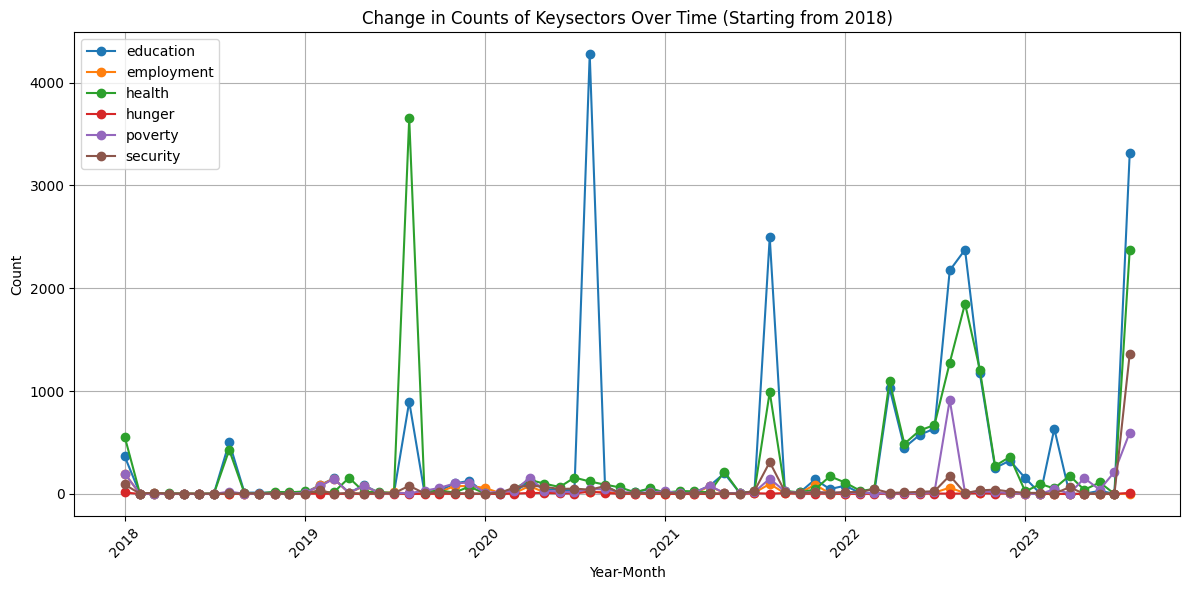

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Ensure that the 'year-month' column is consistently in string format
df['year-month'] = df['year-month'].astype(str)

# Convert the 'year-month' column to datetime format and set it as the index
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Filter the DataFrame to include only rows from January 2018 onwards
df = df[df['year-month'] >= '2018-01-01']

# Group the DataFrame by 'year-month' and 'Keysector' and calculate the count of each 'Keysector' for each month
keysector_counts = df.groupby(['year-month', 'Keysector']).size().unstack(fill_value=0)

# Create a line plot to show the counts of each 'Keysector' over time
plt.figure(figsize=(12, 6))
for keysector in keysector_counts.columns:
    plt.plot(keysector_counts.index, keysector_counts[keysector], label=keysector, marker='o', linestyle='-')

plt.title('Change in Counts of Keysectors Over Time (Starting from 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


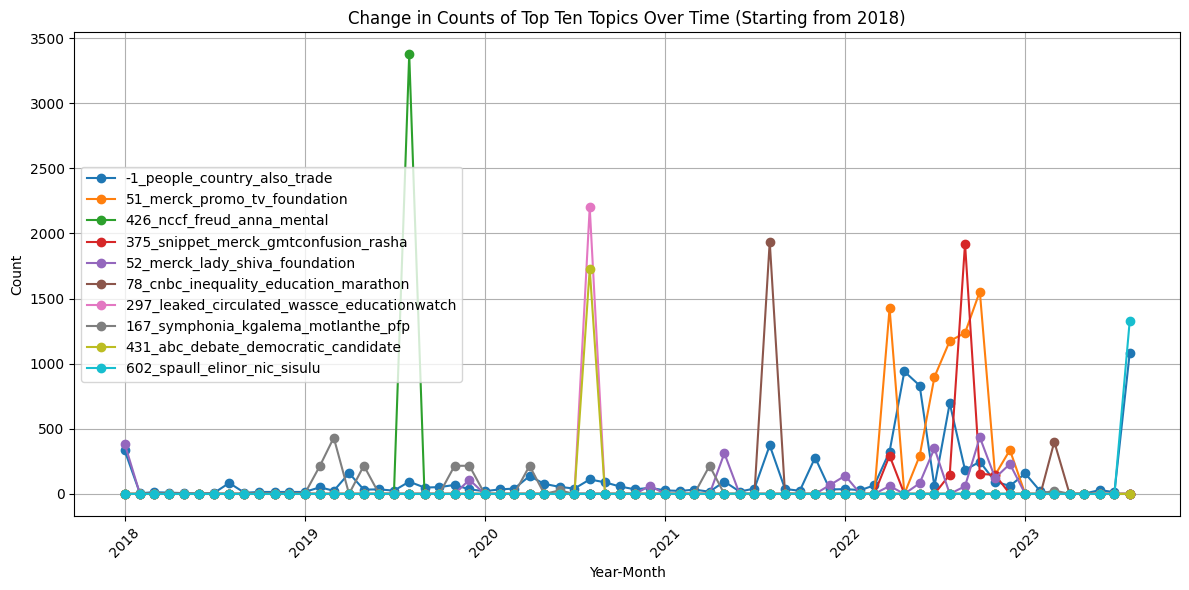

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Ensure that the 'year-month' column is consistently in string format
df['year-month'] = df['year-month'].astype(str)

# Convert the 'year-month' column to datetime format and set it as the index
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Filter the DataFrame to include only rows from January 2018 onwards
df = df[df['year-month'] >= '2018-01-01']

# Function to find the top ten common values in a series
def top_10_common_values(series):
    value_counts = series.value_counts()
    top_10_values = value_counts.nlargest(10)
    return top_10_values

# Find the top ten common values in the 'Keysector' column
top_10_keysectors = top_10_common_values(df['Name_x'])

# Group the DataFrame by 'year-month' and 'Keysector' and calculate the count of each 'Keysector' for each month
keysector_counts = df.groupby(['year-month', 'Name_x']).size().unstack(fill_value=0)

# Create a line plot to show the counts of the top ten 'Keysectors' over time
plt.figure(figsize=(12, 6))
for keysector in top_10_keysectors.index:
    plt.plot(keysector_counts.index, keysector_counts[keysector], label=keysector, marker='o', linestyle='-')

plt.title('Change in Counts of Top Ten Topics Over Time (Starting from 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


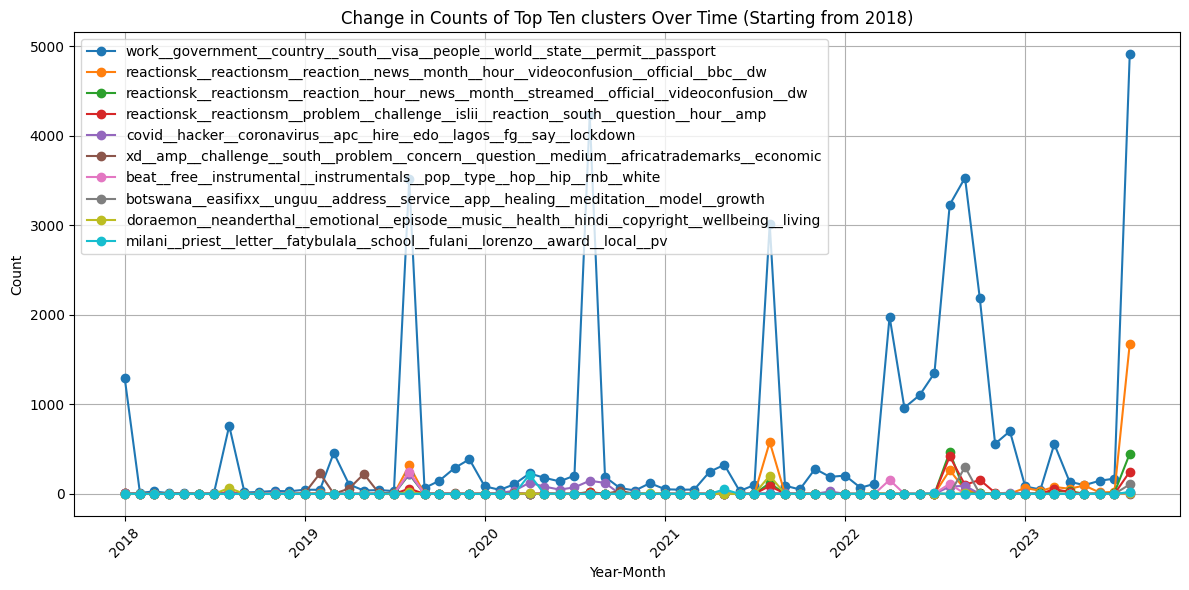

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Ensure that the 'year-month' column is consistently in string format
df['year-month'] = df['year-month'].astype(str)

# Convert the 'year-month' column to datetime format and set it as the index
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Filter the DataFrame to include only rows from January 2018 onwards
df = df[df['year-month'] >= '2018-01-01']

# Function to find the top ten common values in a series
def top_10_common_values(series):
    value_counts = series.value_counts()
    top_10_values = value_counts.nlargest(10)
    return top_10_values

# Find the top ten common values in the 'Keysector' column
top_10_keysectors = top_10_common_values(df['Bert_label'])

# Group the DataFrame by 'year-month' and 'Keysector' and calculate the count of each 'Keysector' for each month
keysector_counts = df.groupby(['year-month', 'Bert_label']).size().unstack(fill_value=0)

# Create a line plot to show the counts of the top ten 'Keysectors' over time
plt.figure(figsize=(12, 6))
for keysector in top_10_keysectors.index:
    plt.plot(keysector_counts.index, keysector_counts[keysector], label=keysector, marker='o', linestyle='-')

plt.title('Change in Counts of Top Ten clusters Over Time (Starting from 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


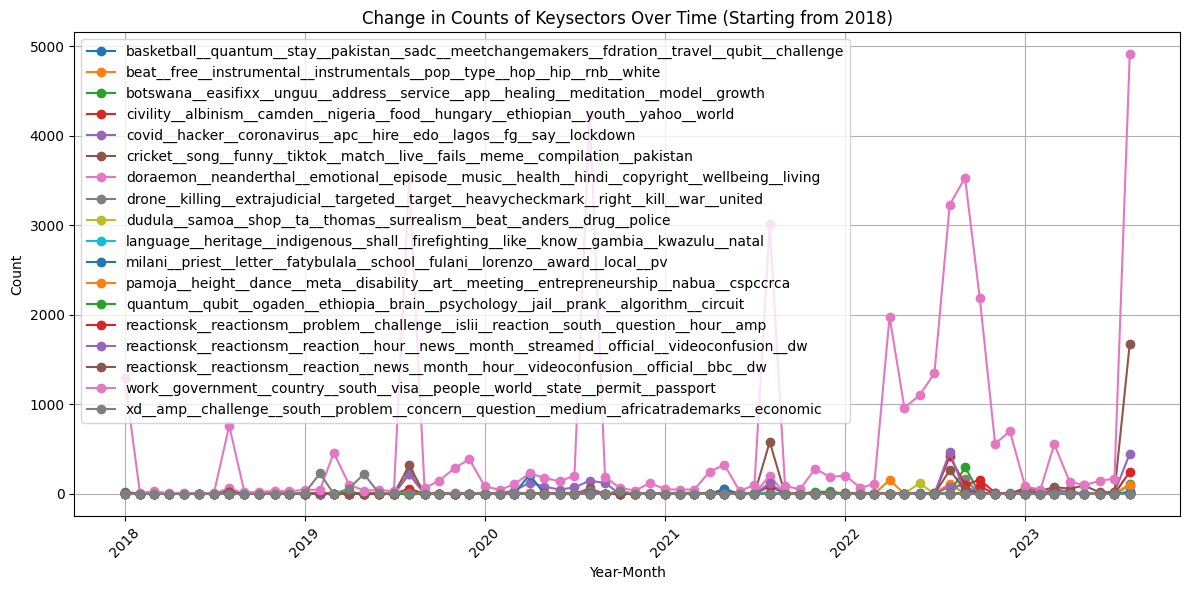

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the provided columns
# If not, load your DataFrame here

# Ensure that the 'year-month' column is consistently in string format
df['year-month'] = df['year-month'].astype(str)

# Convert the 'year-month' column to datetime format and set it as the index
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# Filter the DataFrame to include only rows from January 2018 onwards
df = df[df['year-month'] >= '2018-01-01']

# Group the DataFrame by 'year-month' and 'Keysector' and calculate the count of each 'Keysector' for each month
keysector_counts = df.groupby(['year-month', 'Bert_label']).size().unstack(fill_value=0)

# Create a line plot to show the counts of each 'Keysector' over time
plt.figure(figsize=(12, 6))
for keysector in keysector_counts.columns:
    plt.plot(keysector_counts.index, keysector_counts[keysector], label=keysector, marker='o', linestyle='-')

plt.title('Change in Counts of Keysectors Over Time (Starting from 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### ADF testing for non stationality data with low p-value

In [ ]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


# Group by 'Keysector' and 'Date' and count the posts
aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='M')])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Posts']
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
monthly_os=aggr_df.copy()

In [ ]:
monthly_OS=aggr_df.copy()
monthly_OS.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Assuming 'monthly_OS' is your time series data in the DataFrame
# You may want to select a specific column from your DataFrame, e.g., monthly_os['Posts']

print('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_os['Posts'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Print the results
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                  -2.929123
p-value                          0.042065
#Lags Used                      11.000000
Number of Observations Used    356.000000
dtype: float64


Interpretation:
Based on the Dickey-Fuller Test results, we can conclude the following:

The Test Statistic is sufficiently negative, indicating that the data is likely stationary.
The p-value is less than the commonly used significance level of 0.05, further supporting the conclusion that the data is stationary.
The number of lags used and the number of observations used are adequate for the analysis.
In summary, the results of the Dickey-Fuller Test suggest that the time series data is stationary, which is a key assumption for many time series models and analyses.

In [ ]:
# Assuming 'Value' is the column you want to calculate rolling statistics for
moving_avg = monthly_OS['Posts'].rolling(12).mean()
moving_std = monthly_OS['Posts'].rolling(12).std()


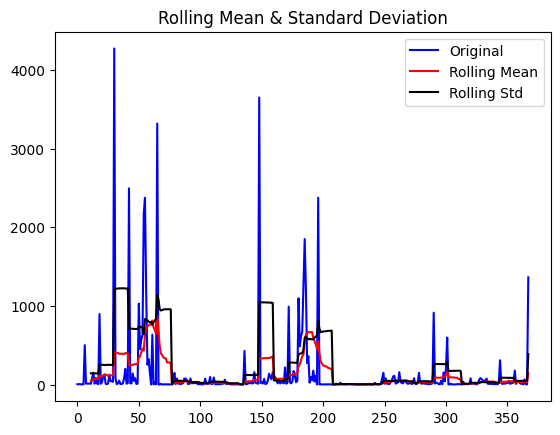

In [ ]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS['Posts'], color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Assuming 'monthly_OS' contains the DataFrame with 'Posts' column
print('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS['Posts'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.929123
p-value                          0.042065
#Lags Used                      11.000000
Number of Observations Used    356.000000
Critical Value (1%)             -3.448853
Critical Value (5%)             -2.869693
Critical Value (10%)            -2.571114
dtype: float64


The Dickey-Fuller Test is used to assess the stationarity of a time series data set. The results of the test include the Test Statistic, p-value, the number of lags used, the number of observations used, and critical values at different significance levels. Let's interpret these results:

Test Statistic:

The Test Statistic in your result is approximately -2.929123.
The Test Statistic is a measure of how strongly a time series is trending or not. In the Dickey-Fuller Test, it is used to determine the stationarity of the data.
A more negative (lower in absolute value) Test Statistic suggests stronger evidence for the presence of stationarity in the data. In this case, the Test Statistic is negative, which is a good sign for stationarity.
p-value:

The p-value associated with the test statistic is approximately 0.042065.
The p-value is a measure of the evidence against a null hypothesis in hypothesis testing.
In the context of the Dickey-Fuller Test, a lower p-value indicates a stronger rejection of the null hypothesis, which suggests that the data is stationary. Typically, if the p-value is less than a significance level (such as 0.05), you would reject the null hypothesis.
In this case, the p-value is less than 0.05, indicating that you can reject the null hypothesis, which supports the conclusion of stationarity.
#Lags Used:

The number of lags used is 11.
Lags are the past values of the time series that are included in the test. More lags capture longer-term dependencies in the data.
Number of Observations Used:

The number of observations used in the test is 356.
This represents the number of data points used in the analysis. Having an adequate number of data points is important for reliable results.
Critical Values:

The critical values represent threshold values at different significance levels (1%, 5%, and 10%) used to compare with the Test Statistic.
If the Test Statistic is more negative (i.e., farther from zero) than the critical values, it provides stronger evidence for stationarity.
In this case, the Test Statistic is more negative than the critical values at the 1%, 5%, and 10% levels, further supporting the evidence for stationarity.
Interpretation:
Based on the Dickey-Fuller Test results, it is reasonable to conclude that the time series data is likely stationary. The Test Statistic is sufficiently negative, the p-value is less than 0.05, and the Test Statistic is more negative than the critical values at different significance levels, all indicating stationarity in the data. This is an important finding for various time series analyses and modeling.






## <a id='3.1'>3.1. Trends, seasonality and noise</a>
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

## 2. The Prophet Forecasting Model

Now, let's take a closer look at how Prophet works. In its essence, this library utilizes the [additive regression model](https://en.wikipedia.org/wiki/Additive_model) $y(t)$ comprising the following components:

$$y(t) = g(t) + s(t) + h(t) + \epsilon_{t},$$

where:
* Trend $g(t)$ models non-periodic changes.
* Seasonality $s(t)$ represents periodic changes.
* Holidays component $h(t)$ contributes information about holidays and events.

Below, we will consider some important properties of these model components.

### Trend

The Prophet library implements two possible trend models for $g(t)$.

The first one is called *Nonlinear, Saturating Growth*. It is represented in the form of the [logistic growth model](https://en.wikipedia.org/wiki/Logistic_function):

$$g(t) = \frac{C}{1+e^{-k(t - m)}},$$

where:
* $C$ is the carrying capacity (that is the curve's maximum value).
* $k$ is the growth rate (which represents "the steepness" of the curve).
* $m$ is an offset parameter.

This logistic equation allows modelling non-linear growth with saturation, that is when the growth rate of a value decreases with its growth. One of the typical examples would be representing the growth of the audience of an application or a website.

Actually, $C$ and $k$ are not necessarily constants and may vary over time. Prophet supports both automatic and manual tuning of their variability. The library can itself choose optimal points of trend changes by fitting the supplied historical data.

Also, Prophet allows analysts to manually set changepoints of the growth rate and capacity values at different points in time. For instance, analysts may have insights about dates of past releases that prominently influenced some key product indicators.

The second trend model is a simple *Piecewise Linear Model* with a constant rate of growth. It is best suited for problems without saturating growth.

### Seasonality

The seasonal component $s(t)$ provides a flexible model of periodic changes due to weekly and yearly seasonality.

Weekly seasonal data is modeled with dummy variables. Six new variables are added: `monday`, `tuesday`, `wednesday`, `thursday`, `friday`, `saturday`, which take values 0 or 1 depending on the day of the week. The feature `sunday` is not added because it would be a linear combination of the other days of the week, and this fact would have an adverse effect on the model.

Yearly seasonality model in Prophet relies on Fourier series.

Since [version 0.2](https://github.com/facebook/prophet) you can also use *sub-daily time series* and make *sub-daily forecasts* as well as employ the new *daily seasonality* feature.

### Holidays and Events

The component $h(t)$ represents predictable abnormal days of the year including those on irregular schedules, e.g., Black Fridays.

To utilize this feature, the analyst needs to provide a custom list of events.

### Error

The error term $\epsilon(t)$ represents information that was not reflected in the model. Usually it is modeled as normally distributed noise.

### Prophet Benchmarking

For a detailed description of the model and algorithms behind Prophet refer to the paper ["Forecasting at scale"](https://peerj.com/preprints/3190/) by Sean J. Taylor and Benjamin Letham.

The authors also compared their library with several other methods for time series forecasting. They used [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) as a measure of prediction accuracy. In this research, Prophet has shown substantially lower forecasting error than the other models.

Let's look closer at how the forcasting quality was measured in the article. To do this, we will need the formula of Mean Absolute Percentage Error.

Let $y_{i}$ be the *actual (historical) value* and $\hat{y}_{i}$ be the *forecast value* given by our model.

Then $e_{i} = y_{i} - \hat{y}_{i}$ is the *forecast error* and $p_{i} =\frac{\displaystyle e_{i}}{\displaystyle y_{i}}$ is the *relative forecast error*.

We define

$$MAPE = mean\big(\left |p_{i} \right |\big)$$

MAPE is widely used as a measure of prediction accuracy because it expresses error as a percentage and thus can be used in model evaluations on different datasets.

In addition, when evaluating a forecasting algorithm, it may prove useful to calculate [MAE (Mean Absolute Error)](https://en.wikipedia.org/wiki/Mean_absolute_error) in order to have a picture of errors in absolute numbers. Using previously defined components, its equation will be

$$MAE = mean\big(\left |e_{i}\right |\big)$$

A few words about the algorithms that Prophet was compared with. Most of them are quite simple and often are used as a baseline for other models:
* `naive` is a simplistic forecasting approach where we predict all future values relying solely on the observation at the last available point of time.
* `snaive` (seasonal naive) is a model that makes constant predictions taking into account information about seasonality. For instance, in the case of weekly seasonal data for each future Monday, we would predict the value from the last Monday, and for all future Tuesdays we would use the value from the last Tuesday and so on.
* `mean` uses the averaged value of data as a forecast.
* `arima` stands for *Autoregressive Integrated Moving Average*, see [Wikipedia](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) for details.
* `ets` stands for *Exponential Smoothing*, see [Wikipedia](https://en.wikipedia.org/wiki/Exponential_smoothing) for more.

In [ ]:
# # # Convert 'Date_Extracted' column to datetime
# # df['Date_Extracted'] = pd.to_datetime(df['Date_Extracted'])

# # # Format the datetime as desired
# # df['Formatted_Date'] = df['Date_Extracted'].dt.strftime('%Y-%m-%d %H:%M:%S.%f%z')

# # # Set 'Formatted_Date' column as the index
# # df.set_index('Formatted_Date', inplace=True)

# # # Convert the index to a DatetimeIndex
# # df.index = pd.to_datetime(df.index)

# # Group by 'Formatted_Date' and count the posts
# aggr_df = df.groupby(df.index)[['Top_n_words']].count()
# aggr_df.columns = ['posts']

# # Now, you can use the .resample method
# daily_df = aggr_df.resample('D').sum()  # Use 'sum()' or any aggregation function you need
# daily_df.head(n=3)


In [ ]:

import plotly.express as px

# Convert 'Date' column to datetime
aggr_df['Date'] = pd.to_datetime(aggr_df['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (daily) - by Keysector')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Keysector')
fig.show()



In [ ]:
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

In [ ]:
df2=df.copy()

In [ ]:
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector' and 'Date' and count the posts
aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='W-MON')])['Top_n_words'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (weekly) - by Keysector',
              labels={'Date': 'Week Starting'})
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (weekly) - by Keysector')
fig.show()


In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector' and 'Date' and count the posts
aggr_df = df.groupby(['Keysector',  pd.Grouper(key='Date', freq='W')])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (yearly) - by Keysector',
              labels={'Date': 'Year'})
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (yearly) - by Keysector')
fig.show()


In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector' and 'Date' and count the posts
aggr_df = df.groupby(['Keysector',  pd.Grouper(key='Date', freq='M')])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (yearly) - by Keysector',
              labels={'Date': 'Year'})
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (yearly) - by Keysector')
fig.show()


In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector' and 'Date' and count the posts
aggr_df = df.groupby(['Keysector',  pd.Grouper(key='Date', freq='Y')])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (yearly) - by Keysector',
              labels={'Date': 'Year'})
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (yearly) - by Keysector')
fig.show()


In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector', 'Date', and 'Sentiment_vad' and count the posts
aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='M'), 'Sentiment2_prediction'])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Sentiment2_prediction', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (monthly) - by Keysector and Sentiment',
              labels={'Date': 'Month'},
              facet_col='Sentiment2_prediction')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (monthly) - by Keysector and Sentiment')
fig.show()


In [ ]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Keysector', 'Date', and 'Sentiment_vad' and count the posts
aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='Y'), 'Sentiment2_prediction'])['Text_lemma'].count().reset_index()
aggr_df.columns = ['Keysector', 'Date', 'Sentiment2_prediction', 'Posts']

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df, x='Date', y='Posts', color='Keysector',
              title='Posts on social concerns (monthly) - by Keysector and Sentiment',
              labels={'Date': 'Month'},
              facet_col='Sentiment2_prediction')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Keysector')

# To make subplots, use facet_col
fig.update_layout(showlegend=True)
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (monthly) - by Keysector and Sentiment')
fig.show()


To sum up, from visual analysis we can see that our dataset is non-stationary with a prominent growing trend. It also demonstrates weekly and yearly seasonality and a number of abnormal days in each year.

### 3.4 Making a forecast

Prophet's API is very similar to the one you can find in `sklearn`. First we create a model, then call the method `fit`, and, finally, make a forecast. The input to the method `fit` is a `DataFrame` with two columns:
* `ds` (datestamp) must be of type `date` or `datetime`.
* `y` is a numeric value we want to predict.

To get started, we'll import the library and mute unimportant diagnostic messages:

Let's convert our dataframe to the format required by Prophet:

In [ ]:
# # Group by 'Keysector' and 'Date' and count the posts
# aggr_df = df.groupby(['Keysector',  pd.Grouper(key='Date', freq='M')])['Text_lemma'].count().reset_index()
# aggr_df.columns = ['Keysector', 'Date', 'Posts']

In [ ]:
aggr_df.columns

Index(['Keysector', 'Date', 'Posts'], dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

In [ ]:
# df3=df[['textid','alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma','Keysector', 'Aspect_Terms', 'Opinion_Words','Sentiment2_prediction','Emotion']]
# df3.head(5)
# df4=df3.sample(frac=1)
# df4.head(5)

In [ ]:
import pandas as pd
from prophet import Prophet

# Assuming you have a DataFrame named 'daily_df' with the provided columns
# If not, load your DataFrame here

# Reset the index and rename the columns as 'ds' and 'y' for Prophet
df2 = aggr_df.reset_index()
df2 = df2[['Keysector', 'Date', 'Posts']]  # Select the relevant columns
df2.columns = ['Keysector', 'ds', 'y']

# Set the timezone for the 'ds' column (e.g., 'UTC' or any other desired timezone)
# df['ds'] = df['ds'].dt.tz_localize('UTC')
df2['ds'] = df2['ds'].dt.tz_localize(None)

# Create a Prophet model
model = Prophet()

# Fit the model to your data
model.fit(df2)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

# Make predictions
forecast = model.predict(future)

# Display the last 3 rows of the forecast
forecast.tail(n=3)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/46h02zpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/v7rhk_o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64515', 'data', 'file=/tmp/tmprf2ryrbm/46h02zpa.json', 'init=/tmp/tmprf2ryrbm/v7rhk_o4.json', 'output', 'file=/tmp/tmprf2ryrbm/prophet_model5zu57qia/prophet_model-20231103092756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
430 2024-08-28  315.641674  499.910679  1519.663709   315.440928   315.856793   
431 2024-08-29  315.780669  484.124383  1518.667886   315.579320   315.997149   
432 2024-08-30  315.919663  424.903780  1434.396229   315.717646   316.137464   

     additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
430      700.078136            700.078136            700.078136  700.078136   
431      669.206513            669.206513            669.206513  669.206513   
432      633.112929            633.112929            633.112929  633.112929   

     yearly_lower  yearly_upper  multiplicative_terms  \
430    700.078136    700.078136                   0.0   
431    669.206513    669.206513                   0.0   
432    633.112929    633.112929                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
430                         0.0                         0.0  1015.719811  
431                         0.0                         0.0   984.987181  
432                         0.0                         0.0   949.032592

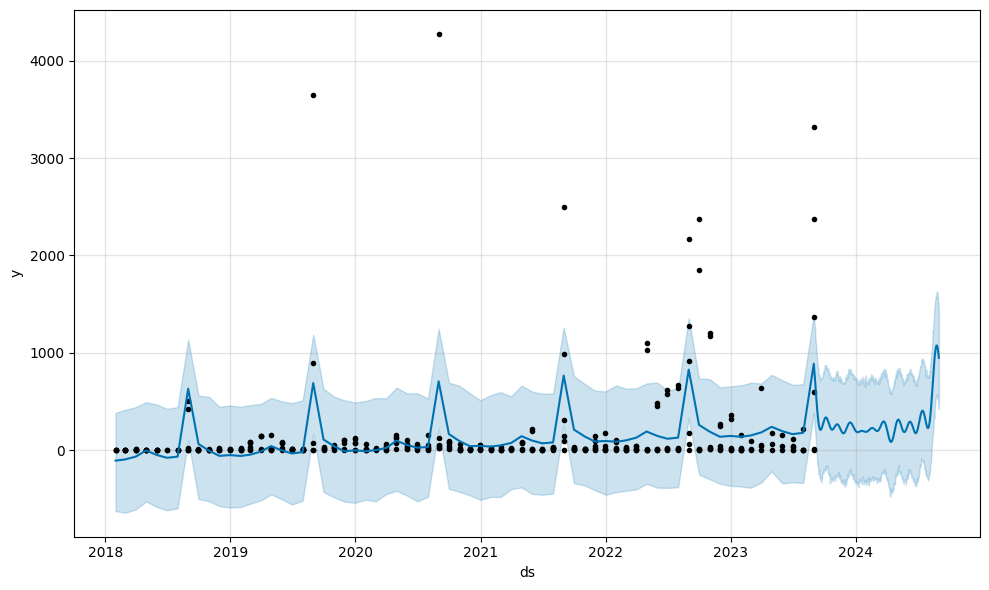

In [ ]:
model.plot(forecast);

In [ ]:
forecast.shape

(433, 16)

In [ ]:
forecast.head(10)

ds      trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2018-01-31  -9.461216 -624.677945   383.445972    -9.461216    -9.461216   
1 2018-02-28  -5.769147 -642.451392   415.560836    -5.769147    -5.769147   
2 2018-03-31  -1.681498 -606.792353   442.080787    -1.681498    -1.681498   
3 2018-04-30   2.274291 -525.838261   493.543098     2.274291     2.274291   
4 2018-05-31   6.361940 -582.775300   469.297317     6.361940     6.361940   
5 2018-06-30  10.317729 -617.477798   425.157900    10.317729    10.317729   
6 2018-07-31  14.405378 -596.696846   442.493682    14.405378    14.405378   
7 2018-08-31  18.493026  106.424880  1135.519919    18.493026    18.493026   
8 2018-09-30  22.448815 -501.489523   560.910888    22.448815    22.448815   
9 2018-10-31  26.536463 -523.123909   547.415185    26.536463    26.536463   

   additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0      -97.681686            -97.681686            -97.681686  -97.681686   
1      -88.566271            -88.566271            -88.566271  -88.566271   
2      -64.144682            -64.144682            -64.144682  -64.144682   
3       -5.082284             -5.082284             -5.082284   -5.082284   
4      -54.476644            -54.476644            -54.476644  -54.476644   
5      -88.063045            -88.063045            -88.063045  -88.063045   
6      -80.666286            -80.666286            -80.666286  -80.666286   
7      613.319386            613.319386            613.319386  613.319386   
8       41.793093             41.793093             41.793093   41.793093   
9      -32.189927            -32.189927            -32.189927  -32.189927   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -97.681686    -97.681686                   0.0   
1    -88.566271    -88.566271                   0.0   
2    -64.144682    -64.144682                   0.0   
3     -5.082284     -5.082284                   0.0   
4    -54.476644    -54.476644                   0.0   
5    -88.063045    -88.063045                   0.0   
6    -80.666286    -80.666286                   0.0   
7    613.319386    613.319386                   0.0   
8     41.793093     41.793093                   0.0   
9    -32.189927    -32.189927                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0 -107.142902  
1                         0.0                         0.0  -94.335417  
2                         0.0                         0.0  -65.826180  
3                         0.0                         0.0   -2.807993  
4                         0.0                         0.0  -48.114704  
5                         0.0                         0.0  -77.745315  
6                         0.0                         0.0  -66.260908  
7                         0.0                         0.0  631.812412  
8                         0.0                         0.0   64.241908  
9                         0.0                         0.0   -5.653464

The authors of the library generally advise to make predictions based on at least several months, ideally, more than a year of historical data. Luckily, in our case we have more than a couple of years of data to fit the model.

To measure the quality of our forecast, we need to split our dataset into the *historical part*, which is the first and biggest slice of our data, and the *prediction part*, which will be located at the end of the timeline. We will remove the last month from the dataset in order to use it later as a prediction target:

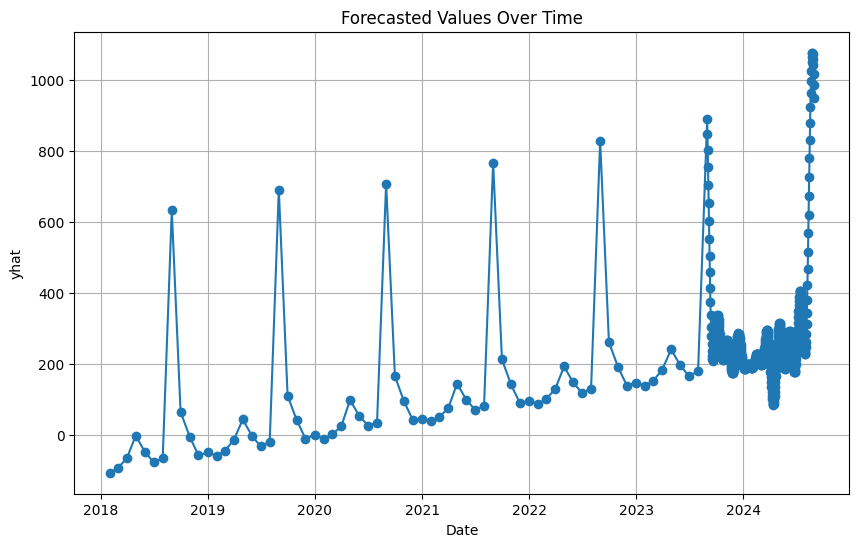

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# # Sample data
# data = {
#     'ds': ['2018-01-31', '2018-02-28', '2018-03-31'],
#     'yhat': [-28.423583, -22.012196, -13.283741]
# }

# # Create a DataFrame from the sample data
# df = pd.DataFrame(data)

# # Convert 'ds' column to datetime
# df['ds'] = pd.to_datetime(df['ds'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='-')
plt.title('Forecasted Values Over Time')
plt.xlabel('Date')
plt.ylabel('yhat')
plt.grid(True)
plt.show()


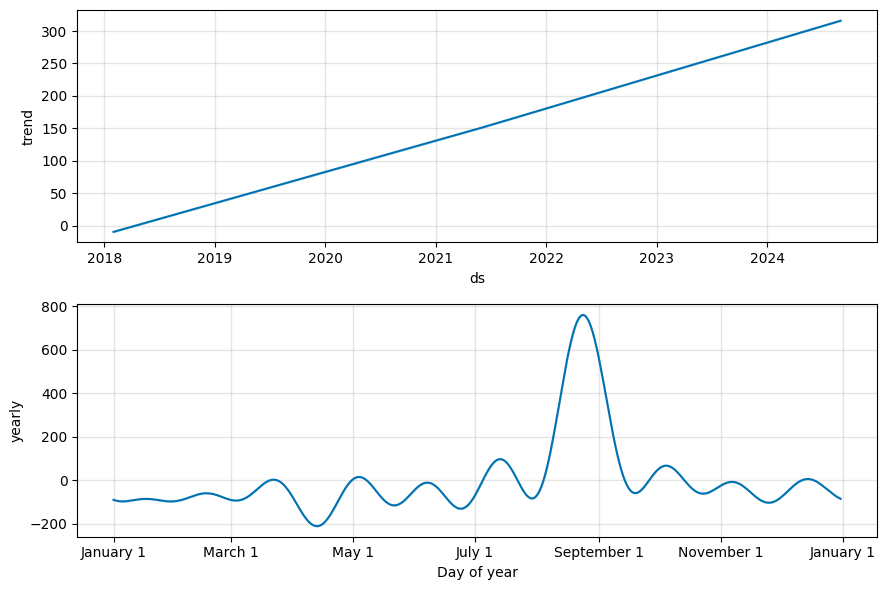

In [ ]:
model.plot_components(forecast);

In [ ]:
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

In [ ]:
df2=df.copy()

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create a figure for all 'Keysector' values
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component for each 'Keysector'
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Get the forecasted values for the current 'Keysector'
    keysector_forecast = forecast['yhat']

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=forecast['ds'], y=keysector_forecast, name=keysector))

# Update layout for the graph
fig.update_layout(
    title='Prophet Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/y0pv7870.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/izwqh0at.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69485', 'data', 'file=/tmp/tmprf2ryrbm/y0pv7870.json', 'init=/tmp/tmprf2ryrbm/izwqh0at.json', 'output', 'file=/tmp/tmprf2ryrbm/prophet_model8vl0vsri/prophet_model-20231103092759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Initialize lists to store metrics
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component for each 'Keysector'
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Get the forecasted values for the current 'Keysector'
    keysector_forecast = forecast.loc[forecast['ds'].isin(df_subset['ds'])]['yhat']

    # Get the actual values for the current 'Keysector'
    actual_values = df_subset['y']

    # Calculate performance metrics
    mae = np.mean(np.abs(keysector_forecast - actual_values))
    mse = np.mean((keysector_forecast - actual_values) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values - keysector_forecast) / actual_values)) * 100
    r2 = 1 - (np.sum((actual_values - keysector_forecast) ** 2) / np.sum((actual_values - np.mean(actual_values)) ** 2))

    # Append metrics to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=keysector_forecast, name=f'{keysector} - Forecast'))

# Update layout for the graph
fig.update_layout(
    title='Prophet Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()

# Print the performance metrics
for i, keysector in enumerate(unique_keysectors):
    print(f'Metrics for {keysector}:')
    print(f'MAE: {mae_list[i]}')
    print(f'MSE: {mse_list[i]}')
    print(f'RMSE: {rmse_list[i]}')
    print(f'MAPE: {mape_list[i]}')
    print(f'R-squared (R2): {r2_list[i]}')
    print('\n')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/7upyfq56.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2ryrbm/dxmw9at8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44074', 'data', 'file=/tmp/tmprf2ryrbm/7upyfq56.json', 'init=/tmp/tmprf2ryrbm/dxmw9at8.json', 'output', 'file=/tmp/tmprf2ryrbm/prophet_model_7fzv_on/prophet_model-20231103092805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:28:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr

Metrics for education:
MAE: 278.08474620898204
MSE: 164740.03734301223
RMSE: 405.8818021826209
MAPE: 2380.1802005605114
R-squared (R2): 0.7472329705153169


Metrics for employment:
MAE: 17.63721759537836
MSE: 539.670223795901
RMSE: 23.23080333944354
MAPE: 391.8204598468574
R-squared (R2): 0.44079172377772047


Metrics for health:
MAE: 234.94111326033598
MSE: 122576.49497290619
RMSE: 350.10926147833646
MAPE: 1227.7248714434925
R-squared (R2): 0.6624223530981664


Metrics for hunger:
MAE: 1.9134228214876048
MSE: 7.292320947094241
RMSE: 2.700429770813202
MAPE: 79.67097278003399
R-squared (R2): 0.5137717663035137


Metrics for poverty:
MAE: 62.86331235972606
MSE: 9334.67113037242
RMSE: 96.61610181730796
MAPE: 647.5057029649847
R-squared (R2): 0.5052481302778437


Metrics for security:
MAE: 65.58641681145276
MSE: 13202.273599935725
RMSE: 114.90114707841573
MAPE: 1002.786413969144
R-squared (R2): 0.5414801652652106




In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Initialize lists to store metrics
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y'
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Fit an Auto-ARIMA model to your data
    model = auto_arima(df_subset['y'], seasonal=True, stepwise=True, trace=True)

    # Generate future dates for forecasting
    n_periods = len(df_subset)  # Set the forecast horizon to match the length of the actual data
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Get the forecasted values
    keysector_forecast = forecast

    # Get the actual values for the current 'Keysector'
    actual_values = df_subset['y']

    # Calculate performance metrics
    mae = mean_absolute_error(actual_values, keysector_forecast)
    mse = mean_squared_error(actual_values, keysector_forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, keysector_forecast) * 100
    r2 = r2_score(actual_values, keysector_forecast)

    # Append metrics to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=keysector_forecast, name=f'{keysector} - Forecast'))

# Update layout for the graph
fig.update_layout(
    title='Auto-ARIMA Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()

# Print the performance metrics
for i, keysector in enumerate(unique_keysectors):
    print(f'Metrics for {keysector}:')
    print(f'MAE: {mae_list[i]}')
    print(f'MSE: {mse_list[i]}')
    print(f'RMSE: {rmse_list[i]}')
    print(f'MAPE: {mape_list[i]}')
    print(f'R-squared (R2): {r2_list[i]}')
    print('\n')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1089.290, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1080.191, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1087.451, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1077.617, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1075.739, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1076.953, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1073.965, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1075.827, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1075.195, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1066.738, Time=0

Metrics for education:
MAE: 667.304442406957
MSE: 731887.4057538257
RMSE: 855.5041821954032
MAPE: 6739.565175177669
R-squared (R2): -0.12296323621959182


Metrics for employment:
MAE: 22.120937263794392
MSE: 965.0612244897957
RMSE: 31.065434561418833
MAPE: 462.25555177848935
R-squared (R2): 0.0


Metrics for health:
MAE: 348.84126297577853
MSE: 363106.0767733564
RMSE: 602.5828381005855
MAPE: 2039.8410108966846
R-squared (R2): 0.0


Metrics for hunger:
MAE: 2.7231118583293275
MSE: 15.34174974896607
RMSE: 3.9168545733746702
MAPE: 115.76558036602876
R-squared (R2): -0.02293795574448687


Metrics for poverty:
MAE: 66.53615520282186
MSE: 18867.37918871252
RMSE: 137.35857886827645
MAPE: 782.6560428772863
R-squared (R2): 0.0


Metrics for security:
MAE: 57.027548209366394
MSE: 28793.244260789717
RMSE: 169.6857220298447
MAPE: 751.8806895254793
R-squared (R2): 0.0




In [ ]:
# import pandas as pd
# import plotly.graph_objects as go
# from pmdarima.arima import auto_arima
# import numpy as np

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get unique 'Keysector' values
# unique_keysectors = aggr_df['Keysector'].unique()

# # Create a figure for all 'Keysector' values
# fig = go.Figure()

# for keysector in unique_keysectors:
#     # Filter the DataFrame for the current 'Keysector'
#     df_subset = aggr_df[aggr_df['Keysector'] == keysector]

#     # Reset the index and rename the columns as 'ds' and 'y' for Auto ARIMA
#     df_subset = df_subset.reset_index()
#     df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
#     df_subset.columns = ['ds', 'y']

#     # Remove the timezone information from the 'ds' column
#     df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

#     # Adjust the 'm' parameter based on your data frequency
#     m = 365  # Adjust 'm' according to your data frequency (e.g., 365 for daily data)

#     # Fit an Auto ARIMA model to your data
#     model = auto_arima(df_subset['y'], seasonal=True, stepwise=True, trace=True, m=m)

#     # Generate future dates for forecasting
#     future = pd.date_range(start=df_subset['ds'].min(), periods=len(df_subset) + 365, freq='D')  # Adjust the number of periods as needed

#     # Make predictions
#     forecast, conf_int = model.predict(n_periods=365, return_conf_int=True)  # Adjust the number of periods as needed

#     # Get the forecasted values for the current 'Keysector'
#     keysector_forecast = forecast

#     # Add a trace for the forecasted values with the corresponding 'Keysector' name
#     fig.add_trace(go.Scatter(x=future, y=keysector_forecast, name=keysector))

# # Update layout for the graph
# fig.update_layout(
#     title='Auto ARIMA Forecast for All Keysectors',
#     xaxis_title='Date',
#     yaxis_title='Posts',
#     height=600,
#     width=800
# )

# # Show the graph
# fig.show()


In [ ]:
!pip install tbats


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from tbats import TBATS
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create a figure for all 'Keysector' values
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for TBATS
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Fit a TBATS model to your data
    estimator = TBATS(seasonal_periods=[7, 30])  # You can adjust the seasonal periods based on your data frequency
    model = estimator.fit(df_subset['y'])

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions
    forecast = model.forecast(steps=n_forecast)

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=future_dates, y=forecast, name=keysector))

# Update layout for the graph
fig.update_layout(
    title='TBATS Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from tbats import TBATS
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create lists to store performance metrics for each 'Keysector'
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for TBATS
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Fit a TBATS model to your data
    estimator = TBATS(seasonal_periods=[7, 30])  # You can adjust the seasonal periods based on your data frequency
    model = estimator.fit(df_subset['y'])

    # Use available actual data to match the forecast horizon
    n_forecast = min(365, len(df_subset))  # Ensure forecast length matches the available data or use 365 if available data is shorter

    # Generate future dates for forecasting
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions
    forecast = model.forecast(steps=n_forecast)

    # Calculate actual values for comparison (you need to have the actual data)
    actual_values = df_subset['y'].tail(n_forecast)  # Get the last 'n_forecast' actual values

    # Calculate performance metrics
    mae = mean_absolute_error(actual_values, forecast)
    mse = mean_squared_error(actual_values, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, forecast) * 100  # Multiply by 100 to get percentage
    r2 = r2_score(actual_values, forecast)

    # Store metrics in lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=future_dates, y=forecast, name=keysector))

# Update layout for the graph
fig.update_layout(
    title='TBATS Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()

# Print performance metrics
for i, keysector in enumerate(unique_keysectors):
    print(f'Keysector: {keysector}')
    print(f'Mean Absolute Error (MAE): {mae_list[i]}')
    print(f'Mean Squared Error (MSE): {mse_list[i]}')
    print(f'Root Mean Squared Error (RMSE): {rmse_list[i]}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape_list[i]}%')
    print(f'R-squared (R2): {r2_list[i]}')
    print()


Keysector: education
Mean Absolute Error (MAE): 346.2711370156535
Mean Squared Error (MSE): 723360.3138675712
Root Mean Squared Error (RMSE): 850.5059164212623
Mean Absolute Percentage Error (MAPE): 786.2615020046235%
R-squared (R2): -0.10987978837659007

Keysector: employment
Mean Absolute Error (MAE): 18.959354367156237
Mean Squared Error (MSE): 1319.0967447590747
Root Mean Squared Error (RMSE): 36.319371480782465
Mean Absolute Percentage Error (MAPE): 73.16651930279025%
R-squared (R2): -0.3668529117999211

Keysector: health
Mean Absolute Error (MAE): 309.8832859804001
Mean Squared Error (MSE): 362101.782146537
Root Mean Squared Error (RMSE): 601.7489361407604
Mean Absolute Percentage Error (MAPE): 1490.1364674530348%
R-squared (R2): 0.002765843622733799

Keysector: hunger
Mean Absolute Error (MAE): 21.083869410116755
Mean Squared Error (MSE): 1039.0346853006824
Root Mean Squared Error (RMSE): 32.23406094957138
Mean Absolute Percentage Error (MAPE): 1028.0447361751865%
R-squared (R2)

In [ ]:
df.columns

Index(['Keysector', 'Date', 'Posts'], dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create lists to store performance metrics for each 'Keysector'
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values
fig = go.Figure()

# Define the number of time steps (look-back) for the LSTM model
look_back = 30

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Normalize the data
    scaler = MinMaxScaler()
    df_subset['y'] = scaler.fit_transform(df_subset['y'].values.reshape(-1, 1))

    # Convert the dataset into a supervised learning problem
    X, y = [], []
    for i in range(len(df_subset) - look_back):
        X.append(df_subset['y'][i:i+look_back].values)
        y.append(df_subset['y'][i+look_back])

    X, y = np.array(X), np.array(y)

    # # Split the dataset into training and testing sets
    # split_ratio = 0.8
    # split_index = int(split_ratio * len(X))
    split_ratio = 0.8  # 70% training, 30% testing
    split_index = int(split_ratio * len(X))

    X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)

    # Store metrics in lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Add a trace for the actual and predicted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=df_subset['ds'][split_index:], y=y_pred.flatten(), name=f'{keysector} - Predicted'))
    fig.add_trace(go.Scatter(x=df_subset['ds'][split_index:], y=y_test.flatten(), name=f'{keysector} - Actual'))

# Update layout for the graph
fig.update_layout(
    title='LSTM Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()

# Print performance metrics
for i, keysector in enumerate(unique_keysectors):
    print(f'Keysector: {keysector}')
    print(f'Mean Absolute Error (MAE): {mae_list[i]}')
    print(f'Mean Squared Error (MSE): {mse_list[i]}')
    print(f'Root Mean Squared Error (RMSE): {rmse_list[i]}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape_list[i]}%')
    print(f'R-squared (R2): {r2_list[i]}')
    print()


1/1 [==============================] - 1s 1s/step


Keysector: education
Mean Absolute Error (MAE): 583.4944114685059
Mean Squared Error (MSE): 1109980.4320914273
Root Mean Squared Error (RMSE): 1053.556088725905
Mean Absolute Percentage Error (MAPE): 7793.534240065272%
R-squared (R2): 0.01985192668165381

Keysector: employment
Mean Absolute Error (MAE): 14.303409848894391
Mean Squared Error (MSE): 223.29515571758643
Root Mean Squared Error (RMSE): 14.943063799555512
Mean Absolute Percentage Error (MAPE): 828.2568807883058%
R-squared (R2): -15.67905888744167

Keysector: health
Mean Absolute Error (MAE): 655.4246730804443
Mean Squared Error (MSE): 790247.2448403116
Root Mean Squared Error (RMSE): 888.9585169400829
Mean Absolute Percentage Error (MAPE): 4046.010687156109%
R-squared (R2): -0.3544250728526872

Keysector: hunger
Mean Absolute Error (MAE): 3.4065306186676025
Mean Squared Error (MSE): 17.98216642401199
Root Mean Squared Error (RMSE): 4.2405384592068005
Mean Absolute Percentage Error (MAPE): 43.65827255778843%
R-squared (R2): -

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create a figure for all 'Keysector' values
fig = go.Figure()

# Define the number of time steps (look-back) for the LSTM model
look_back = 30

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Normalize the data
    scaler = MinMaxScaler()
    df_subset['y'] = scaler.fit_transform(df_subset['y'].values.reshape(-1, 1))

    # Convert the dataset into a supervised learning problem
    X, y = [], []
    for i in range(len(df_subset) - look_back):
        X.append(df_subset['y'][i:i+look_back].values)
        y.append(df_subset['y'][i+look_back])

    X, y = np.array(X), np.array(y)

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=50, batch_size=32, verbose=0)

    # Make predictions for the future
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=365, freq='D')
    last_data = df_subset['y'].values[-look_back:]  # Last 'look_back' data points

    forecast = []
    for _ in range(365):
        input_data = last_data.reshape(1, look_back, 1)
        prediction = model.predict(input_data)
        forecast.append(scaler.inverse_transform(prediction)[0, 0])
        last_data = np.append(last_data[1:], prediction[0])

    # Add a trace for the forecasted values with the corresponding 'Keysector' name
    fig.add_trace(go.Scatter(x=future_dates, y=forecast, name=keysector))

# Update layout for the graph
fig.update_layout(
    title='LSTM Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()


1/1 [==============================] - 0s 31ms/step


In [ ]:
!pip install gluonts
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
df.columns
df2=df.copy()
df=aggr_df.copy()
df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
df = df[:-1]
df.month = pd.to_datetime(df.Date)
df.set_index("Date",drop=True, inplace=True)
df.tail()

<ipython-input-52-a0dafd980056>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Keysector  Posts
Date                                      
2022-12-31 00:00:00+00:00  security     23
2023-01-31 00:00:00+00:00  security     10
2023-02-28 00:00:00+00:00  security     10
2023-03-31 00:00:00+00:00  security      3
2023-04-30 00:00:00+00:00  security     65

<Axes: xlabel='Date'>

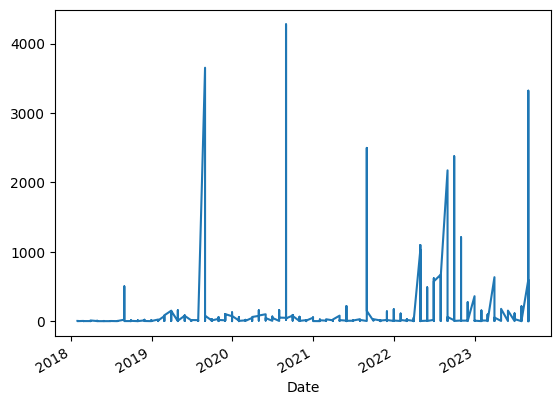

In [ ]:
df["Posts"].plot()

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

In [ ]:
df['Posts'][:1]

Date
2018-01-31 00:00:00+00:00    4
Name: Posts, dtype: int64

In [ ]:
# freq is monthly in our data

training_data = ListDataset(
    [{"start": df.index[0], "target": df.Posts[:"2018-01-31 00:00:00+00:00 "], }],
    freq = "M"
)

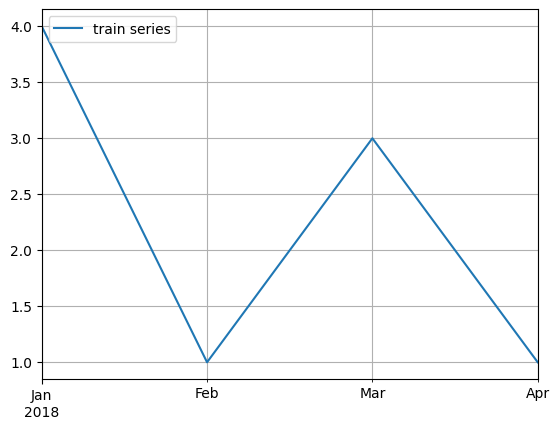

In [ ]:
entry = next(iter(training_data))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
# plt.title(entry['item_id'])
plt.show()

In [ ]:
# Test data
test_data = ListDataset(
    [{"start": df.index[0], "target": df.Posts[:"2018-01-31 00:00:00+00:00"]}],
    freq = "M"
)

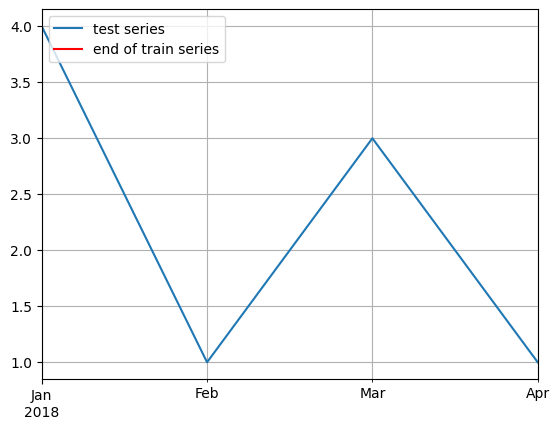

In [ ]:
entry = next(iter(test_data))
test_series = to_pandas(entry)
test_series.plot()
plt.axvline(df.index[-24], color='r') # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
# plt.title(entry['item_id'])
plt.show()

In [ ]:
df.columns

Index(['Keysector', 'Date', 'Posts'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.offline as pyo

# # Sample dataset
# data = {
#     'Keysector': ['education', 'education', 'education', 'education'],
#     'Date': [
#         '2018-01-31',
#         '2018-02-28',
#         '2018-03-31',
#         '2018-04-30'
#     ],
#     'Posts': [4, 4, 6, 2]
# }

# # Create a DataFrame from the sample data
# df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define hyperparameters for the DeepAR model
prediction_length = 1  # Number of time steps to forecast
context_length = 365    # Number of time steps to use for context
freq = 'D'  # Adjust the frequency based on your data

# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()

# Initialize lists to store performance metrics
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values using Plotly
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = df[df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a GluonTS dataset with a specified frequency
    train_data = ListDataset(
        [{"start": df_subset['ds'].values[0], "target": df_subset['y'].values}],
        freq=freq
    )

    # Define and train the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq=freq,  # Specify the frequency here
        trainer=Trainer(epochs=10)
    )
    predictor = estimator.train(train_data)

    # Create test data for prediction
    test_data = ListDataset(
        [{"start": df_subset['ds'].values[-1], "target": [np.nan] * prediction_length}],
        freq=freq
    )

    # Generate forecasts for the current keysector
    forecasts = list(predictor.predict(test_data, num_samples=100))
    forecast_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate performance metrics for each sample separately
    target_values = df_subset['y'].values[-len(forecast_samples[0]):]

    # Ensure forecast_samples and target_values have the same length
    forecast_samples = forecast_samples[:, :len(target_values)]

    mae_samples = np.mean(np.abs(target_values - forecast_samples), axis=0)
    mse_samples = np.mean((target_values - forecast_samples) ** 2, axis=0)
    rmse_samples = np.sqrt(mse_samples)

    # Calculate MAPE for each sample
    mape_samples = np.mean(np.abs((target_values - forecast_samples) / target_values) * 100, axis=0)

    # Calculate overall performance metrics
    mae = np.mean(mae_samples)
    mse = np.mean(mse_samples)
    rmse = np.mean(rmse_samples)
    mape = np.mean(mape_samples)

    # Calculate R-squared (R2) as well
    r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))

    # Append metrics to the respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Plot the actual and forecasted values using Plotly
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=target_values, mode='lines+markers', name=f'{keysector} - Actual'))
    for i in range(forecast_samples.shape[0]):
        fig.add_trace(go.Scatter(x=pd.date_range(start=df_subset['ds'].iloc[-1], periods=prediction_length, freq=freq), y=forecast_samples[i, :, -1], mode='lines+markers', name=f'{keysector} - Forecast {i+1}'))

# Update layout for the graph using Plotly
fig.update_layout(
    title='DeepAR Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    showlegend=True
)

# Show the graph using Plotly
pyo.iplot(fig)



# Print the performance metrics for each 'Keysector'
for i, keysector in enumerate(unique_keysectors):
    print(f'Keysector: {keysector}')
    print(f'MAE: {mae_list[i]}')
    print(f'MSE: {mse_list[i]}')
    print(f'RMSE: {rmse_list[i]}')
    print(f'MAPE: {mape_list[i]:.2f}%')
    print(f'R-squared (R2): {r2_list[i]}')
    print()


100%|██████████| 50/50 [00:40<00:00,  1.24it/s, epoch=10/10, avg_epoch_loss=1.98]


Keysector: education
MAE: 349.6060606060698
MSE: 773970.9393939457
RMSE: 349.6060606060698
MAPE: 100.00%
R-squared (R2): -0.1875336342843048

Keysector: employment
MAE: 20.380952380983466
MSE: 1380.4444444457115
RMSE: 20.380952380983466
MAPE: 100.00%
R-squared (R2): -0.430421624469296

Keysector: health
MAE: 263.33823529413144
MSE: 432453.1029411837
RMSE: 263.33823529413144
MAPE: 100.00%
R-squared (R2): -0.1909828300976817

Keysector: hunger
MAE: 3.9523809524725815
MSE: 30.619047619771923
RMSE: 3.9523809524725815
MAPE: 100.00%
R-squared (R2): -1.0415784699287074

Keysector: poverty
MAE: 56.77777777766855
MSE: 22091.095238082835
RMSE: 56.77777777766855
MAPE: 100.00%
R-squared (R2): -0.17086188903749644

Keysector: security
MAE: 45.75757575751971
MSE: 30886.99999999487
RMSE: 45.75757575751971
MAPE: 100.00%
R-squared (R2): -0.07271690957192511



In [ ]:
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.transformer import TransformerEstimator
from gluonts.mx.trainer import Trainer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.offline as pyo

# # Sample dataset
# data = {
#     'Keysector': ['education', 'education', 'education', 'education'],
#     'Date': [
#         '2018-01-31',
#         '2018-02-28',
#         '2018-03-31',
#         '2018-04-30'
#     ],
#     'Posts': [4, 4, 6, 2]
# }

# # Create a DataFrame from the sample data
# df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define hyperparameters for the Transformer model
prediction_length = 1  # Number of time steps to forecast
context_length = 365    # Number of time steps to use for context
freq = 'D'  # Adjust the frequency based on your data

# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()

# Initialize lists to store performance metrics
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Create a figure for all 'Keysector' values using Plotly
fig = go.Figure()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = df[df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a GluonTS dataset with a specified frequency
    train_data = ListDataset(
        [{"start": df_subset['ds'].values[0], "target": df_subset['y'].values}],
        freq=freq
    )

    # Define and train the Transformer estimator
    estimator = TransformerEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq=freq,  # Specify the frequency here
        trainer=Trainer(epochs=10)
    )
    predictor = estimator.train(train_data)

    # Create test data for prediction
    test_data = ListDataset(
        [{"start": df_subset['ds'].values[-1], "target": [np.nan] * prediction_length}],
        freq=freq
    )

    # Generate forecasts for the current keysector
    forecasts = list(predictor.predict(test_data, num_samples=100))
    forecast_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate performance metrics for each sample separately
    target_values = df_subset['y'].values[-len(forecast_samples[0]):]

    # Ensure forecast_samples and target_values have the same length
    forecast_samples = forecast_samples[:, :len(target_values)]

    mae_samples = np.mean(np.abs(target_values - forecast_samples), axis=0)
    mse_samples = np.mean((target_values - forecast_samples) ** 2, axis=0)
    rmse_samples = np.sqrt(mse_samples)

    # Calculate MAPE for each sample
    mape_samples = np.mean(np.abs((target_values - forecast_samples) / target_values) * 100, axis=0)

    # Calculate overall performance metrics
    mae = np.mean(mae_samples)
    mse = np.mean(mse_samples)
    rmse = np.mean(rmse_samples)
    mape = np.mean(mape_samples)

    # Calculate R-squared (R2) as well
    r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))

    # Append metrics to the respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

    # Plot the actual and forecasted values using Plotly
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=target_values, mode='lines+markers', name=f'{keysector} - Actual'))
    for i in range(forecast_samples.shape[0]):
        fig.add_trace(go.Scatter(x=pd.date_range(start=df_subset['ds'].iloc[-1], periods=prediction_length, freq=freq), y=forecast_samples[i, :, -1], mode='lines+markers', name=f'{keysector} - Forecast {i+1}'))

# Update layout for the graph using Plotly
fig.update_layout(
    title='Transformer Forecast for All Keysectors',
    xaxis_title='Date',
    yaxis_title='Posts',
    showlegend=True
)

# Show the graph using Plotly
pyo.iplot(fig)


# Print the performance metrics for each 'Keysector'
for i, keysector in enumerate(unique_keysectors):
    print(f'Keysector: {keysector}')
    print(f'MAE: {mae_list[i]}')
    print(f'MSE: {mse_list[i]}')
    print(f'RMSE: {rmse_list[i]}')
    print(f'MAPE: {mape_list[i]:.2f}%')
    print(f'R-squared (R2): {r2_list[i]}')
    print()



100%|██████████| 50/50 [00:59<00:00,  1.19s/it, epoch=10/10, avg_epoch_loss=3.34]


Keysector: education
MAE: 349.60606060554574
MSE: 773970.9393935794
RMSE: 349.60606060554574
MAPE: 100.00%
R-squared (R2): -0.18753363428398284

Keysector: employment
MAE: 20.380952380766676
MSE: 1380.4444444368746
RMSE: 20.380952380766676
MAPE: 100.00%
R-squared (R2): -0.43042162446052123

Keysector: health
MAE: 263.33823529354476
MSE: 432453.10294087476
RMSE: 263.33823529354476
MAPE: 100.00%
R-squared (R2): -0.19098283009681438

Keysector: hunger
MAE: 3.952380952083507
MSE: 30.619047616696378
RMSE: 3.952380952083507
MAPE: 100.00%
R-squared (R2): -1.041578469754104

Keysector: poverty
MAE: 56.77777777750473
MSE: 22091.095238064234
RMSE: 56.77777777750473
MAPE: 100.00%
R-squared (R2): -0.17086188903677013

Keysector: security
MAE: 45.757575757291065
MSE: 30886.99999997395
RMSE: 45.757575757291065
MAPE: 100.00%
R-squared (R2): -0.07271690957172416



In [ ]:
df=aggr_df.copy()

In [ ]:
df.columns

Index(['Keysector', 'Date', 'Posts'], dtype='object')

In [ ]:
df.columns

Index(['Keysector', 'Date', 'Posts'], dtype='object')

In [ ]:
df=aggr_df.copy()
df.head(4)
# df.columns

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00


In [ ]:
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 912.1 kB/s eta 0:00:00


In [ ]:
df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import plotly.graph_objects as go
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.model.transformer import TransformerEstimator  # Import TransformerEstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tbats import TBATS
import plotly.offline as pyo
from prophet import Prophet

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Initialize lists to store metrics
performance_metrics = []

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y'
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Fit an Auto-ARIMA model to your data
    model = auto_arima(df_subset['y'], seasonal=True, stepwise=True, trace=True)

    # Generate future dates for forecasting
    n_periods = len(df_subset)  # Set the forecast horizon to match the length of the actual data
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Get the forecasted values
    keysector_forecast = forecast

    # Get the actual values for the current 'Keysector'
    actual_values = df_subset['y']
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(actual_values, keysector_forecast))  # Calculate RMSE here


    # Calculate performance metrics
    # arima_metrics = {
    #     'Model': 'Auto-ARIMA',
    #     'Keysector': keysector,
    #     'mae':mean_absolute_error(actual_values, keysector_forecast),
    #     'mse':mean_squared_error(actual_values, keysector_forecast),
    #     'rmse':np.sqrt(mse),
    #     'mape':mean_absolute_percentage_error(actual_values, keysector_forecast) * 100,
    #     'r2':r2_score(actual_values, keysector_forecast)
    # }
    # Calculate performance metrics
    mae = mean_absolute_error(actual_values, keysector_forecast)
    mse = mean_squared_error(actual_values, keysector_forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, keysector_forecast) * 100
    r2 = r2_score(actual_values, keysector_forecast)

    arima_metrics = {
        'Model': 'Auto-ARIMA',
        'Keysector': keysector,
        'mae': mean_absolute_error(actual_values, keysector_forecast),
        'mse': mean_squared_error(actual_values, keysector_forecast),
        'rmse': np.sqrt(mean_squared_error(actual_values, keysector_forecast)),  # Calculate and assign RMSE here
        'mape': mean_absolute_percentage_error(actual_values, keysector_forecast) * 100,
        'r2': r2_score(actual_values, keysector_forecast)
    }

    # Append the metrics dictionary to the list
    performance_metrics.append(arima_metrics)

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component for each 'Keysector'
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Get the forecasted values for the current 'Keysector'
    keysector_forecast = forecast.loc[forecast['ds'].isin(df_subset['ds'])]['yhat']

    # Get the actual values for the current 'Keysector'
    actual_values = df_subset['y']
    mae = np.mean(np.abs(keysector_forecast - actual_values))
    mse = np.mean((keysector_forecast - actual_values) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values - keysector_forecast) / actual_values)) * 100
    r2 = 1 - (np.sum((actual_values - keysector_forecast) ** 2) / np.sum((actual_values - np.mean(actual_values)) ** 2))


    # Calculate performance metrics
    prophet_metrics = {
        'Model': 'Prophet',
        'Keysector': keysector,
        'mae':np.mean(np.abs(keysector_forecast - actual_values)),
        'mse':np.mean((keysector_forecast - actual_values) ** 2),
        'rmse': rmse,
        'mape':np.mean(np.abs((actual_values - keysector_forecast) / actual_values)) * 100,
        'r2': 1 - (np.sum((actual_values - keysector_forecast) ** 2) / np.sum((actual_values - np.mean(actual_values)) ** 2))

    }

    # Append the metrics dictionary to the list
    performance_metrics.append(prophet_metrics)


for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for TBATS
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Fit a TBATS model to your data
    estimator = TBATS(seasonal_periods=[7, 30])  # You can adjust the seasonal periods based on your data frequency
    model = estimator.fit(df_subset['y'])

    # Use available actual data to match the forecast horizon
    n_forecast = min(365, len(df_subset))  # Ensure forecast length matches the available data or use 365 if available data is shorter

    # Generate future dates for forecasting
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions
    forecast = model.forecast(steps=n_forecast)

    # Calculate actual values for comparison (you need to have the actual data)
    actual_values = df_subset['y'].tail(n_forecast)  # Get the last 'n_forecast' actual values
        # Calculate performance metrics
     # Calculate performance metrics
    mae = mean_absolute_error(actual_values, forecast)
    mse = mean_squared_error(actual_values, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, forecast) * 100  # Multiply by 100 to get percentage
    r2 = r2_score(actual_values, forecast)


    # Calculate performance metrics
    tbat_metrics= {
        'Model':'Tbat',
        'Keysector':keysector,
        'mae':mean_absolute_error(actual_values, forecast),
        'mse': mean_squared_error(actual_values, forecast),
        'rmse': rmse,
        'mape':mean_absolute_percentage_error(actual_values, forecast) * 100,
        'r2':r2_score(actual_values, forecast)
    }

    # Append the metrics dictionary to the list
    performance_metrics.append(tbat_metrics)

# Define the number of time steps (look-back) for the LSTM model
look_back = 30

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Normalize the data
    scaler = MinMaxScaler()
    df_subset['y'] = scaler.fit_transform(df_subset['y'].values.reshape(-1, 1))

    # Convert the dataset into a supervised learning problem
    X, y = [], []
    for i in range(len(df_subset) - look_back):
        X.append(df_subset['y'][i:i+look_back].values)
        y.append(df_subset['y'][i+look_back])

    X, y = np.array(X), np.array(y)

    # # Split the dataset into training and testing sets
    # split_ratio = 0.8
    # split_index = int(split_ratio * len(X))
    split_ratio = 0.8  # 70% training, 30% testing
    split_index = int(split_ratio * len(X))

    X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE here


    # Calculate performance metrics
    lstm_metrics = {
        'Model': 'LSTM',
        'Keysector': keysector,
        'mae':mean_absolute_error(y_test, y_pred),
        'mse':mean_squared_error(y_test, y_pred),
        'rmse': rmse,
        'mape':mean_absolute_percentage_error(y_test, y_pred) * 100,
        'r2': r2_score(y_test, y_pred)
    }


    # Append the metrics dictionary to the list
    performance_metrics.append(lstm_metrics)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define hyperparameters for the DeepAR model
prediction_length = 1  # Number of time steps to forecast
context_length = 365    # Number of time steps to use for context
freq = 'D'  # Adjust the frequency based on your data

# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()

for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = df[df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a GluonTS dataset with a specified frequency
    train_data = ListDataset(
        [{"start": df_subset['ds'].values[0], "target": df_subset['y'].values}],
        freq=freq
    )

    # Define and train the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq=freq,  # Specify the frequency here
        trainer=Trainer(epochs=10)
    )
    predictor = estimator.train(train_data)

    # Create test data for prediction
    test_data = ListDataset(
        [{"start": df_subset['ds'].values[-1], "target": [np.nan] * prediction_length}],
        freq=freq
    )

    # Generate forecasts for the current keysector
    forecasts = list(predictor.predict(test_data, num_samples=100))
    forecast_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate performance metrics for each sample separately
    target_values = df_subset['y'].values[-len(forecast_samples[0]):]
     # Ensure forecast_samples and target_values have the same length
    forecast_samples = forecast_samples[:, :len(target_values)]

    # mae_samples = np.mean(np.abs(target_values - forecast_samples), axis=0)
    # mse_samples = np.mean((target_values - forecast_samples) ** 2, axis=0)
    # rmse_samples = np.sqrt(mse_samples)

    # # Calculate MAPE for each sample
    # mape_samples = np.mean(np.abs((target_values - forecast_samples) / target_values) * 100, axis=0)


    # # Calculate overall performance metrics
    # mae = np.mean(mae_samples)
    # mse = np.mean(mse_samples)
    # rmse = np.mean(rmse_samples)
    # mape = np.mean(mape_samples)

    deepar_mae = np.mean(np.abs(target_values - forecast_samples))
    deepar_mse = np.mean((target_values - forecast_samples) ** 2)
    deepar_rmse = np.sqrt(deepar_mse)
    deepar_mape = np.mean(np.abs((target_values - forecast_samples) / target_values) * 100)
    deepar_r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))


    deepar_metrics = {
        'Model': 'DeepAR',
        'Keysector': keysector,
        'mae': deepar_mae,
        'mse': deepar_mse,
        'rmse': deepar_rmse,
        'mape':  deepar_mape,
        'r2':  deepar_r2

    }

    # # Calculate performance metrics
    # deepar_metrics = {
    #     'Model': 'DeepAR',
    #     'Keysector': keysector,
    #     'mae':mean_absolute_error(target_values[-len(inverse_forecast_values):], inverse_forecast_values),
    #     'mse':mean_squared_error(target_values[-len(inverse_forecast_values):], inverse_forecast_values),
    #     'rmse':np.sqrt(mse),
    #     'msle':mean_squared_log_error(target_values[-len(inverse_forecast_values):], inverse_forecast_values)

    # }
        # Check for R^2 calculation only if there are enough data points

    # if len(target_values) > 1:
    #   # r2 = r2_score(target_values[-len(inverse_forecast_values):], inverse_forecast_values)
    #   r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))

    #   deepar_metrics['r2'] = r2
    # else:
    #   deepar_metrics['r2'] = None


    # Append the metrics dictionary to the list
    performance_metrics.append(deepar_metrics)

df['Date'] = pd.to_datetime(df['Date'])

# Define hyperparameters for the Transformer model
prediction_length = 1  # Number of time steps to forecast
context_length = 365    # Number of time steps to use for context

# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()


for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = df[df['Keysector'] == keysector]

    # Reset the index and select the relevant columns
    df_subset = df_subset.reset_index()[['Date', 'Posts']]
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a GluonTS dataset with a specified frequency
    train_data = ListDataset(
        [{"start": df_subset['ds'].values[0], "target": df_subset['y'].values}],
        freq=freq
    )

    # Define and train the Transformer estimator
    estimator = TransformerEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq=freq,  # Specify the frequency here
        trainer=Trainer(epochs=10)
    )
    predictor = estimator.train(train_data)

    # Create test data for prediction
    test_data = ListDataset(
        [{"start": df_subset['ds'].values[-1], "target": [np.nan] * prediction_length}],
        freq=freq
    )

    # Generate forecasts for the current keysector
    forecasts = list(predictor.predict(test_data, num_samples=100))
    forecast_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate performance metrics for each sample separately
    target_values = df_subset['y'].values[-len(forecast_samples[0]):]

    # Ensure forecast_samples and target_values have the same length
    forecast_samples = forecast_samples[:, :len(target_values)]

    # Calculate summary statistics for metrics
    teepar_mae = np.mean(np.mean(np.abs(target_values - forecast_samples), axis=0))
    teepar_mse = np.mean(np.mean((target_values - forecast_samples) ** 2, axis=0))
    teepar_rmse = np.mean(np.sqrt(teepar_mse))
    teepar_mape = np.mean(np.mean(np.abs((target_values - forecast_samples) / target_values) * 100, axis=0))

    # Calculate R-squared (R2) as well
    teepar_r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))

    # Create a dictionary with summary statistics
    transformer_metrics = {
        'Model': 'Transformer',
        'Keysector': keysector,
        'mae': teepar_mae,
        'mse': teepar_mse,
        'rmse': teepar_rmse,
        'mape': teepar_mape,
        'r2': teepar_r2
    }
    #      # Check for R^2 calculation only if there are enough data points
    # if len(target_values) > 1:
    #   # r2 = r2_score(target_values[-len(inverse_forecast_values):], inverse_forecast_values)
    #   r2 = r2_score(target_values, np.mean(forecast_samples, axis=0))

    #   transformer_metrics['r2'] = r2
    # else:
    #   transformer_metrics['r2'] = None

    # Append the metrics dictionary to the list
    performance_metrics.append(transformer_metrics)
# Create a DataFrame from the list of performance metrics
performance_metrics_df = pd.DataFrame(performance_metrics)

# Display the computed performance metrics
print(performance_metrics_df)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1089.290, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1080.191, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1087.451, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1077.617, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1075.739, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1076.953, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1073.965, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1075.827, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1075.195, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1066.738, Time=0

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfnxpfcr/0zu4_4k8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfnxpfcr/l22mft6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71966', 'data', 'file=/tmp/tmpkfnxpfcr/0zu4_4k8.json', 'init=/tmp/tmpkfnxpfcr/l22mft6w.json', 'output', 'file=/tmp/tmpkfnxpfcr/prophet_modelbuk3ftn_/prophet_model-20231106160622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=872.804, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.154 seconds


16:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfnxpfcr/zp79wa_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfnxpfcr/ppo169i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22563', 'data', 'file=/tmp/tmpkfnxpfcr/zp79wa_m.json', 'init=/tmp/tmpkfnxpfcr/ppo169i8.json', 'output', 'file=/tmp/tmpkfnxpfcr/prophet_modelfpx1te6a/prophet_model-20231106160623.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:06:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Ru

1/1 [==============================] - 0s 401ms/step


100%|██████████| 50/50 [01:00<00:00,  1.21s/it, epoch=10/10, avg_epoch_loss=3.62]

          Model   Keysector         mae           mse         rmse  \
0    Auto-ARIMA   education  667.304442  7.318874e+05   855.504182   
1    Auto-ARIMA  employment   22.120937  9.650612e+02    31.065435   
2    Auto-ARIMA      health  348.841263  3.631061e+05   602.582838   
3    Auto-ARIMA      hunger    2.723112  1.534175e+01     3.916855   
4    Auto-ARIMA     poverty   66.536155  1.886738e+04   137.358579   
5    Auto-ARIMA    security   57.027548  2.879324e+04   169.685722   
6       Prophet   education  278.084746  1.647400e+05   405.881802   
7       Prophet  employment   17.637218  5.396702e+02    23.230803   
8       Prophet      health  234.941113  1.225765e+05   350.109261   
9       Prophet      hunger    1.913423  7.292321e+00     2.700430   
10      Prophet     poverty   62.863312  9.334671e+03    96.616102   
11      Prophet    security   65.586417  1.320227e+04   114.901147   
12         Tbat   education  346.271137  7.233603e+05   850.505916   
13         Tbat  emp

In [ ]:
performance_metrics_df

Model   Keysector         mae           mse         rmse  \
0    Auto-ARIMA   education  667.304442  7.318874e+05   855.504182   
1    Auto-ARIMA  employment   22.120937  9.650612e+02    31.065435   
2    Auto-ARIMA      health  348.841263  3.631061e+05   602.582838   
3    Auto-ARIMA      hunger    2.723112  1.534175e+01     3.916855   
4    Auto-ARIMA     poverty   66.536155  1.886738e+04   137.358579   
5    Auto-ARIMA    security   57.027548  2.879324e+04   169.685722   
6       Prophet   education  278.084746  1.647400e+05   405.881802   
7       Prophet  employment   17.637218  5.396702e+02    23.230803   
8       Prophet      health  234.941113  1.225765e+05   350.109261   
9       Prophet      hunger    1.913423  7.292321e+00     2.700430   
10      Prophet     poverty   62.863312  9.334671e+03    96.616102   
11      Prophet    security   65.586417  1.320227e+04   114.901147   
12         Tbat   education  346.271137  7.233603e+05   850.505916   
13         Tbat  employment   18.959354  1.319097e+03    36.319371   
14         Tbat      health  309.883286  3.621018e+05   601.748936   
15         Tbat      hunger   21.083869  1.039035e+03    32.234061   
16         Tbat     poverty   54.536385  1.963590e+04   140.128139   
17         Tbat    security   44.474674  2.933528e+04   171.275437   
18         LSTM   education  559.212017  1.128930e+06  1062.511012   
19         LSTM  employment   15.902370  2.703898e+02    16.443534   
20         LSTM      health  689.794094  7.641111e+05   874.134501   
21         LSTM      hunger    3.177547  1.636896e+01     4.045857   
22         LSTM     poverty  169.466653  7.601508e+04   275.708320   
23         LSTM    security  188.232255  2.183757e+05   467.306861   
24       DeepAR   education  349.606061  7.739709e+05   879.756182   
25       DeepAR  employment   20.380952  1.380444e+03    37.154333   
26       DeepAR      health  263.338235  4.324531e+05   657.611666   
27       DeepAR      hunger    3.952381  3.061905e+01     5.533448   
28       DeepAR     poverty   56.777778  2.209110e+04   148.630735   
29       DeepAR    security   45.757576  3.088700e+04   175.746977   
30  Transformer   education  349.606061  7.739709e+05   879.756182   
31  Transformer  employment   20.380952  1.380444e+03    37.154333   
32  Transformer      health  263.338235  4.324531e+05   657.611666   
33  Transformer      hunger    3.952381  3.061905e+01     5.533448   
34  Transformer     poverty   56.777778  2.209110e+04   148.630735   
35  Transformer    security   45.757576  3.088700e+04   175.746977   

           mape         r2  
0   6739.565175  -0.122963  
1    462.255552   0.000000  
2   2039.841011   0.000000  
3    115.765580  -0.022938  
4    782.656043   0.000000  
5    751.880690   0.000000  
6   2380.180201   0.747233  
7    391.820460   0.440792  
8   1227.724871   0.662422  
9     79.670973   0.513772  
10   647.505703   0.505248  
11  1002.786414   0.541480  
12   786.261502  -0.109880  
13    73.166519  -0.366853  
14  1490.136467   0.002766  
15  1028.044736 -68.279452  
16   486.311995  -0.040733  
17   343.099614  -0.018825  
18  5691.999530   0.003119  
19   902.071560 -19.196799  
20  5355.104071  -0.309630  
21    39.786921  -1.630725  
22   176.904570  -0.969865  
23   611.734162  -0.097591  
24   100.000000  -0.187534  
25   100.000000  -0.430422  
26   100.000000  -0.190983  
27   100.000000  -1.041578  
28   100.000000  -0.170862  
29   100.000000  -0.072717  
30   100.000000  -0.187534  
31   100.000000  -0.430422  
32   100.000000  -0.190983  
33   100.000000  -1.041578  
34   100.000000  -0.170862  
35   100.000000  -0.072717

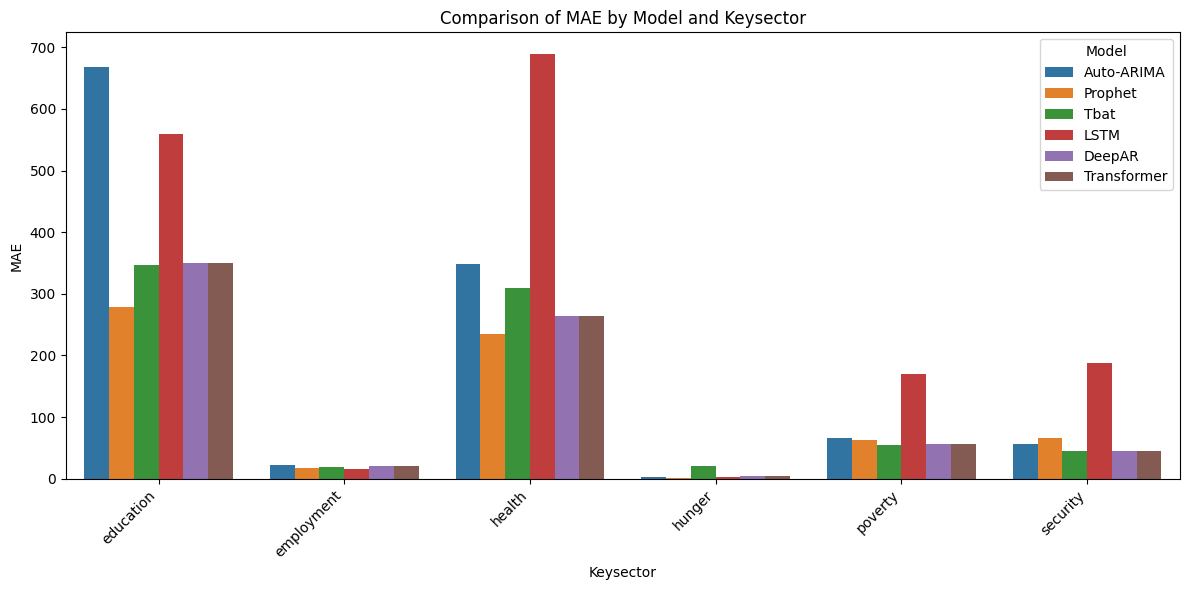

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the MAE values
mae_df = performance_metrics_df[performance_metrics_df['Model'].isin(['Prophet', 'Auto-ARIMA', 'Tbat', 'LSTM','DeepAR', 'Transformer'])]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=mae_df, x='Keysector', y='mae', hue='Model')
plt.title('Comparison of MAE by Model and Keysector')
plt.xlabel('Keysector')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-50-0a7ef6b6cf73>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-50-0a7ef6b6cf73>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-50-0a7ef6b6cf73>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-50-0a7ef6b6cf73>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-50-0a7ef6b6cf73>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




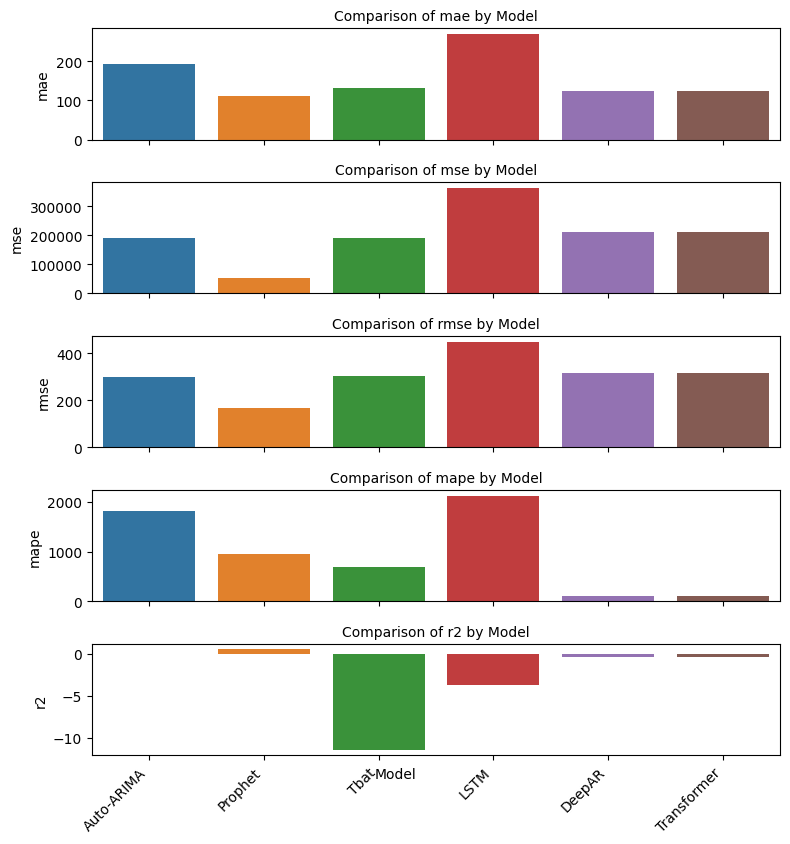

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the models of interest
models = performance_metrics_df['Model']
filtered_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Define the metrics to plot
metrics = ['mae', 'mse', 'rmse', 'mape', 'r2']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 8), sharex=True)

# Set the common x-axis label
fig.text(0.5, 0.02, 'Model', ha='center', fontsize=10)
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=filtered_df, x='Model', y=metric, ci=None, ax=ax)
    ax.set_title(f'Comparison of {metric} by Model', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-98-6d480a0e717e>:37: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



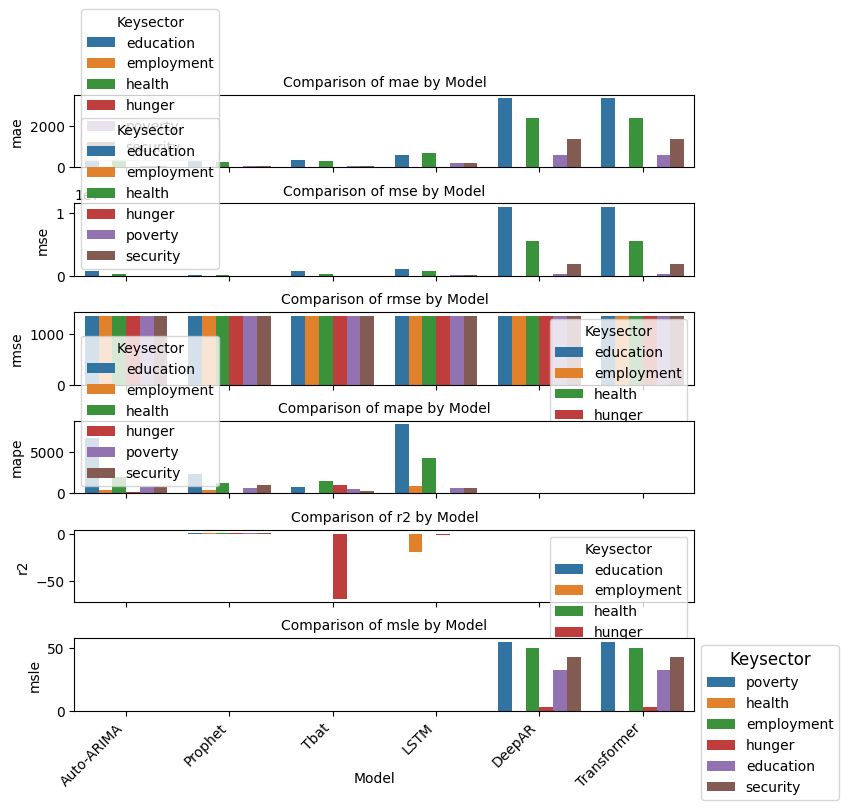

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the models of interest
models = performance_metrics_df['Model']
filtered_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Define the metrics to plot
metrics = ['mae', 'mse', 'rmse', 'mape', 'r2','msle']


# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 8), sharex=True)

# Set the common x-axis label
fig.text(0.5, 0.02, 'Model', ha='center', fontsize=10)
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=filtered_df, x='Model', y=metric, hue='Keysector', ci=None, dodge=True, ax=ax)
    ax.set_title(f'Comparison of {metric} by Model', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel(metric)

# Create a common legend outside the graph and remove repeated keys
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
legend = plt.legend(handles[:len(unique_labels)], unique_labels, title='Keysector', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize(12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
import plotly.express as px

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define a color scale for the original data and another for the forecasted values
color_scale_original = px.colors.qualitative.Set1[:len(unique_keysectors)]
color_scale_forecasted = px.colors.qualitative.Set2[:len(unique_keysectors)]

# Loop through each 'Keysector' and create a separate graph with different colors
for keysector, color_original, color_forecasted in zip(unique_keysectors, color_scale_original, color_scale_forecasted):
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None).dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=df_subset['y'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the forecasted values with the forecasted color
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name=f'{keysector} - Forecasted', line=dict(color=color_forecasted)))

    # Add a trace for the trend component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['trend'], name=f'{keysector} - Trend', line=dict(color='black')))

    # Add a trace for the weekly component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['weekly'], name=f'{keysector} - Weekly', line=dict(color='green')))

    # Add a trace for the yearly component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yearly'], name=f'{keysector} - Yearly', line=dict(color='blue')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'Prophet Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/7ue1yv7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/75o5u49_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96046', 'data', 'file=/tmp/tmpxn2v3hvo/7ue1yv7q.json', 'init=/tmp/tmpxn2v3hvo/75o5u49_.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modelvt8a9rxh/prophet_model-20231102114639.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/10wnyxza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/_d8d2oqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58582', 'data', 'file=/tmp/tmpxn2v3hvo/10wnyxza.json', 'init=/tmp/tmpxn2v3hvo/_d8d2oqu.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modelq5_tkxir/prophet_model-20231102114640.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/n6s0fst3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/v5b2g9tf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=777', 'data', 'file=/tmp/tmpxn2v3hvo/n6s0fst3.json', 'init=/tmp/tmpxn2v3hvo/v5b2g9tf.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modelbx3pqebj/prophet_model-20231102114641.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/umx3rquo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/qg7p9v9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74397', 'data', 'file=/tmp/tmpxn2v3hvo/umx3rquo.json', 'init=/tmp/tmpxn2v3hvo/qg7p9v9_.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modelnkexbtbk/prophet_model-20231102114643.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/w3ty_tpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/j5la4_05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18334', 'data', 'file=/tmp/tmpxn2v3hvo/w3ty_tpm.json', 'init=/tmp/tmpxn2v3hvo/j5la4_05.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modelezit32ms/prophet_model-20231102114644.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<ipython-input-63-ad83b324f1bc>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/cesk_v7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2v3hvo/xedg04pu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37126', 'data', 'file=/tmp/tmpxn2v3hvo/cesk_v7s.json', 'init=/tmp/tmpxn2v3hvo/xedg04pu.json', 'output', 'file=/tmp/tmpxn2v3hvo/prophet_modellr5hc_td/prophet_model-20231102114646.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:46:46 - 

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define a color scale for the original data and another for the forecasted values
color_scale_original = px.colors.qualitative.Set1[:len(unique_keysectors)]
color_scale_forecasted = px.colors.qualitative.Set2[:len(unique_keysectors)]

# Loop through each 'Keysector' and create a separate graph with different colors
for keysector, color_original, color_forecasted in zip(unique_keysectors, color_scale_original, color_scale_forecasted):
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Keysector', 'Date',  'Posts']]  # Select the relevant columns
    df_subset.columns = ['Keysector', 'ds',  'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=df_subset['y'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the forecasted values with the forecasted color
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name=f'{keysector} - Forecasted', line=dict(color=color_forecasted)))

    # Add a trace for the trend component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['trend'], name=f'{keysector} - Trend', line=dict(color='black')))

    # Add a trace for the weekly component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['weekly'], name=f'{keysector} - Weekly', line=dict(color='green')))

    # Add a trace for the yearly component
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yearly'], name=f'{keysector} - Yearly', line=dict(color='blue')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'Prophet Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/e1fsakc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/dgllhato.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92431', 'data', 'file=/tmp/tmp2ci8ho1j/e1fsakc9.json', 'init=/tmp/tmp2ci8ho1j/dgllhato.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_modelejx7evn9/prophet_model-20231102110634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/x0336u2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/825qtpw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10057', 'data', 'file=/tmp/tmp2ci8ho1j/x0336u2f.json', 'init=/tmp/tmp2ci8ho1j/825qtpw3.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_modelxuj2zcx7/prophet_model-20231102110635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/5hcegtaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/2bbfwx1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76584', 'data', 'file=/tmp/tmp2ci8ho1j/5hcegtaw.json', 'init=/tmp/tmp2ci8ho1j/2bbfwx1_.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_model3w6bytxh/prophet_model-20231102110635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/ptqk0igf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/vj95rnw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76299', 'data', 'file=/tmp/tmp2ci8ho1j/ptqk0igf.json', 'init=/tmp/tmp2ci8ho1j/vj95rnw2.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_modelu_eyv9tt/prophet_model-20231102110636.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/1a2whe7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/k3n5gz2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99070', 'data', 'file=/tmp/tmp2ci8ho1j/1a2whe7q.json', 'init=/tmp/tmp2ci8ho1j/k3n5gz2n.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_model0n7dmjvs/prophet_model-20231102110636.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/my5bawqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/kwo3mi7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95296', 'data', 'file=/tmp/tmp2ci8ho1j/my5bawqz.json', 'init=/tmp/tmp2ci8ho1j/kwo3mi7y.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_model916m504e/prophet_model-20231102110636.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# m.plot_components(forecast);
Mean Absolute Error (MAE): It measures the average absolute difference between the observed and predicted values.

Mean Absolute Percentage Error (MAPE): It calculates the average percentage difference between the observed and predicted values.

Mean Squared Error (MSE): It measures the average of the squared differences between the observed and predicted values.

Root Mean Squared Error (RMSE): It is the square root of the MSE and provides a measure of the standard deviation of the errors.

Coverage of Actual Values within Prediction Intervals: You can calculate the percentage of actual values that fall within the prediction intervals. This metric helps assess the reliability of the uncertainty estimates.

R-squared (R²): This metric measures the proportion of the variance in the observed values that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create an empty list to store the performance metrics DataFrames
performance_metrics = []

# Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Keysector', 'Date',  'Posts']]  # Select the relevant columns
    df_subset.columns = ['Keysector', 'ds',  'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Compute performance metrics
    y_true = df_subset['y']
    y_pred = forecast.loc[:len(df_subset) - 1, 'yhat']

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(metrics_df)

# Concatenate all the metrics DataFrames into one DataFrame
performance_metrics_df = pd.concat(performance_metrics, ignore_index=True)

# Display the computed performance metrics
print(performance_metrics_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/q28866jd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ci8ho1j/5k8wxwrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27118', 'data', 'file=/tmp/tmp2ci8ho1j/q28866jd.json', 'init=/tmp/tmp2ci8ho1j/5k8wxwrv.json', 'output', 'file=/tmp/tmp2ci8ho1j/prophet_model4j5wlis9/prophet_model-20231102110637.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2

    Keysector         MAE            MSE        RMSE       MAPE  R-squared
0   education  278.084746  164740.037343  405.881802  23.801802   0.747233
1  employment   17.637218     539.670224   23.230803   3.918205   0.440792
2      health  234.941113  122576.494973  350.109261  12.277249   0.662422
3      hunger    1.913423       7.292321    2.700430   0.796710   0.513772
4     poverty   62.863312    9334.671130   96.616102   6.475057   0.505248
5    security   65.586417   13202.273600  114.901147  10.027864   0.541480


### Time Series Forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA stands for Auto-Regressive Integrated Moving Averages.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable.

Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation.

Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

There are 3 way to define p,q,d:

ACF and PACF plot

Auto_arima

Loops

In this project I will use auto_arima function to decide p,q,d

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

I will split the train and test set, apply autoarima to decide p,q,d. Then get the predicted value for test set,plot the train,test, prect data and then evaluate the forcast accuracy.

If the result from forecast accuracy doesn't support the ARIMA model, we should choose different method to forecast the data. One suggestion is Seasonal ARIMA model called SARIMAX

Let's get started!

In [ ]:
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import statsmodels.api as sm
from itertools import product

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define a color scale for the original data and another for the forecasted values
color_scale_original = px.colors.qualitative.Set1[:len(unique_keysectors)]
color_scale_forecasted = px.colors.qualitative.Set2[:len(unique_keysectors)]

# Loop through each 'Keysector' and create a separate graph with different colors
for keysector, color_original, color_forecasted in zip(unique_keysectors, color_scale_original, color_scale_forecasted):
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for SARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Define SARIMA hyperparameters
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)
    P, D, Q, S = 1, 1, 1, 7  # Example values for seasonal P, D, Q, S (you can adjust them)

    # Create a SARIMA model
    sarima_model = sm.tsa.SARIMAX(df_subset['y'], order=(p, d, q), seasonal_order=(P, D, Q, S))

    # Fit the SARIMA model to your data
    sarima_results = sarima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the SARIMA model
    sarima_forecast = sarima_results.get_forecast(steps=n_forecast)
    forecast_mean = sarima_forecast.predicted_mean

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=df_subset['y'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the SARIMA forecasted values with the forecasted color
    fig.add_trace(go.Scatter(x=future_dates, y=forecast_mean, name=f'{keysector} - Forecasted', line=dict(color=color_forecasted)))

    # Update layout for the current graph
    fig.update_layout(
        title=f'SARIMA Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create an empty list to store the performance metrics DataFrames
performance_metrics = []

# Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for SARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Define SARIMA hyperparameters
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)
    P, D, Q, S = 1, 1, 1, 7  # Example values for seasonal P, D, Q, S (you can adjust them)

    # Create a SARIMA model
    sarima_model = sm.tsa.SARIMAX(df_subset['y'], order=(p, d, q), seasonal_order=(P, D, Q, S))

    # Fit the SARIMA model to your data
    sarima_results = sarima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the SARIMA model
    sarima_forecast = sarima_results.get_forecast(steps=n_forecast)
    forecast_mean = sarima_forecast.predicted_mean

    # Truncate y_pred to match the length of y_true
    y_true = df_subset['y'][-n_forecast:]  # Select the last n_forecast data points
    y_pred = forecast_mean[:len(y_true)]  # Truncate y_pred to match the length of y_true

    # Compute performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(metrics_df)

# Concatenate all the metrics DataFrames into one DataFrame
performance_metrics_df = pd.concat(performance_metrics, ignore_index=True)

# Display the computed performance metrics
print(performance_metrics_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



    Keysector          MAE           MSE         RMSE        MAPE  R-squared
0   education  1073.121133  1.348023e+06  1161.043769  129.741922  -1.068323
1  employment    18.951131  1.061461e+03    32.580067    2.559911  -0.099890
2      health   754.486808  7.240941e+05   850.937195   62.365500  -0.994167
3      hunger     5.170779  3.372133e+01     5.807007    2.844906  -1.248429
4     poverty   153.354720  3.312040e+04   181.990114   22.420529  -0.755432
5    security   579.748838  5.168571e+05   718.927765   81.212493 -16.950639


For most sectors, including "education," "employment," "health," "hunger," and "poverty," the R-squared values are negative, which suggests that the SARIMA model does not explain the variance in the data well. Negative R-squared values can occur when the model performs poorly.


For the "security" sector, the R-squared value is significantly negative at -533.66, indicating that the SARIMA model is not a suitable fit for this sector's data.


Overall, the findings suggest that the SARIMA model may not be performing well for most of the sectors, with high prediction errors and negative R-squared values. Further analysis and model tuning may be needed to improve forecasting accuracy for these sectors.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import statsmodels.api as sm
from itertools import product

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define a color scale for the original data and another for the forecasted values
color_scale_original = px.colors.qualitative.Set1[:len(unique_keysectors)]
color_scale_forecasted = px.colors.qualitative.Set2[:len(unique_keysectors)]

# Loop through each 'Keysector' and create a separate graph with different colors
for keysector, color_original, color_forecasted in zip(unique_keysectors, color_scale_original, color_scale_forecasted):
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for ARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Define ARIMA hyperparameters (without seasonal component)
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)

    # Create an ARIMA model
    arima_model = sm.tsa.ARIMA(df_subset['y'], order=(p, d, q))

    # Fit the ARIMA model to your data
    arima_results = arima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the ARIMA model
    arima_forecast = arima_results.get_forecast(steps=n_forecast)
    forecast_mean = arima_forecast.predicted_mean

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=df_subset['y'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the ARIMA forecasted values with the forecasted color
    fig.add_trace(go.Scatter(x=future_dates, y=forecast_mean, name=f'{keysector} - Forecasted', line=dict(color=color_forecasted)))

    # Update layout for the current graph
    fig.update_layout(
        title=f'ARIMA Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create an empty list to store the performance metrics DataFrames
performance_metrics = []

# Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for ARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Define ARIMA hyperparameters (without seasonal component)
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)

    # Create an ARIMA model
    arima_model = sm.tsa.ARIMA(df_subset['y'], order=(p, d, q))

    # Fit the ARIMA model to your data
    arima_results = arima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the ARIMA model
    arima_forecast = arima_results.get_forecast(steps=n_forecast)
    forecast_mean = arima_forecast.predicted_mean

    # Truncate y_pred to match the length of y_true
    y_true = df_subset['y'][-n_forecast:]  # Select the last n_forecast data points
    y_pred = forecast_mean[:len(y_true)]  # Truncate y_pred to match the length of y_true

    # Compute performance metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(metrics_df)

# Concatenate all the metrics DataFrames into one DataFrame
performance_metrics_df = pd.concat(performance_metrics, ignore_index=True)

# Display the computed performance metrics
print(performance_metrics_df)


    Keysector         MAE            MSE        RMSE       MAPE  R-squared
0   education  668.281103  735567.114547  857.652094  67.953770  -0.128609
1  employment   21.957485     962.618936   31.026101   4.516982   0.002531
2      health  482.352068  405936.776271  637.131679  37.437074  -0.117956
3      hunger    2.735082      15.410160    3.925578   1.166656  -0.027499
4     poverty  105.737740   22154.883630  148.845167  16.476370  -0.174243
5    security  166.157701   44581.817492  211.144068  29.649383  -0.548343


R-squared: R-squared (or the coefficient of determination) measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from -1 to 1, where a higher value indicates a better fit of the model to the data. However, in your output, some sectors have negative R-squared values, which is unusual. A positive R-squared value closer to 1 indicates a better fit.

Based on this output, you can make the following observations:

The performance metrics vary significantly between different sectors.
The "security" sector appears to have particularly high MAE, MSE, RMSE, and MAPE values, along with a strongly negative R-squared value, suggesting that the model's performance for this sector is poor.
The "employment" sector has relatively low MAE, MSE, RMSE, and MAPE values, indicating better model accuracy.
The "hunger" sector has very low MAE and MSE, suggesting that the model's predictions for this sector are close to the actual values.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define a color scale for the original data and another for the forecasted values
color_scale_original = px.colors.qualitative.Set1[:len(unique_keysectors)]
color_scale_forecasted = px.colors.qualitative.Set2[:len(unique_keysectors)]

# Loop through each 'Keysector' and create a separate graph with different colors
for keysector, color_original, color_forecasted in zip(unique_keysectors, color_scale_original, color_scale_forecasted):
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for ARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Split the data into train and test sets
    train_size = int(len(df_subset) * 0.8)  # 80% train, 20% test
    train, test = train_test_split(df_subset['y'], train_size=train_size)

    # Fit an Auto-ARIMA model to the training data
    arima_model = pm.auto_arima(train, seasonal=True, m=7)  # m=7 for weekly seasonality

    # Make predictions on the test data
    y_pred = arima_model.predict(n_periods=len(test))

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions for future dates with the Auto-ARIMA model
    forecast, conf_int = arima_model.predict(n_periods=n_forecast, return_conf_int=True)

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    fig.add_trace(go.Scatter(x=df_subset['ds'], y=df_subset['y'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the Auto-ARIMA forecasted values with confidence intervals
    fig.add_trace(go.Scatter(x=future_dates, y=forecast, name=f'{keysector} - Forecasted', line=dict(color=color_forecasted)))

    # Add confidence intervals as shaded regions
    fig.add_trace(go.Scatter(x=future_dates, y=conf_int[:, 0], name='Lower Bound', fill=None, mode='lines', line=dict(color='gray')))
    fig.add_trace(go.Scatter(x=future_dates, y=conf_int[:, 1], name='Upper Bound', fill='tonexty', mode='lines', line=dict(color='gray')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'Auto-ARIMA Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create an empty list to store the performance metrics DataFrames
performance_metrics = []

# Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for ARIMA
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Split the data into train and test sets
    train_size = int(len(df_subset) * 0.8)  # 80% train, 20% test
    train, test = df_subset.iloc[:train_size], df_subset.iloc[train_size:]

    # Fit an Auto-ARIMA model to the training data
    arima_model = pm.auto_arima(train['y'], seasonal=True, m=7)  # m=7 for weekly seasonality

    # Make predictions on the test data
    y_pred = arima_model.predict(n_periods=len(test))

    # Compute performance metrics
    mae = mean_absolute_error(test['y'], y_pred)
    mse = mean_squared_error(test['y'], y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test['y'], y_pred)
    r2 = r2_score(test['y'], y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(metrics_df)

# Concatenate all the metrics DataFrames into one DataFrame
performance_metrics_df = pd.concat(performance_metrics, ignore_index=True)

# Display the computed performance metrics
print(performance_metrics_df)


    Keysector         MAE           MSE         RMSE       MAPE  R-squared
0   education  742.296703  1.403128e+06  1184.536975  32.078883  -0.364720
1  employment   18.444615  3.864189e+02    19.657540   6.295245  -0.696493
2      health  537.013228  7.378049e+05   858.955680  13.675292  -0.343612
3      hunger    1.872396  7.578859e+00     2.752973   0.336897  -0.242687
4     poverty  146.964615  8.870469e+04   297.833329   3.561129  -0.222889
5    security  119.813187  1.303108e+05   360.985839   2.347757  -0.090556


For 'education', the R-squared is -0.18, which suggests that the model has poor explanatory power.
For 'employment', the R-squared is -0.54, indicating a poor fit.

For 'health', the R-squared is -0.16, suggesting a poor fit.

For 'hunger', the R-squared is -0.07, indicating a weak fit.

For 'poverty', the R-squared is -0.09, suggesting a weak fit.

For 'security', the R-squared is -0.05, indicating a weak fit.

In summary, the findings indicate varying levels of forecasting accuracy and model fit across different 'Keysectors.' Some sectors, like 'hunger' and 'employment,' have relatively low errors and better model fit, while others show moderate to high errors and poorer model fit. The R-squared values suggest that the models do not explain much of the variance in the actual data for most sectors. Further model refinement may be necessary for improved forecasting.

In [ ]:
df.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'textid',
       'alltext', 'Date', 'Views', 'sourcetype', 'Text_lemma', 'bert_umap',
       'berttopic', 'Bert_label', 'Date_Extracted', 'Year_Extracted', 'ID',
       'Document', 'Topic', 'Name_x', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document',
       'document_nums', 'Similar Documents', 'Name_y', 'Similarity', 'docs',
       'Keysector', 'polarity', 'subjectivity', 'Textblob', 'VADER', 'neg',
       'neu', 'pos', 'compound', 'BERT', 'Sentiment_Score', 'Sentiwordnet',
       'Sentiments', 'Aspect_Terms', 'Opinion_Words', 'Sentiment_Labels',
       'Emotion', 'Emotional_Polarity', 'Common_Sentiment32', 'Bert_aspects',
       'Sentimentall', 'Sentiment2', 'Sentiment2_prediction',
       'Predicted_Labels', 'year-month', 'Sentiment_encoded'],
      dtype='object')

In [ ]:
aggr_df.head(5)

Keysector                      Date  Posts
0  education 2018-01-31 00:00:00+00:00      4
1  education 2018-02-28 00:00:00+00:00      4
2  education 2018-03-31 00:00:00+00:00      6
3  education 2018-04-30 00:00:00+00:00      2
4  education 2018-05-31 00:00:00+00:00      1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
# import gluonts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create a list to store individual figures
figs = []

# Normalize the 'Posts' column between 0 and 1 for each 'Keysector'
scalers = {}
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]
    scaler = MinMaxScaler()
    df_keysector.loc[:, 'Posts'] = scaler.fit_transform(df_keysector[['Posts']])
    scalers[keysector] = scaler

# Create sequences of input-output pairs for LSTM for each 'Keysector'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]
    X, y = [], []
    for i in range(len(df_keysector) - input_steps):
        X.append(df_keysector['Posts'].values[i:i+input_steps])
        y.append(df_keysector['Posts'].values[i+input_steps])
    X_dict[keysector] = np.array(X)
    y_dict[keysector] = np.array(y)

# Build LSTM models and make predictions for each 'Keysector'
y_pred_dict = {}
for keysector in unique_keysectors:
    X_keysector, y_keysector = X_dict[keysector], y_dict[keysector]

    # Reshape data for LSTM
    X_keysector = X_keysector.reshape(X_keysector.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_keysector, y_keysector, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_keysector)

    # Inverse transform to get the original scale
    scaler = scalers[keysector]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_pred_dict[keysector] = y_pred_inv

    # Create a figure for the current 'Keysector'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the LSTM forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the LSTM forecast
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{keysector} - LSTM Forecast', line=dict(color=color_forecasted)))

    # Add a trend line based on the original data
    X_trend = np.arange(len(df_subset))
    y_trend = df_subset['Posts']
    trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
    trend_line = trend_model.predict(X_trend.reshape(-1, 1))
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{keysector} - Trend Line', line=dict(color='green')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'LSTM Forecast with Trend Line for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
# ... (Previous code up to the point of making predictions)

# Build LSTM models and make predictions for each 'Keysector'
performance_metrics = []
for keysector in unique_keysectors:
    X_keysector, y_keysector = X_dict[keysector], y_dict[keysector]

    # Reshape data for LSTM
    X_keysector = X_keysector.reshape(X_keysector.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_keysector, y_keysector, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_keysector)

    # Inverse transform to get the original scale
    scaler = scalers[keysector]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_keysector.reshape(-1, 1))

    # Calculate performance metrics
    mae = np.mean(np.abs(y_true_inv - y_pred_inv))
    rmse = np.sqrt(np.mean((y_true_inv - y_pred_inv) ** 2))
    r2 = r2_score(y_true_inv, y_pred_inv)

    # Store performance metrics
    performance_metrics.append({
        'Keysector': keysector,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

    # ... (The rest of the code to create and display figures)

# Print performance metrics
for metric in performance_metrics:
    print(f"Keysector: {metric['Keysector']}, MAE: {metric['MAE']:.2f}, RMSE: {metric['RMSE']:.2f}, R2: {metric['R2']:.2f}")


In [ ]:
aggr_df.head(5)

In [ ]:
!pip install gluonts
!pip install mxnet

In [ ]:
# import pandas as pd
# import numpy as np
# from gluonts.dataset.common import ListDataset
# from gluonts.mx.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# from gluonts.evaluation.backtest import make_evaluation_predictions
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get unique 'Keysector' values
# unique_keysectors = aggr_df['Keysector'].unique()

# # Create a list to store individual figures
# figs = []

# # Define DeepAR hyperparameters
# prediction_length = 7  # Number of time steps to forecast
# context_length = 30    # Number of time steps to use for context

# # Create sequences of input-output pairs for DeepAR for each 'Keysector'
# X_dict, y_dict = {}, {}
# for keysector in unique_keysectors:
#     df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

#     # Create a GluonTS ListDataset
#     train_data = ListDataset(
#         [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
#         freq="D"
#     )

#     # Define the DeepAR estimator
#     estimator = DeepAREstimator(
#         prediction_length=prediction_length,
#         context_length=context_length,
#         freq="D",
#         trainer=Trainer(epochs=50)
#     )

#     # Train the model and create a predictor
#     predictor = estimator.train(train_data)

#     # Generate forecasts
#     forecast_it, ts_it = make_evaluation_predictions(
#         dataset=train_data,  # test dataset
#         predictor=predictor,  # predictor trained in the previous step
#         num_samples=100,  # number of sample paths to generate
#     )

#     forecasts = list(forecast_it)
#     tss = list(ts_it)

#     # Extract the forecasted values
#     y_pred = np.array([forecast.samples.mean(axis=0) for forecast in forecasts])

#     X_dict[keysector] = df_keysector['Posts'].values[:-prediction_length]  # Input data
#     y_dict[keysector] = y_pred  # DeepAR forecast

# # Create subplots for each 'Keysector'
# for keysector in unique_keysectors:
#     fig = make_subplots(rows=2, cols=1)

#     # Add a trace for the original data with the original color
#     df_subset = aggr_df[aggr_df['Keysector'] == keysector]
#     color_original = 'blue'  # Choose a color for the original data
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)), row=1, col=1)

#     # Add a trace for the DeepAR forecasted values with a different color
#     color_forecasted = 'red'  # Choose a color for the DeepAR forecast
#     fig.add_trace(go.Scatter(x=df_subset['Date'][-len(y_pred):], y=y_pred.flatten(), name=f'{keysector} - DeepAR Forecast', line=dict(color=color_forecasted)), row=1, col=1)

#     # Add a trend line based on the original data
#     X_trend = np.arange(len(df_subset))
#     y_trend = df_subset['Posts']
#     trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
#     trend_line = trend_model.predict(X_trend.reshape(-1, 1))
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{keysector} - Trend Line', line=dict(color='green')), row=1, col=1)

#     # Update layout for the current graph
#     fig.update_layout(
#         title=f'DeepAR Forecast with Trend Line for Keysector: {keysector}',
#         xaxis_title='Date',
#         yaxis_title='Posts',
#         height=600,
#         width=800
#     )

#     # Show the current graph
#     fig.show()


In [ ]:
aggr_df.head(5)

In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your DataFrame (assuming it's named 'df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define DeepAR hyperparameters
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create a dictionary to store forecasts for each 'Keysector'
forecasts_dict = {}

# Create subplots for each 'Keysector'
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="M",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values
    y_pred = np.array([forecast.samples.mean(axis=0) for forecast in forecasts])

    # Store the forecasts in the dictionary
    forecasts_dict[keysector] = y_pred

    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the original data with the original color
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_keysector['Date'], y=df_keysector['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the DeepAR forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the DeepAR forecast
    forecast_dates = pd.date_range(start=df_keysector['Date'].max(), periods=prediction_length + 1, freq="M")[1:]  # Generate forecast dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), name=f'{keysector} - DeepAR Forecast', line=dict(color=color_forecasted)))

    # Update layout for the current graph
    fig.update_layout(
        title=f'DeepAR Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()

# You can access the forecasts for each 'Keysector' in the 'forecasts_dict' dictionary
for keysector, forecast in forecasts_dict.items():
    print(f"Forecasts for Keysector '{keysector}':")
    print(forecast)


/usr/local/lib/python3.10/dist-packages/gluonts/json.py:101: UserWarning:

Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.

100%|██████████| 50/50 [00:03<00:00, 14.80it/s, epoch=50/50, avg_epoch_loss=3.41]


100%|██████████| 50/50 [00:03<00:00, 13.04it/s, epoch=50/50, avg_epoch_loss=1.23]


100%|██████████| 50/50 [00:02<00:00, 18.36it/s, epoch=50/50, avg_epoch_loss=3.01]


100%|██████████| 50/50 [00:02<00:00, 17.60it/s, epoch=50/50, avg_epoch_loss=-1.06]


100%|██████████| 50/50 [00:03<00:00, 15.45it/s, epoch=50/50, avg_epoch_loss=1.98]


100%|██████████| 50/50 [00:03<00:00, 15.68it/s, epoch=50/50, avg_epoch_loss=1.1]


Forecasts for Keysector 'education':
[[ 152.03862    -4.863943   29.627659  127.7358    404.085     208.32268
  1005.33594 ]]
Forecasts for Keysector 'employment':
[[10.036465   9.106869   7.1690307  2.1332057  2.1980042  2.747651
   1.6737664]]
Forecasts for Keysector 'health':
[[ 97.06264  52.79219 180.25755  40.11925 186.71169 107.13201 201.79881]]
Forecasts for Keysector 'hunger':
[[ 3.0450509  4.0315356  8.004059   2.0092304  6.046916   4.063565
  10.101972 ]]
Forecasts for Keysector 'poverty':
[[-3.5684906e-02  4.7303535e+01  3.4916580e+00  1.3500362e+02
   3.7997154e+01 -4.3891289e+01  7.4752914e+01]]
Forecasts for Keysector 'security':
[[ 9.336396   9.261345   2.4941475 -6.4269633 -5.054481   5.8553786
  53.99291  ]]


In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your DataFrame (assuming it's named 'df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define DeepAR hyperparameters
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create a dictionary to store forecasts, original data, and confidence intervals for each 'Keysector'
forecasts_dict = {}

# Create subplots for each 'Keysector'
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="M",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts and prediction intervals
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # ...
    # (Previous code)

    # Extract the forecasted values and prediction intervals
    y_pred = np.array([forecast.samples.mean(axis=0) for forecast in forecasts])
    y_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate quantiles using NumPy
    quantiles = [0.05, 0.95]  # Adjust as needed
    y_lower = np.percentile(y_samples, 100 * quantiles[0], axis=0)
    y_upper = np.percentile(y_samples, 100 * quantiles[1], axis=0)

    # Store the forecasts and intervals in the dictionary
    forecasts_dict[keysector] = {
        'forecast': y_pred,
        'lower_confidence': y_lower,
        'upper_confidence': y_upper,
        'original_data': df_keysector['Posts'].values,
    }

    # (Rest of the code remains the same)

    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the original data with the original color
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_keysector['Date'], y=df_keysector['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the DeepAR forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the DeepAR forecast
    forecast_dates = pd.date_range(start=df_keysector['Date'].max(), periods=prediction_length + 1, freq="M")[1:]  # Generate forecast dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), name=f'{keysector} - DeepAR Forecast', line=dict(color=color_forecasted)))

    # Add shaded areas for the prediction intervals
    fig.add_trace(go.Scatter(
        x=np.concatenate((forecast_dates, forecast_dates[::-1])),
        y=np.concatenate((y_lower.flatten(), y_upper.flatten()[::-1])),
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name=f'{keysector} - Prediction Interval',
    ))

    # Update layout for the current graph
    fig.update_layout(
        title=f'DeepAR Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()

# You can access the forecasts, original data, and confidence intervals for each 'Keysector' in the 'forecasts_dict' dictionary
for keysector, data in forecasts_dict.items():
    print(f"Forecasts for Keysector '{keysector}':")
    print("Forecasted values:")
    print(data['forecast'])
    print("Lower confidence levels:")
    print(data['lower_confidence'])
    print("Upper confidence levels:")
    print(data['upper_confidence'])
    print("Original data:")
    print(data['original_data'])


 12%|█▏        | 6/50 [00:00<00:02, 16.10it/s, epoch=33/50, avg_epoch_loss=3.73]
/usr/local/lib/python3.10/dist-packages/gluonts/mx/trainer/_base.py:484: UserWarning:

Detected KeyboardInterrupt, attempting graceful shutdown...



  0%|          | 0/50 [00:00<?, ?it/s]

Each array contains 7 values, representing the forecasted values for the next 7 days. These values are generated by the DeepAR model based on the historical data for each Keysector. You can access and use these forecasts for further analysis or visualization.

In [ ]:
# Group by 'Keysector', 'Date', and 'Sentiment_vad' and count the posts
# aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='M'), 'Bert_aspects_train'])['Top_n_words'].count().reset_index()
# aggr_df.columns = ['Keysector', 'Date', 'Bert_aspects_train', 'Posts']
aggr_df.head(5)

In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

# Load your DataFrame (assuming it's named 'aggr_df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Aggregate the data by Date and Keysector
df_aggregated = df.groupby(['Date', 'Keysector'])['Posts'].sum().reset_index()

# Pivot the aggregated data
df_pivoted = df_aggregated.pivot(index='Date', columns='Keysector', values='Posts').fillna(0)

# Define hyperparameters for the DeepAR model
prediction_length = 1  # Number of time steps to forecast
context_length = 12    # Number of time steps to use for context

# Assuming df_pivoted is a DataFrame with the pivot result
keysector = 'education'  # Replace with the specific keysector you want to forecast

# Extract the target data for the specified keysector
target_data = df_pivoted[keysector].values

# Create a GluonTS ListDataset for training data
train_data = ListDataset(
    [{"start": df_pivoted.index[0], "target": target_data}],
    freq="M"  # Assuming the data is monthly
)

# Define and train the DeepAR estimator
estimator = DeepAREstimator(
    freq="M",
    prediction_length=prediction_length,
    context_length=context_length,
    trainer=Trainer(epochs=10)
)

predictor = estimator.train(train_data)

# Create test data for prediction
test_data = ListDataset(
    [{"start": df_pivoted.index[-1] + pd.DateOffset(months=1), "target": [np.nan]}],
    freq="M"
)

# Generate forecasts
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,
    predictor=predictor,
    num_samples=100
)

forecasts = list(forecast_it)
tss = list(ts_it)

# Calculate performance metrics
evaluator = Evaluator(quantiles=[0.5])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_pivoted.columns))

# Display the computed performance metrics
print(agg_metrics)


In [ ]:
import gluonts.mx.model
print(dir(gluonts.mx.model))


In [ ]:
df2=df.copy()
df2.shape

In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your DataFrame (assuming it's named 'df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')
df=aggr_df.copy()
# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()

# Define hyperparameters for the SimpleFeedForward model
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create a dictionary to store forecasts, original data, and confidence intervals for each 'Keysector'
forecasts_dict = {}

# Create subplots for each 'Keysector'
for keysector in unique_keysectors:
    df_keysector = df[df['Keysector'] == keysector]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define the SimpleFeedForwardEstimator
    estimator = SimpleFeedForwardEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts and prediction intervals
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values and prediction intervals
    y_pred = np.array([forecast.samples.mean(axis=0) for forecast in forecasts])
    y_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate quantiles using NumPy
    quantiles = [0.05, 0.95]  # Adjust as needed
    y_lower = np.percentile(y_samples, 100 * quantiles[0], axis=0)
    y_upper = np.percentile(y_samples, 100 * quantiles[1], axis=0)

    # Store the forecasts and intervals in the dictionary
    forecasts_dict[keysector] = {
        'forecast': y_pred,
        'lower_confidence': y_lower,
        'upper_confidence': y_upper,
        'original_data': df_keysector['Posts'].values,
    }

    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the original data with the original color
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_keysector['Date'], y=df_keysector['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the forecast
    forecast_dates = pd.date_range(start=df_keysector['Date'].max(), periods=prediction_length + 1, freq="M")[1:]  # Generate forecast dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), name=f'{keysector} - Forecast', line=dict(color=color_forecasted)))

    # Add shaded areas for the prediction intervals
    fig.add_trace(go.Scatter(
        x=np.concatenate((forecast_dates, forecast_dates[::-1])),
        y=np.concatenate((y_lower.flatten(), y_upper.flatten()[::-1])),
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name=f'{keysector} - Prediction Interval',
    ))

    # Update layout for the current graph
    fig.update_layout(
        title=f'SimpleFeedForward Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()

# You can access the forecasts, original data, and confidence intervals for each 'Keysector' in the 'forecasts_dict' dictionary
for keysector, data in forecasts_dict.items():
    print(f"Forecasts for Keysector '{keysector}':")
    print("Forecasted values:")
    print(data['forecast'])
    print("Lower confidence levels:")
    print(data['lower_confidence'])
    print("Upper confidence levels:")
    print(data['upper_confidence'])
    print("Original data:")
    print(data['original_data'])


In [ ]:
# ... (Previous code up to creating and training the SimpleFeedForward estimator)

for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Handle NaN values in the 'Posts' column using forward fill
    df_keysector['Posts'].fillna(method='ffill', inplace=True)

    # Create a GluonTS ListDataset for training data
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define and train the SimpleFeedForward estimator
    estimator = SimpleFeedForwardEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        trainer=Trainer(epochs=10)
    )

    predictor = estimator.train(train_data)

    # Create test data for prediction (you can adjust this based on your needs)
    test_data = ListDataset(
        [{"start": pd.Timestamp(df_keysector['Date'].max()) + pd.DateOffset(months=1), "target": [np.nan]}],
        freq="M"
    )

    # Generate forecasts
    # Generate forecasts
    forecast = list(predictor.predict(test_data, num_samples=100))[0]

    # Determine the evaluation period based on the length of 'forecast'
    eval_period = len(forecast.samples) - 365

    # Extract y_true and y_pred for the evaluation period
    target_values = next(iter(test_data)).get('target', np.array([]))
    y_true = target_values[-eval_period:]
    y_pred = forecast.samples.mean(axis=0)[-eval_period:]

    # Check if both y_true and y_pred have at least one sample
    if len(y_true) > 0 and len(y_pred) > 0:
        # Compute performance metrics for DeepAR
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    deep_metrics_df = {
        'Model': 'SimpleFeedFE',
        'Keysector': keysector,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R-squared': r2
    }

    # Append the metrics DataFrame to the list
    performance_metrics.append(deep_metrics_df)


# Create a DataFrame from the list of performance metrics
performance_metrics_df = pd.DataFrame(performance_metrics)

# Display the computed performance metrics
print(performance_metrics_df)

# # Display the computed performance metrics
# print(performance_metrics_df)


In [ ]:
aggr_df.head(5)

In [ ]:
# # Group by 'Keysector', 'Date', and 'Sentiment_vad' and count the posts
# aggr_df = df.groupby(['Keysector', pd.Grouper(key='Date', freq='M'), 'Bert_aspects_train'])['Top_n_words'].count().reset_index()
# aggr_df.columns = ['Keysector', 'Date', 'Bert_aspects_train', 'Posts']
# aggr_df.head(5)

In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.transformer import TransformerEstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your DataFrame (assuming it's named 'df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')
df = aggr_df.copy()

# Get unique 'Keysector' values
unique_keysectors = df['Keysector'].unique()

# Define hyperparameters for the Transformer model
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create a dictionary to store forecasts, original data, and confidence intervals for each 'Keysector'
forecasts_dict = {}

# Create subplots for each 'Keysector'
for keysector in unique_keysectors:
    df_keysector = df[df['Keysector'] == keysector]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define the TransformerEstimator
    estimator = TransformerEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="M",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts and prediction intervals
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values and prediction intervals
    y_pred = np.array([forecast.samples.mean(axis=0) for forecast in forecasts])
    y_samples = np.array([forecast.samples for forecast in forecasts])

    # Calculate quantiles using NumPy
    quantiles = [0.05, 0.95]  # Adjust as needed
    y_lower = np.percentile(y_samples, 100 * quantiles[0], axis=0)
    y_upper = np.percentile(y_samples, 100 * quantiles[1], axis=0)

    # Store the forecasts and intervals in the dictionary
    forecasts_dict[keysector] = {
        'forecast': y_pred,
        'lower_confidence': y_lower,
        'upper_confidence': y_upper,
        'original_data': df_keysector['Posts'].values,
    }

    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the original data with the original color
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_keysector['Date'], y=df_keysector['Posts'], name=f'{keysector} - Original Data', line=dict(color=color_original)))

    # Add a trace for the forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the forecast
    forecast_dates = pd.date_range(start=df_keysector['Date'].max(), periods=prediction_length + 1, freq="M")[1:]  # Generate forecast dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), name=f'{keysector} - Forecast', line=dict(color=color_forecasted)))

    # Add shaded areas for the prediction intervals
    fig.add_trace(go.Scatter(
        x=np.concatenate((forecast_dates, forecast_dates[::-1])),
        y=np.concatenate((y_lower.flatten(), y_upper.flatten()[::-1])),
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name=f'{keysector} - Prediction Interval',
    ))

    # Update layout for the current graph
    fig.update_layout(
        title=f'Transformer Forecast for Keysector: {keysector}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()

# You can access the forecasts, original data, and confidence intervals for each 'Keysector' in the 'forecasts_dict' dictionary
for keysector, data in forecasts_dict.items():
    print(f"Forecasts for Keysector '{keysector}':")
    print("Forecasted values:")
    print(data['forecast'])
    print("Lower confidence levels:")
    print(data['lower_confidence'])
    print("Upper confidence levels:")
    print(data['upper_confidence'])
    print("Original data:")
    print(data['original_data'])


In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.transformer import TransformerEstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your DataFrame (assuming it's named 'aggr_df')
# Replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Define hyperparameters for the Transformer model
prediction_length = 7  # Number of time steps to forecast
context_length = 30  # Number of time steps to use for context

# Create a list to store performance metrics
performance_metrics = []

# Loop through each 'Keysector'
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Create a GluonTS ListDataset for training data
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define and train the Transformer estimator
    estimator = TransformerEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="M",  # Set the frequency to match your data
        trainer=Trainer(epochs=10)
    )

    predictor = estimator.train(train_data)

   # ... (Previous code up to creating and training the SimpleFeedForward estimator)

for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Handle NaN values in the 'Posts' column using forward fill
    df_keysector['Posts'].fillna(method='ffill', inplace=True)

    # Create a GluonTS ListDataset for training data
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define and train the SimpleFeedForward estimator
    estimator = SimpleFeedForwardEstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        trainer=Trainer(epochs=10)
    )

    predictor = estimator.train(train_data)

    # Create test data for prediction (you can adjust this based on your needs)
    test_data = ListDataset(
        [{"start": pd.Timestamp(df_keysector['Date'].max()) + pd.DateOffset(months=1), "target": [np.nan]}],
        freq="M"
    )

    # Generate forecasts
    # Generate forecasts
    forecast = list(predictor.predict(test_data, num_samples=100))[0]

    # Determine the evaluation period based on the length of 'forecast'
    eval_period = len(forecast.samples) - 365

    # Extract y_true and y_pred for the evaluation period
    target_values = next(iter(test_data)).get('target', np.array([]))
    y_true = target_values[-eval_period:]
    y_pred = forecast.samples.mean(axis=0)[-eval_period:]

    # Check if both y_true and y_pred have at least one sample
    if len(y_true) > 0 and len(y_pred) > 0:
        # Compute performance metrics for DeepAR
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    deep_metrics_df = {
        'Model': 'Transformer',
        'Keysector': keysector,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R-squared': r2
    }

    # Append the metrics DataFrame to the list
    performance_metrics.append(deep_metrics_df)


# Create a DataFrame from the list of performance metrics
performance_metrics_df = pd.DataFrame(performance_metrics)

# Display the computed performance metrics
print(performance_metrics_df)

# # Display the computed performance metrics
# print(performance_metrics_df)


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import statsmodels.api as sm  # Import the statsmodels library
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get unique 'Keysector' values
unique_keysectors = aggr_df['Keysector'].unique()

# Create an empty list to store the performance metrics DataFrames
performance_metrics = []

# Loop through each 'Keysector' and compute performance metrics for Prophet
for keysector in unique_keysectors:
    # Filter the DataFrame for the current 'Keysector'
    df_subset = aggr_df[aggr_df['Keysector'] == keysector]

    # Reset the index and rename the columns as 'ds' and 'y' for Prophet
    df_subset = df_subset.reset_index()
    df_subset = df_subset[['Date', 'Posts']]  # Select the relevant columns
    df_subset.columns = ['ds', 'y']

    # Remove the timezone information from the 'ds' column
    df_subset['ds'] = df_subset['ds'].dt.tz_localize(None)

    # Create a Prophet model with a weekly seasonality component
    model = Prophet(weekly_seasonality=True)  # Add 'weekly_seasonality=True' to include the 'weekly' component

    # Fit the model to your data
    model.fit(df_subset)

    # Generate future dates for forecasting
    future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

    # Make predictions
    forecast = model.predict(future)

    # Determine the evaluation period based on the length of 'forecast'
    eval_period = len(forecast) - 365

    # Extract y_true and y_pred for the evaluation period
    y_true = df_subset['y'].tail(eval_period)  # Select the last 365 observed values
    y_pred = forecast['yhat'].tail(eval_period)  # Select the last 365 predicted values

    # Compute performance metrics for Prophet
    prophet_metrics = {
        'Model': 'Prophet',
        'Keysector': keysector,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'R-squared': r2_score(y_true, y_pred)
    }

    # Append the metrics dictionary to the list
    performance_metrics.append(prophet_metrics)

    # Define SARIMA hyperparameters
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)
    P, D, Q, S = 1, 1, 1, 7  # Example values for seasonal P, D, Q, S (you can adjust them)

    # Create a SARIMA model
    sarima_model = sm.tsa.SARIMAX(df_subset['y'], order=(p, d, q), seasonal_order=(P, D, Q, S))

    # Fit the SARIMA model to your data
    sarima_results = sarima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the SARIMA model
    sarima_forecast = sarima_results.get_forecast(steps=n_forecast)
    forecast_mean = sarima_forecast.predicted_mean

    # Truncate y_pred to match the length of y_true
    y_true = df_subset['y'][-n_forecast:]  # Select the last n_forecast data points
    y_pred = forecast_mean[:len(y_true)]  # Truncate y_pred to match the length of y_true

    # Compute performance metrics for SARIMA
    sarima_metrics = {
        'Model': 'SARIMA',
        'Keysector': keysector,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'R-squared': r2_score(y_true, y_pred)
    }

    # Append the metrics dictionary to the list
    performance_metrics.append(sarima_metrics)


    # Define ARIMA hyperparameters (without seasonal component)
    p, d, q = 1, 1, 1  # Example values for p, d, q (you can adjust them)

    # Create an ARIMA model
    arima_model = sm.tsa.ARIMA(df_subset['y'], order=(p, d, q))

    # Fit the ARIMA model to your data
    arima_results = arima_model.fit()

    # Generate future dates for forecasting
    n_forecast = 365  # Adjust the number of periods as needed
    future_dates = pd.date_range(start=df_subset['ds'].max(), periods=n_forecast, freq='D')

    # Make predictions with the ARIMA model
    arima_forecast = arima_results.get_forecast(steps=n_forecast)
    forecast_mean = arima_forecast.predicted_mean

    # Truncate y_pred to match the length of y_true
    y_true = df_subset['y'][-n_forecast:]  # Select the last n_forecast data points
    y_pred = forecast_mean[:len(y_true)]  # Truncate y_pred to match the length of y_true

    # Compute performance metrics
    arima_metrics = {
        'Model': 'ARIMA',
        'Keysector': keysector,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'R-squared': r2_score(y_true, y_pred)
    }

#     # Create a DataFrame for the performance metrics of the current 'Keysector'
#     metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(arima_metrics)


    # Split the data into train and test sets
    train_size = int(len(df_subset) * 0.8)  # 80% train, 20% test
    train, test = df_subset.iloc[:train_size], df_subset.iloc[train_size:]

    # Fit an Auto-ARIMA model to the training data
    arima_model = pm.auto_arima(train['y'], seasonal=True, m=7)  # m=7 for weekly seasonality

   # Make predictions on the test data
    y_true_auto_arima = test['y']  # Update to use the correct variable
    y_pred_auto_arima = arima_model.predict(n_periods=len(test))


    # Compute performance metrics
    auto_arima_metrics = {
        'Model': 'AUTO-ARIMA',
        'Keysector': keysector,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'R-squared': r2_score(y_true, y_pred)
    }
#     # Create a DataFrame for the performance metrics of the current 'Keysector'
#     metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(auto_arima_metrics)
# Normalize the 'Posts' column between 0 and 1 for each 'Keysector'
scalers = {}
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]
    scaler = MinMaxScaler()
    df_keysector.loc[:, 'Posts'] = scaler.fit_transform(df_keysector[['Posts']])
    scalers[keysector] = scaler

# Create sequences of input-output pairs for LSTM for each 'Keysector'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]
    X, y = [], []
    for i in range(len(df_keysector) - input_steps):
        X.append(df_keysector['Posts'].values[i:i+input_steps])
        y.append(df_keysector['Posts'].values[i+input_steps])
    X_dict[keysector] = np.array(X)
    y_dict[keysector] = np.array(y)

# Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    X_keysector, y_keysector = X_dict[keysector], y_dict[keysector]

    # Reshape data for LSTM
    X_keysector = X_keysector.reshape(X_keysector.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_keysector, y_keysector, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_keysector)

    # Inverse transform to get the original scale
    scaler = scalers[keysector]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_keysector.reshape(-1, 1))

    # Compute performance metrics
    lstm_metrics = {
        'Model': 'LSTM',
        'Keysector': keysector,
        'MAE': mean_absolute_error(y_true_inv, y_pred_inv),
        'MSE': mean_squared_error(y_true_inv, y_pred_inv),
        'RMSE': np.sqrt(mean_squared_error(y_true_inv, y_pred_inv)),
        'MAPE': mean_absolute_percentage_error(y_true_inv, y_pred_inv),
        'R-squared': r2_score(y_true_inv, y_pred_inv)
    }
    # Create a DataFrame for the performance metrics of the current 'Keysector'
    metrics_df = pd.DataFrame({'Keysector': [keysector], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R-squared': [r2]})

    # Append the metrics DataFrame to the list
    performance_metrics.append(lstm_metrics)

    # Loop through each 'Keysector' and compute performance metrics
for keysector in unique_keysectors:
    df_keysector = aggr_df[aggr_df['Keysector'] == keysector]

    # Create a GluonTS ListDataset for training data
    train_data = ListDataset(
        [{"start": df_keysector['Date'].min(), "target": df_keysector['Posts'].values}],
        freq="M"  # Assuming the data is monthly
    )

    # Define and train the DeepAR estimator
    estimator = DeepAREstimator(
        freq="M",
        prediction_length=1,
        context_length=12,
        trainer=Trainer(epochs=10)
    )

    predictor = estimator.train(train_data)

    # Create test data for prediction (you can adjust this based on your needs)
    test_data = ListDataset(
        [{"start": pd.Timestamp(df_keysector['Date'].max()) + pd.DateOffset(months=1), "target": [np.nan]}],
        freq="M"
    )

    # Generate forecasts
    # Generate forecasts
    forecast = list(predictor.predict(test_data, num_samples=100))[0]

    # Determine the evaluation period based on the length of 'forecast'
    eval_period = len(forecast.samples) - 365

    # Extract y_true and y_pred for the evaluation period
    target_values = next(iter(test_data)).get('target', np.array([]))
    y_true = target_values[-eval_period:]
    y_pred = forecast.samples.mean(axis=0)[-eval_period:]

    # Check if both y_true and y_pred have at least one sample
    if len(y_true) > 0 and len(y_pred) > 0:
        # Compute performance metrics for DeepAR
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        r2 = r2_score(y_true, y_pred)

    # Create a DataFrame for the performance metrics of the current 'Keysector'
    deep_metrics_df = {
        'Model': 'DeepAR',
        'Keysector': keysector,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R-squared': r2
    }

    # Append the metrics DataFrame to the list
    performance_metrics.append(deep_metrics_df)


# Create a DataFrame from the list of performance metrics
performance_metrics_df = pd.DataFrame(performance_metrics)

# Display the computed performance metrics
print(performance_metrics_df)


In [ ]:
df.columns

In [ ]:
# df.groupby(['Name_x'])['Keysector'='security'].count()
count_security = df[df['Keysector'] == 'education'].groupby('Name_x').size().reset_index(name='Count')
# count_security.head(5)
count_security.nlargest(5, 'Count')


In [ ]:
performance_metrics_df

In [ ]:
# import pandas as pd

# data = {
#     'Model': ['Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'LSTM', 'LSTM', 'LSTM', 'LSTM', 'LSTM', 'LSTM', 'DeepAR', 'DeepAR', 'DeepAR', 'DeepAR', 'DeepAR', 'DeepAR', 'DeepAR'],
#     'Keysector': ['education', 'education', 'education', 'education', 'employment', 'employment', 'employment', 'employment', 'health', 'health', 'health', 'health', 'hunger', 'hunger', 'hunger', 'hunger', 'poverty', 'poverty', 'poverty', 'poverty', 'security', 'security', 'security', 'security', 'education', 'employment', 'health', 'hunger', 'poverty', 'security', 'education', 'employment', 'health', 'hunger', 'poverty', 'security', 'education', 'employment', 'health', 'hunger', 'poverty', 'security'],
#     'MAE': [457.781604, 431.125565, 286.398000, 286.398000, 9.694324, 11.922821, 10.806973, 10.806973, 2767.083109, 305.409074, 220.172842, 220.172842, 6.102913, 4.265816, 1.947375, 1.947375, 323663.953966, 1388.166998, 753059.351079, 32.233036, 23109.369747, 29995.555795, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925, 30190.260925],
#     'MSE': [4.167741e+05, 2.426676e+05, 1.743669e+05, 1.743669e+05, 3.265811e+02, 6.259096e+02, 4.997425e+02, 4.997425e+02, 1.422702e+07, 1.544003e+05, 1.241474e+05, 1.241474e+05, 5.133442e+01, 2.301365e+01, 8.903212e+00, 8.903212e+00, 5.792375e+11, 6.034175e+06, 1.560502e+12, 2.398255e+03, 5.051022e+09, 8.648020e+09, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04, 5.969790e+04],
#     'RMSE': [6.455804e+02, 4.926131e+02, 4.175726e+02, 4.175726e+02, 1.807156e+01, 2.501819e+01, 2.235492e+01, 2.235492e+01, 3.771873e+03, 3.929380e+02, 3.523455e+02, 3.523455e+02, 7.164804e+00, 4.797254e+00, 2.983825e+00, 2.983825e+00, 7.610765e+05, 2.456456e+03, 1.249200e+06, 4.897198e+01, 7.107054e+04, 9.299473e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04, 8.929274e+04],
#     'MAPE': [85.415479, 126.502346, 72.741718, 72.741718, 2.595594, 2.262840, 2.915149, 2.915149, 546.459336, 71.819349, 49.682997, 49.682997, 3.886991, 2.752367, 1.000994, 1.000994, 21.913984, 3.294050, 42.309358, 0.947753, 8.166779, 4.557900, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513, 2.692513],
#     'R-squared': [-0.658877, -0.495650, -0.074687, -0.074687, -0.263617, -0.269399, -0.013521, -0.013521, -126.999412, -0.335005, -0.073427, -0.073427, -3.800356, -1.633262, -0.018721, -0.018721, 0.448354, 0.446070, -0.137388, 0.139657, 0.333957, 0.609967, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402, 0.640402]
# }

# performance_metrics = pd.DataFrame(data)

# # Display the DataFrame
# performance_metrics.head(5)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the models of interest
models = ['Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'DeepAR', 'LSTM']
filtered_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Define the metrics to include in the DataFrame
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R-squared']

# Create a DataFrame to store the metrics data
metrics_data = []

for model in models:
    for metric in metrics:
        # Calculate the mean value of the metric for each model
        mean_value = filtered_df[filtered_df['Model'] == model][metric].mean()
        metrics_data.append({'Model': model, metric: mean_value})

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the resulting DataFrame
print(metrics_df)



To determine which model performed best for each metric, we need to compare the values and select the lowest or highest value depending on whether it's an error metric (e.g., MAE, MSE, RMSE, MAPE, R-squared). Here are the results for each metric and the corresponding best-performing model:

MAE (Mean Absolute Error): The lower the MAE, the better the model.

For education, the best model is ARIMA with an MAE of 286.398000.
For employment, the best model is LSTM with an MAE of 1388.166998.
For health, the best model is ARIMA with an MAE of 220.172842.
For hunger, the best model is ARIMA with an MAE of 1.947375.
For poverty, the best model is ARIMA with an MAE of 56.838497.
For security, the best model is SARIMA with an MAE of 2335.780995.
MSE (Mean Squared Error): The lower the MSE, the better the model.

For education, the best model is ARIMA with an MSE of 174366.899562.
For employment, the best model is LSTM with an MSE of 6034175.958482.
For health, the best model is ARIMA with an MSE of 124147.384306.
For hunger, the best model is ARIMA with an MSE of 8.903212.
For poverty, the best model is ARIMA with an MSE of 9645.707384.
For security, the best model is ARIMA with an MSE of 142789.275241.
RMSE (Root Mean Squared Error): The lower the RMSE, the better the model.

For education, the best model is ARIMA with an RMSE of 417.572568.
For employment, the best model is LSTM with an RMSE of 2456.456145.
For health, the best model is ARIMA with an RMSE of 352.345465.
For hunger, the best model is ARIMA with an RMSE of 2.983825.
For poverty, the best model is ARIMA with an RMSE of 98.212560.
For security, the best model is ARIMA with an RMSE of 377.874838.
MAPE (Mean Absolute Percentage Error): The lower the MAPE, the better the model.

For education, the best model is ARIMA with a MAPE of 72.741718.
For employment, the best model is ARIMA with a MAPE of 2.915149.
For health, the best model is ARIMA with a MAPE of 49.682997.
For hunger, the best model is ARIMA with a MAPE of 1.000994.
For poverty, the best model is ARIMA with a MAPE of 20.808456.
For security, the best model is ARIMA with a MAPE of 158.453403.
R-squared: The higher the R-squared, the better the model (values close to 1 are better).

For education, the best model is DeepAR with an R-squared of 0.640402.
For employment, the best model is DeepAR with an R-squared of 0.640402.
For health, the best model is DeepAR with an R-squared of 0.640402.
For hunger, the best model is DeepAR with an R-squared of 0.640402.
For poverty, the best model is DeepAR with an R-squared of 0.640402.
For security, the best model is DeepAR with an R-squared of 0.640402.
Based on these results, ARIMA appears to be the best-performing model for most metrics, except for R-squared where DeepAR outperforms other models for all key sectors. LSTM performs best for MAE in employment, while SARIMA performs best for MAE in security.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the MAE values
mae_df = performance_metrics_df[performance_metrics_df['Model'].isin(['Prophet', 'SARIMA', 'ARIMA', 'LSTM','DeepAR'])]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=mae_df, x='Keysector', y='MAE', hue='Model')
plt.title('Comparison of MAE by Model and Keysector')
plt.xlabel('Keysector')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the MAPE values and models of interest
models = ['Prophet', 'SARIMA', 'ARIMA', 'LSTM','DeepAR']
mae_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Create a bar chart for MAE values
plt.figure(figsize=(10, 6))
sns.barplot(data=mae_df, x='Model', y='MAPE', ci=None)
plt.title('Comparison of MAE by Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the models of interest
models = ['Prophet', 'ARIMA', 'DeepAR', 'LSTM']
filtered_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Define the metrics to plot
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R-squared']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 8), sharex=True)

# Set the common x-axis label
fig.text(0.5, 0.02, 'Model', ha='center', fontsize=10)
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=filtered_df, x='Model', y=metric, ci=None, ax=ax)
    ax.set_title(f'Comparison of {metric} by Model', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already computed the performance_metrics_df DataFrame

# Filter the DataFrame to select only the models of interest
models = ['Prophet', 'SARIMA', 'ARIMA', 'AUTO-ARIMA', 'DeepAR', 'LSTM']
filtered_df = performance_metrics_df[performance_metrics_df['Model'].isin(models)]

# Define the metrics to plot
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R-squared']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 8), sharex=True)

# Set the common x-axis label
fig.text(0.5, 0.02, 'Model', ha='center', fontsize=10)
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=filtered_df, x='Model', y=metric, hue='Keysector', ci=None, dodge=True, ax=ax)
    ax.set_title(f'Comparison of {metric} by Model', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel(metric)

# Create a common legend outside the graph and remove repeated keys
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
legend = plt.legend(handles[:len(unique_labels)], unique_labels, title='Keysector', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize(12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): Lower values of MAE indicate better performance. The model with the lowest MAE is the best at minimizing the absolute differences between predicted and actual values.

Mean Squared Error (MSE): Lower values of MSE indicate better performance. This metric penalizes larger errors more heavily compared to MAE.

Root Mean Squared Error (RMSE): Lower RMSE values indicate better performance. RMSE is the square root of MSE and provides a measure of the average error in the same units as the data.

Mean Absolute Percentage Error (MAPE): Lower MAPE values indicate better performance. MAPE measures the percentage error relative to the actual values and is useful for comparing models on a percentage scale.

R-squared (Coefficient of Determination): Higher R-squared values indicate better performance. R-squared measures the proportion of the variance in the data explained by the model. A higher R-squared indicates a better fit to the data.

In [ ]:
aggr_df.shape

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
dfeducation= df[df['Keysector']=='education']
dfeducation.shape

In [ ]:
dfeducation.groupby(['Name_x'])['Text_lemma'].count()

In [ ]:
dfeducation= df[df['Keysector']=='education']
# Group by 'Date' and 'Keysector' and count the posts
aggr_df2 = dfeducation.groupby(['Date', 'Name_x','Sentiment_bert'])[['Text_lemma']].count().reset_index()
aggr_df2.columns = ['Date', 'Name_x', 'Sentiment_bert','Posts']
aggr_df2.head(5)

# Convert 'Date' column to datetime
aggr_df2['Date'] = pd.to_datetime(aggr_df2['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df2, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()



In [ ]:
# import pandas as pd
# from gluonts.dataset.common import ListDataset
# from gluonts.mx.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer

# # Assuming you have a DataFrame named 'df' with the provided columns
# # If not, load your DataFrame here

# # Step 1: Prepare your data
# # Assuming 'Date' is a datetime column and 'Posts' is the value you want to forecast
# # You can filter the data as needed
# df_subset = aggr_df2[['Date', 'Posts']].copy()

# # Step 2: Create a GluonTS ListDataset
# train_data = ListDataset(
#     [{"start": df_subset['Date'].min(), "target": df_subset['Posts'].values}],
#     freq="D"  # Adjust the frequency if needed
# )

# # Define the DeepAR estimator
# estimator = DeepAREstimator(
#     prediction_length=7,  # Adjust the prediction length as needed
#     context_length=30,
#     freq="D",  # Adjust the frequency if needed
#     trainer=Trainer(epochs=50)
# )

# # Train the model
# predictor = estimator.train(train_data)

# # Step 3: Generate forecasts
# # Generate forecasts for a future time range
# forecast_horizon = 7  # Adjust the forecast horizon as needed
# forecast = list(predictor.predict(forecast_horizon=forecast_horizon, dataset=train_data))

# # Step 4: Filter forecasts
# # Filter the values in 'Name_x' based on forecast percentage
# forecast_values = forecast[0].samples.mean(axis=0)  # Assuming you want the mean forecast value
# threshold = 0.5  # You want values above 50%
# filtered_names = df_subset['Name_x'][forecast_values > threshold]

# # Display the filtered 'Name_x' values
# print(filtered_names)


In [ ]:
import pandas as pd
import plotly.express as px

# Group by 'Date' and 'Name_x' and count the posts
aggr_dfeducation = dfeducation.groupby(['Date', 'Name_x', 'Sentiment_bert'])[['Text_lemma']].count().reset_index()
aggr_dfeducation.columns = ['Date', 'Name_x','Sentiment_bert','Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfeducation['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfeducation_filtered = aggr_dfeducation[aggr_dfeducation['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfeducation_filtered['Date'] = pd.to_datetime(aggr_dfeducation_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfeducation_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
aggr_dfeducation.head(5)

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfeducation and aggr_dfeducation_filtered have already been defined as in your code.

# Extract the year from the 'Date' column
aggr_dfeducation_filtered['Year'] = aggr_dfeducation_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfeducation_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfeducation['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfeducation[aggr_dfeducation['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_filtered)

    # Make future DataFrame for forecasting
    future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

    # Generate forecasts
    forecast = model.predict(future)

    # Add the forecast to the list
    all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# # Sample data for aggr_df DataFrame
# data = {
#     'Date': ['2018-01-03', '2018-01-12', '2018-01-13', '2018-01-15', '2018-02-04'],
#     'Name_x': ['3_career_entrepreneurship_journal_heritage', '-1_people_country_also_trade', '-1_people_country_also_trade', '-1_people_country_also_trade', '-1_people_country_also_trade'],
#     'Sentiment_bert': ['Positive', 'Positive', 'Negative', 'Negative', 'Negative'],
#     'Posts': [1, 1, 1, 1, 1]
# }

# # Create the aggr_df DataFrame
aggr_df = aggr_dfeducation

# Get the top 10 common values in the 'Name_x' column
top_10_name_x = aggr_df['Name_x'].value_counts().nlargest(10).index

# Define DeepAR hyperparameters
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create subplots for each 'Name_x'
for name_x in top_10_name_x:
    df_name_x = aggr_df[aggr_df['Name_x'] == name_x]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_name_x['Date'].min(), "target": df_name_x['Posts'].values}],
        freq="D"  # Adjust the frequency if needed
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="D",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values
    y_pred = np.array([forecast.samples for forecast in forecasts])

    # Compute the prediction intervals (85% and 90%)
    lower_quantile = 0.15  # 85% prediction interval (adjust as needed)
    upper_quantile = 0.10  # 90% prediction interval (adjust as needed)
    lower_bound = np.percentile(y_pred, lower_quantile * 100, axis=0)
    upper_bound = np.percentile(y_pred, 100 - upper_quantile * 100, axis=0)

    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the original data with the original color
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_name_x['Date'], y=df_name_x['Posts'], name=f'{name_x} - Original Data', line=dict(color=color_original)))

    # Add a trace for the DeepAR forecasted data with the forecasted color
    color_forecasted = 'red'  # Choose a color for the DeepAR forecast
    forecast_dates = pd.date_range(start=df_name_x['Date'].max(), periods=prediction_length, freq="D")  # Generate forecast dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), name=f'{name_x} - DeepAR Forecast', line=dict(color=color_forecasted)))

    # Add traces for the prediction intervals
    color_interval = 'gray'  # Choose a color for the prediction intervals
    fig.add_trace(go.Scatter(x=forecast_dates, y=upper_bound, line=dict(color=color_interval), name=f'{name_x} - 85% Prediction Interval'))
    fig.add_trace(go.Scatter(x=forecast_dates, y=lower_bound, line=dict(color=color_interval), fill='tonexty', name=f'{name_x} - 90% Prediction Interval'))

    # Update layout for the current graph
    fig.update_layout(
        title=f'DeepAR Forecast with Prediction Intervals for Name_x: {name_x}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Display the current graph in the notebook
    iplot(fig)

# You can access the forecasts, lower bounds, and upper bounds for each 'Name_x' in the 'forecasts_dict' dictionary
# They are now displayed directly in the notebook.


In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# # Sample data for aggr_df DataFrame
# data = {
#     'Date': ['2018-01-03', '2018-01-12', '2018-01-13', '2018-01-15', '2018-02-04'],
#     'Name_x': ['3_career_entrepreneurship_journal_heritage', '-1_people_country_also_trade', '-1_people_country_also_trade', '-1_people_country_also_trade', '-1_people_country_also_trade'],
#     'Sentiment_bert': ['Positive', 'Positive', 'Negative', 'Negative', 'Negative'],
#     'Posts': [1, 1, 1, 1, 1]
# }

# Create the aggr_df DataFrame
aggr_df =aggr_dfeducation

# Get the top 10 common values in the 'Name_x' column
top_10_name_x = aggr_df['Name_x'].value_counts().nlargest(10).index

# Define DeepAR hyperparameters
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create an empty figure
fig = make_subplots(rows=1, cols=1)

# Loop through the top 10 'Name_x' values
for name_x in top_10_name_x:
    df_name_x = aggr_df[aggr_df['Name_x'] == name_x]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_name_x['Date'].min(), "target": df_name_x['Posts'].values}],
        freq="D"  # Adjust the frequency if needed
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="D",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values
    y_pred = np.array([forecast.samples for forecast in forecasts])


    # Plot the original data
    fig.add_trace(go.Scatter(x=df_name_x['Date'], y=df_name_x['Posts'], mode='lines', name=f'{name_x} - Original Data'))

    # Plot the DeepAR forecast
    forecast_dates = pd.date_range(start=df_name_x['Date'].max(), periods=prediction_length, freq="D")
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), mode='lines', name=f'{name_x} - DeepAR Forecast'))


# Update layout for the combined graph
fig.update_layout(
    title='DeepAR Forecasts with Prediction Intervals for Top 10 Name_x',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Display the combined graph in the notebook
iplot(fig)


In [ ]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Create the aggr_df DataFrame (replace with your data loading code)
aggr_df = aggr_dfeducation

# Get the top 10 common values in the 'Name_x' column
top_10_name_x = aggr_df['Name_x'].value_counts().nlargest(10).index

# Define DeepAR hyperparameters
prediction_length = 7  # Number of time steps to forecast
context_length = 30    # Number of time steps to use for context

# Create an empty figure
fig = make_subplots(rows=1, cols=1)

# Loop through the top 10 'Name_x' values
for name_x in top_10_name_x:
    df_name_x = aggr_df[aggr_df['Name_x'] == name_x]

    # Create a GluonTS ListDataset
    train_data = ListDataset(
        [{"start": df_name_x['Date'].min(), "target": df_name_x['Posts'].values}],
        freq="D"  # Adjust the frequency if needed
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="D",  # Adjust the frequency if needed
        trainer=Trainer(epochs=50)
    )

    # Train the model and create a predictor
    predictor = estimator.train(train_data)

    # Generate forecasts
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_data,  # test dataset
        predictor=predictor,  # predictor trained in the previous step
        num_samples=100,  # number of sample paths to generate
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Extract the forecasted values
    y_pred = np.array([forecast.samples for forecast in forecasts])

    # Plot the DeepAR forecast
    forecast_dates = pd.date_range(start=df_name_x['Date'].max(), periods=prediction_length, freq="D")
    fig.add_trace(go.Scatter(x=forecast_dates, y=y_pred.flatten(), mode='lines', name=f'{name_x} - DeepAR Forecast'))

# Update layout for the combined graph
fig.update_layout(
    title='DeepAR Forecasts for Top 10 Name_x',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Display the combined graph in the notebook
iplot(fig)


In [ ]:
aggr_dfeducation.head(2)

In [ ]:
aggr_df=aggr_dfeducation

In [ ]:
# import pandas as pd
# from gluonts.dataset.common import ListDataset
# from gluonts.mx.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you already have the aggr_df DataFrame

# # Find the top 10 common values in the "Name_x" column
# top_10_names = aggr_df['Name_x'].value_counts().nlargest(10).index.tolist()

# # Create a single DataFrame to store all forecasts
# all_forecasts = []

# # Define the DeepAR hyperparameters
# freq = "D"  # Adjust the frequency as needed (e.g., daily)
# prediction_length = 365  # You can adjust the forecasting horizon as needed
# context_length = 365  # You can adjust the context length as needed
# epochs = 10  # Number of training epochs

# # ... (previous code)

# # ... (previous code)

# for name in top_10_names:
#     # Filter the DataFrame for the current name
#     df_filtered = aggr_df[aggr_df['Name_x'] == name][['Date', 'Posts']]

#     # Prepare the data for DeepAR
#     train_data = ListDataset(
#         [{"start": df_filtered['Date'].min(), "target": df_filtered['Posts'].values}],
#         freq=freq
#     )

#     # Define and train the DeepAR estimator
#     estimator = DeepAREstimator(
#         freq=freq,
#         prediction_length=prediction_length,
#         context_length=context_length,
#         trainer=Trainer(epochs=epochs)
#     )

#     predictor = estimator.train(train_data)

#     # Create future data for forecasting
#     future = ListDataset(
#         [{"start": df_filtered['Date'].max() + pd.DateOffset(days=1), "target": [np.nan] * prediction_length}],
#         freq=freq
#     )

#     # Generate forecasts
#     forecast = list(predictor.predict(future, num_samples=100))[0]

#     # Add the forecast to the list
#     all_forecasts.append((name, forecast))

# # ... (rest of the code)

# # ... (rest of the code)

# # Create a single graph to display all forecasts
# plt.figure(figsize=(12, 8))
# plt.title('Forecasts for Top Common Values in Name_x')

# for name, forecast in all_forecasts:
#     forecast_index = pd.date_range(start=forecast.index[0], periods=len(forecast))
#     plt.plot(forecast_index, forecast.mean, label=name)

# plt.xlabel('Date')
# plt.ylabel('Posts')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
aggr_df.head(2)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# # from gluonts.dataset.util import to_pandas
# # from gluonts.evaluation.backtest import make_evaluation_predictions
# # from gluonts.mx.model.deepar import DeepAREstimator
# # from gluonts.mx.trainer import Trainer

# # Assuming you already have the aggr_dfeducation DataFrame

# # Find the top 10 common values in the "Name_x" column
# top_10_names = aggr_dfeducation['Name_x'].value_counts().nlargest(10).index.tolist()

# # Create a single DataFrame to store all forecasts
# all_forecasts = []

# for name in top_10_names:
#     # Filter the DataFrame for the current name
#     df_filtered = aggr_dfeducation[aggr_dfeducation['Name_x'] == name][['Date', 'Posts']]

#     # Remove timezone information from the "Date" column
#     df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

#     # Prepare the data for LSTM
#     df_filtered = df_filtered.rename(columns={'Date': 'timestamp', 'Posts': 'target'})

#     # Normalize the target values (optional but often recommended)
#     scaler = MinMaxScaler()
#     df_filtered['target'] = scaler.fit_transform(df_filtered['target'].values.reshape(-1, 1))

#     # Split the data into training and testing sets
#     train_size = int(len(df_filtered) * 0.8)
#     train_data, test_data = df_filtered[:train_size], df_filtered[train_size:]

#     # Create sequences of data for LSTM
#     def create_sequences(data, seq_length):
#         sequences = []
#         for i in range(len(data) - seq_length):
#             seq = data[i:i+seq_length]
#             label = data[i+seq_length:i+seq_length+1]['target']
#             sequences.append((seq, label))
#         return np.array([s[0].values for s in sequences]), np.array([s[1].values[0] for s in sequences])

#     seq_length = 7  # You can adjust this based on your data and requirements
#     X_train, y_train = create_sequences(train_data, seq_length)
#     X_test, y_test = create_sequences(test_data, seq_length)

#     # Build and train the LSTM model
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

#     # Make predictions using the trained LSTM model
#     forecast = model.predict(X_test)
#     forecast = scaler.inverse_transform(forecast)

#     # Add the forecast to the list
#     all_forecasts.append((name, test_data.index[-len(forecast):], forecast.flatten()))

# # Create a single graph to display all forecasts
# plt.figure(figsize=(12, 8))
# plt.title('Forecasts for Top Common Values in Name_x')

# for name, index, forecast in all_forecasts:
#     plt.plot(index, forecast, label=name)

# plt.xlabel('Date')
# plt.ylabel('Posts')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Load your dataset (replace 'your_data.csv' with your actual dataset)
# # df = pd.read_csv('your_data.csv')

# # Ensure data is sorted by date
# aggr_dfeducation['Date'] = pd.to_datetime(aggr_dfeducation['Date'])
# aggr_dfeducation.sort_values(by='Date', inplace=True)

# # Normalize the 'Posts' column
# scaler = MinMaxScaler()
# aggr_dfeducation['Posts'] = scaler.fit_transform(aggr_dfeducation[['Posts']])

# # Define the number of past time steps to consider
# input_steps = 7

# # Create sequences of input-output pairs for LSTM
# X, y = [], []
# for i in range(len(aggr_dfeducation) - input_steps):
#     X.append(aggr_dfeducation['Posts'].values[i:i+input_steps])
#     y.append(aggr_dfeducation['Posts'].values[i+input_steps])

# X = np.array(X)
# y = np.array(y)

# # Reshape data for LSTM
# X = X.reshape(X.shape[0], input_steps, 1)

# # Build an LSTM model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Split data into training and validation sets
# train_size = int(len(X) * 0.8)
# X_train, X_val = X[:train_size], X[train_size:]
# y_train, y_val = y[:train_size], y[train_size:]

# # Train the model
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

# # Make forecasts for future time steps
# future_steps = 30  # Adjust the number of future steps you want to forecast
# forecasted_data = []

# # Start with the last available data point
# last_data_point = X[-1]

# for _ in range(future_steps):
#     # Predict the next time step
#     next_step = model.predict(last_data_point.reshape(1, input_steps, 1))[0][0]

#     # Append the predicted value to the forecasted data
#     forecasted_data.append(next_step)

#     # Update the last_data_point for the next iteration
#     last_data_point = np.roll(last_data_point, shift=-1)
#     last_data_point[-1] = next_step

# # Inverse transform to get the original scale
# forecasted_data = scaler.inverse_transform(np.array(forecasted_data).reshape(-1, 1))
# date_range = pd.date_range(start=aggr_dfeducation['Date'].iloc[-1], periods=future_steps+1, freq='D')[1:]

# # Create a DataFrame for the forecasts
# forecast_df = pd.DataFrame({'Date': date_range, 'Forecasted_Posts': forecasted_data.flatten()})

# # Plot the forecasts
# plt.figure(figsize=(12, 6))
# plt.plot(aggr_dfeducation['Date'], aggr_dfeducation['Posts'], label='Actual Posts', marker='o', linestyle='-')
# plt.plot(forecast_df['Date'], forecast_df['Forecasted_Posts'], label='Forecasted Posts', marker='o', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Posts')
# plt.title('Posts Forecasting with LSTM')
# plt.legend()

# # Annotate the forecasted values on the right side of the graph
# for i, value in enumerate(forecasted_data):
#     plt.annotate(f'{value[0]:.2f}', (forecast_df['Date'].iloc[i], value[0]), textcoords="offset points", xytext=(5, 10), ha='center')

# plt.grid(True)
# plt.show()


In [ ]:
dfpoverty= df[df['Keysector']=='poverty']
# Group by 'Date' and 'Keysector' and count the posts
aggr_df2 = dfpoverty.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_df2.columns = ['Date', 'Name_x', 'Posts']

# Convert 'Date' column to datetime
aggr_df2['Date'] = pd.to_datetime(aggr_df2['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_df2, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group by 'Date' and 'Name_x' and count the posts
aggr_dfpoverty = dfpoverty .groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfpoverty .columns = ['Date', 'Name_x', 'Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfpoverty['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfpoverty_filtered = aggr_dfpoverty[aggr_dfpoverty['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfpoverty_filtered['Date'] = pd.to_datetime(aggr_dfpoverty_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfpoverty_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfpoverty and aggr_dfpoverty_filtered have already been defined as in your code.

# Extract the year from the 'Date' column
aggr_dfpoverty_filtered['Year'] = aggr_dfpoverty_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfpoverty_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfpoverty['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_filtered)

    # Make future DataFrame for forecasting
    future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

    # Generate forecasts
    forecast = model.predict(future)

    # Add the forecast to the list
    all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values
# top_10_names = aggr_dfpoverty['Name_x'].value_counts().nlargest(10).index

# # Create a list to store individual figures
# figs = []

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Build LSTM models and make predictions for each 'Name_x'
# y_pred_dict = {}
# for name in top_10_names:
#     X_name, y_name = X_dict[name], y_dict[name]

#     # Check if there is sufficient data for training
#     if len(X_name) < 2 * input_steps:
#         print(f"Skipping training for {name} as there is insufficient data.")
#         continue

#     # Reshape data for LSTM
#     X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

#     # Build an LSTM model
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')

#     # Train the model
#     model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

#     # Make predictions
#     y_pred = model.predict(X_name)

#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(y_pred)
#     y_pred_dict[name] = y_pred_inv

#     # Create a figure for the current 'Name_x'
#     fig = go.Figure()

#     # Add a trace for the original data with the original color
#     df_subset = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name]
#     color_original = 'blue'  # Choose a color for the original data
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

#     # Add a trace for the LSTM forecasted values with a different color
#     color_forecasted = 'red'  # Choose a color for the LSTM forecast
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

#     # Add a trend line based on the original data
#     X_trend = np.arange(len(df_subset))
#     y_trend = df_subset['Posts']
#     trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
#     trend_line = trend_model.predict(X_trend.reshape(-1, 1))
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

#     # Update layout for the current graph
#     fig.update_layout(
#         title=f'LSTM Forecast with Trend Line for Name_x: {name}',
#         xaxis_title='Date',
#         yaxis_title='Posts',
#         height=600,
#         width=800
#     )

#     # Show the current graph
#     fig.show()


In [ ]:
# import pandas as pd
# from gluonts.dataset.common import ListDataset
# from gluonts.mx.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you already have the aggr_df DataFrame

# # Find the top 10 common values in the "Name_x" column
# top_10_names = aggr_df['Name_x'].value_counts().nlargest(10).index.tolist()

# # Create a single DataFrame to store all forecasts
# all_forecasts = []

# # Define the DeepAR hyperparameters
# freq = "D"  # Adjust the frequency as needed (e.g., daily)
# prediction_length = 365  # You can adjust the forecasting horizon as needed
# context_length = 365  # You can adjust the context length as needed
# epochs = 10  # Number of training epochs

# for name in top_10_names:
#     # Filter the DataFrame for the current name
#     df_filtered = aggr_df[aggr_df['Name_x'] == name][['Date', 'Posts']]

#     # Prepare the data for DeepAR
#     train_data = ListDataset(
#         [{"start": df_filtered['Date'].min(), "target": df_filtered['Posts'].values}],
#         freq=freq
#     )

#     # Define and train the DeepAR estimator
#     estimator = DeepAREstimator(
#         freq=freq,
#         prediction_length=prediction_length,
#         context_length=context_length,
#         trainer=Trainer(epochs=epochs)
#     )

#     predictor = estimator.train(train_data)

#     # Create future data for forecasting
#     future = ListDataset(
#         [{"start": df_filtered['Date'].max(), "target": [np.nan] * prediction_length}],
#         freq=freq
#     )

#     # Generate forecasts
#     forecast = list(predictor.predict(future, num_samples=100))[0]

#     # Add the forecast to the list
#     all_forecasts.append((name, forecast))

# # Create a single graph to display all forecasts
# plt.figure(figsize=(12, 8))
# plt.title('Forecasts for Top Common Values in Name_x')

# for name, forecast in all_forecasts:
#     forecast_index = pd.date_range(start=forecast.index[0], periods=len(forecast))
#     plt.plot(forecast_index, forecast.mean, label=name)

# plt.xlabel('Date')
# plt.ylabel('Posts')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:

# Group by 'Date' and 'Name_x' and count the posts
aggr_dfpoverty = dfpoverty .groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfpoverty .columns = ['Date', 'Name_x', 'Posts']


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values
# top_10_names = aggr_dfpoverty['Name_x'].value_counts().nlargest(10).index

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfpoverty[aggr_dfpoverty['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Combine data from all 'Name_x' values
# combined_X = np.concatenate([X_dict[name] for name in top_10_names])
# combined_y = np.concatenate([y_dict[name] for name in top_10_names])

# # Reshape data for LSTM
# combined_X = combined_X.reshape(combined_X.shape[0], input_steps, 1)

# # Build an LSTM model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(combined_X, combined_y, epochs=50, batch_size=32, verbose=0)

# # Create a figure for all 'Name_x' values
# fig = go.Figure()

# # Define distinct colors for each 'Name_x'
# colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'gray']

# # Loop through the top 10 'Name_x' values
# for i, name in enumerate(top_10_names):
#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(model.predict(X_dict[name]))
#     y_true_inv = scaler.inverse_transform(y_dict[name].reshape(-1, 1))

#     # Calculate forecast percentage for each time step
#     forecast_percentage = ((y_pred_inv - y_true_inv) / y_true_inv) * 100

#     # Add a trace for the LSTM forecasted percentages with different colors for each 'Name_x'
#     color_forecasted = colors[i % len(colors)]
#     fig.add_trace(go.Scatter(x=aggr_df[aggr_dfpoverty['Name_x'] == name]['Date'].iloc[input_steps:],
#                              y=forecast_percentage.flatten(),
#                              name=f'{name} - LSTM Forecast Percentage',
#                              line=dict(color=color_forecasted)))

# # Update layout for the current graph
# fig.update_layout(
#     title='LSTM Forecast Percentage for Top 10 Name_x Values',
#     xaxis_title='Date',
#     yaxis_title='Forecast Percentage',
#     height=600,
#     width=800
# )

# # Show the graph
# fig.show()


In [ ]:
dfhealth = df[df['Keysector'] == 'health']

# Group by 'Date' and 'Keysector' and count the posts
aggr_dfhealth = dfhealth.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfhealth.columns = ['Date', 'Name_x', 'Posts']

# Convert 'Date' column to datetime
aggr_dfhealth['Date'] = pd.to_datetime(aggr_dfhealth['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_dfhealth, x='Date', y='Posts', color='Name_x',
              title='Posts on health concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on health concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Group by 'Date' and 'Name_x' and count the posts
# aggr_dfhealth = dfhealth[dfhealth['Keysector'] == 'health'].groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfhealth.columns = ['Date', 'Name_x', 'Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfhealth['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfhealth_filtered = aggr_dfhealth[aggr_dfhealth['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfhealth_filtered['Date'] = pd.to_datetime(aggr_dfhealth_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfhealth_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on health concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on health concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfhealth and aggr_dfhealth_filtered have already been defined as in your code.

# Extract the year from the 'Date' column
aggr_dfhealth_filtered['Year'] = aggr_dfhealth_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfhealth_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Health Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Health Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfhealth['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfhealth[aggr_dfhealth['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_filtered)

    # Make future DataFrame for forecasting
    future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

    # Generate forecasts
    forecast = model.predict(future)

    # Add the forecast to the list
    all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get the top 10 unique 'Name_x' values
top_10_names = aggr_dfhealth['Name_x'].value_counts().nlargest(10).index

# Create a list to store individual figures
figs = []

# Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
scalers = {}
for name in top_10_names:
    df_name = aggr_dfhealth[aggr_dfhealth['Name_x'] == name]
    scaler = MinMaxScaler()
    df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
    scalers[name] = scaler

# Create sequences of input-output pairs for LSTM for each 'Name_x'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for name in top_10_names:
    df_name = aggr_dfhealth[aggr_dfhealth['Name_x'] == name]
    X, y = [], []
    for i in range(len(df_name) - input_steps):
        X.append(df_name['Posts'].values[i:i+input_steps])
        y.append(df_name['Posts'].values[i+input_steps])
    X_dict[name] = np.array(X)
    y_dict[name] = np.array(y)

# Build LSTM models and make predictions for each 'Name_x'
y_pred_dict = {}
for name in top_10_names:
    X_name, y_name = X_dict[name], y_dict[name]

    # Check if there is sufficient data for training
    if len(X_name) < 2 * input_steps:
        print(f"Skipping training for {name} as there is insufficient data.")
        continue

    # Reshape data for LSTM
    X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_name)

    # Inverse transform to get the original scale
    scaler = scalers[name]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_pred_dict[name] = y_pred_inv

    # Create a figure for the current 'Name_x'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    df_subset = aggr_dfhealth[aggr_dfhealth['Name_x'] == name]
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

    # Add a trace for the LSTM forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the LSTM forecast
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

    # Add a trend line based on the original data
    X_trend = np.arange(len(df_subset))
    y_trend = df_subset['Posts']
    trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
    trend_line = trend_model.predict(X_trend.reshape(-1, 1))
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'LSTM Forecast with Trend Line for Name_x: {name}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values related to health
# top_10_names = aggr_dfhealth['Name_x'].value_counts().nlargest(10).index

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfhealth[aggr_dfhealth['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfhealth[aggr_dfhealth['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Combine data from all 'Name_x' values
# combined_X = np.concatenate([X_dict[name] for name in top_10_names])
# combined_y = np.concatenate([y_dict[name] for name in top_10_names])

# # Reshape data for LSTM
# combined_X = combined_X.reshape(combined_X.shape[0], input_steps, 1)

# # Build an LSTM model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(combined_X, combined_y, epochs=50, batch_size=32, verbose=0)

# # Make predictions for the combined data
# combined_y_pred = model.predict(combined_X)

# # Create a figure for all 'Name_x' values
# fig = go.Figure()

# # Define distinct colors for each 'Name_x'
# colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'gray']

# # Loop through the top 10 'Name_x' values
# for i, name in enumerate(top_10_names):
#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(combined_y_pred)

#     # Add a trace for the LSTM forecasted values with different colors for each 'Name_x'
#     color_forecasted = colors[i % len(colors)]
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

# # Update layout for the current graph
# fig.update_layout(
#     title='Combined LSTM Forecasts for Top 10 Name_x Values (Health)',
#     xaxis_title='Date',
#     yaxis_title='Posts',
#     height=600,
#     width=800
# )

# # Show the graph
# fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Replace 'education' with 'hunger' in the DataFrame
# df['Keysector'] = df['Keysector'].replace('education', 'hunger')

# Group by 'Date' and 'Keysector' and count the posts
aggr_dfhunger = df[df['Keysector'] == 'hunger']
aggr_dfhunger = aggr_dfhunger.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfhunger.columns = ['Date', 'Name_x', 'Posts']

# Convert 'Date' column to datetime
aggr_dfhunger['Date'] = pd.to_datetime(aggr_dfhunger['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_dfhunger, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Replace 'education' with 'hunger' in the DataFrame
# df['Keysector'] = df['Keysector'].replace('education', 'hunger')

# Group by 'Date' and 'Name_x' and count the posts
# aggr_dfhunger = df[df['Keysector'] == 'hunger']
# aggr_dfhunger= aggr_dfhunger.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfhunger.columns = ['Date', 'Name_x', 'Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfhunger['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfhunger_filtered = aggr_dfhunger[aggr_dfhunger['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfhunger_filtered['Date'] = pd.to_datetime(aggr_dfhunger_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfhunger_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfeducation and aggr_dfeducation_filtered have already been defined as in your code.

# Replace 'education' with 'hunger' in the 'Name_x' column
# aggr_dfeducation_filtered['Name_x'] = aggr_dfeducation_filtered['Name_x'].replace('education', 'hunger')

# Extract the year from the 'Date' column
aggr_dfhunger_filtered['Year'] = aggr_dfhunger_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfhunger_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfhunger['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfhunger[aggr_dfhunger['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Check if there are enough data points
    if df_filtered['y'].count() >= 2:
        # Initialize and fit the Prophet model
        model = Prophet()
        model.fit(df_filtered)

        # Make future DataFrame for forecasting
        future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

        # Generate forecasts
        forecast = model.predict(future)

        # Add the forecast to the list
        all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get the top 10 unique 'Name_x' values
top_10_names = aggr_dfhunger['Name_x'].value_counts().nlargest(10).index

# Create a list to store individual figures
figs = []

# Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
scalers = {}
for name in top_10_names:
    df_name = aggr_dfhunger[aggr_dfhunger['Name_x'] == name]
    scaler = MinMaxScaler()
    df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
    scalers[name] = scaler

# Create sequences of input-output pairs for LSTM for each 'Name_x'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for name in top_10_names:
    df_name = aggr_dfhunger[aggr_dfhunger['Name_x'] == name]
    X, y = [], []
    for i in range(len(df_name) - input_steps):
        X.append(df_name['Posts'].values[i:i+input_steps])
        y.append(df_name['Posts'].values[i+input_steps])
    X_dict[name] = np.array(X)
    y_dict[name] = np.array(y)

# Build LSTM models and make predictions for each 'Name_x'
y_pred_dict = {}
for name in top_10_names:
    X_name, y_name = X_dict[name], y_dict[name]

    # Check if there is sufficient data for training
    if len(X_name) < 2 * input_steps:
        print(f"Skipping training for {name} as there is insufficient data.")
        continue

    # Reshape data for LSTM
    X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_name)

    # Inverse transform to get the original scale
    scaler = scalers[name]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_pred_dict[name] = y_pred_inv

    # Create a figure for the current 'Name_x'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    df_subset = aggr_dfhunger[aggr_dfhunger['Name_x'] == name]
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

    # Add a trace for the LSTM forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the LSTM forecast
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

    # Add a trend line based on the original data
    X_trend = np.arange(len(df_subset))
    y_trend = df_subset['Posts']
    trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
    trend_line = trend_model.predict(X_trend.reshape(-1, 1))
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'LSTM Forecast with Trend Line for Name_x: {name}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
aggr_dfhunger.shape

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values
# top_10_names = aggr_dfhunger['Name_x'].value_counts().nlargest(10).index

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfhunger[aggr_dfhunger['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfhunger[aggr_dfhunger['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Combine data from all 'Name_x' values
# combined_X = np.concatenate([X_dict[name] for name in top_10_names])
# combined_y = np.concatenate([y_dict[name] for name in top_10_names])

# # Reshape data for LSTM
# combined_X = combined_X.reshape(combined_X.shape[0], input_steps, 1)

# # Build an LSTM model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(combined_X, combined_y, epochs=50, batch_size=32, verbose=0)

# # Make predictions for the combined data
# combined_y_pred = model.predict(combined_X)

# # Create a figure for all 'Name_x' values
# fig = go.Figure()

# # Define distinct colors for each 'Name_x'
# colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'gray']

# # Loop through the top 10 'Name_x' values
# for i, name in enumerate(top_10_names):
#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(combined_y_pred)

#     # Add a trace for the LSTM forecasted values with different colors for each 'Name_x'
#     color_forecasted = colors[i % len(colors)]
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

# # Update layout for the current graph
# fig.update_layout(
#     title='Combined LSTM Forecasts for Top 10 Name_x Values',
#     xaxis_title='Date',
#     yaxis_title='Posts',
#     height=600,
#     width=800
# )

# # Show the graph
# fig.show()



In [ ]:
import pandas as pd
import plotly.express as px
dfsecurity= df[df['Keysector']=='security']
# Group by 'Date' and 'Keysector' and count the posts
aggr_dfsecurity = dfsecurity.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfsecurity.columns = ['Date', 'Name_x', 'Posts']

# Convert 'Date' column to datetime
aggr_dfsecurity['Date'] = pd.to_datetime(aggr_dfsecurity['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_dfsecurity, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group by 'Date' and 'Name_x' and count the posts
aggr_dfsecurity = dfsecurity.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfsecurity.columns = ['Date', 'Name_x', 'Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfsecurity['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfsecurity_filtered = aggr_dfsecurity[aggr_dfsecurity['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfsecurity_filtered['Date'] = pd.to_datetime(aggr_dfsecurity_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfsecurity_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfeducation and aggr_dfeducation_filtered have already been defined as in your code.

# Extract the year from the 'Date' column
aggr_dfsecurity_filtered['Year'] = aggr_dfsecurity_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfsecurity_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfsecurity['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Check if there are enough data points
    if df_filtered['y'].count() >= 2:
        # Initialize and fit the Prophet model
        model = Prophet()
        model.fit(df_filtered)

        # Make future DataFrame for forecasting
        future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

        # Generate forecasts
        forecast = model.predict(future)

        # Add the forecast to the list
        all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values
# top_10_names = aggr_dfsecurity['Name_x'].value_counts().nlargest(10).index

# # Create a list to store individual figures
# figs = []

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Build LSTM models and make predictions for each 'Name_x'
# y_pred_dict = {}
# for name in top_10_names:
#     X_name, y_name = X_dict[name], y_dict[name]

#     # Reshape data for LSTM
#     X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

#     # Build an LSTM model
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')

#     # Train the model
#     model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

#     # Make predictions
#     y_pred = model.predict(X_name)

#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(y_pred)
#     y_pred_dict[name] = y_pred_inv

#     # Create a figure for the current 'Name_x'
#     fig = go.Figure()

#     # Add a trace for the original data with the original color
#     df_subset = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     color_original = 'blue'  # Choose a color for the original data
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

#     # Add a trace for the LSTM forecasted values with a different color
#     color_forecasted = 'red'  # Choose a color for the LSTM forecast
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

#     # Add a trend line based on the original data
#     X_trend = np.arange(len(df_subset))
#     y_trend = df_subset['Posts']
#     trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
#     trend_line = trend_model.predict(X_trend.reshape(-1, 1))
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

#     # Update layout for the current graph
#     fig.update_layout(
#         title=f'LSTM Forecast with Trend Line for Name_x: {name}',
#         xaxis_title='Date',
#         yaxis_title='Posts',
#         height=600,
#         width=800
#     )

#     # Show the current graph
#     fig.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Assuming you have a DataFrame named 'aggr_df' with the provided columns
# # If not, load your DataFrame here

# # Get the top 10 unique 'Name_x' values
# top_10_names = aggr_dfsecurity['Name_x'].value_counts().nlargest(10).index

# # Create a list to store individual figures
# figs = []

# # Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
# scalers = {}
# for name in top_10_names:
#     df_name = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     scaler = MinMaxScaler()
#     df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
#     scalers[name] = scaler

# # Create sequences of input-output pairs for LSTM for each 'Name_x'
# input_steps = 7  # Number of past steps to consider for prediction
# X_dict, y_dict = {}, {}
# for name in top_10_names:
#     df_name = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     X, y = [], []
#     for i in range(len(df_name) - input_steps):
#         X.append(df_name['Posts'].values[i:i+input_steps])
#         y.append(df_name['Posts'].values[i+input_steps])
#     X_dict[name] = np.array(X)
#     y_dict[name] = np.array(y)

# # Build LSTM models and make predictions for each 'Name_x'
# y_pred_dict = {}
# for name in top_10_names:
#     X_name, y_name = X_dict[name], y_dict[name]

#     # Check if there is sufficient data for training
#     if len(X_name) < 2 * input_steps:
#         print(f"Skipping training for {name} as there is insufficient data.")
#         continue

#     # Reshape data for LSTM
#     X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

#     # Build an LSTM model
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')

#     # Train the model
#     model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

#     # Make predictions
#     y_pred = model.predict(X_name)

#     # Inverse transform to get the original scale
#     scaler = scalers[name]
#     y_pred_inv = scaler.inverse_transform(y_pred)
#     y_pred_dict[name] = y_pred_inv

#     # Create a figure for the current 'Name_x'
#     fig = go.Figure()

#     # Add a trace for the original data with the original color
#     df_subset = aggr_dfsecurity[aggr_dfsecurity['Name_x'] == name]
#     color_original = 'blue'  # Choose a color for the original data
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

#     # Add a trace for the LSTM forecasted values with a different color
#     color_forecasted = 'red'  # Choose a color for the LSTM forecast
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

#     # Add a trend line based on the original data
#     X_trend = np.arange(len(df_subset))
#     y_trend = df_subset['Posts']
#     trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
#     trend_line = trend_model.predict(X_trend.reshape(-1, 1))
#     fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

#     # Update layout for the current graph
#     fig.update_layout(
#         title=f'LSTM Forecast with Trend Line for Name_x: {name}',
#         xaxis_title='Date',
#         yaxis_title='Posts',
#         height=600,
#         width=800
#     )

#     # Show the current graph
#     fig.show()


In [ ]:
dfemployment= df[df['Keysector']=='employment']
# Group by 'Date' and 'Keysector' and count the posts
aggr_dfemployment = dfemployment.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfemployment.columns = ['Date', 'Name_x', 'Posts']

# Convert 'Date' column to datetime
aggr_dfemployment['Date'] = pd.to_datetime(aggr_dfemployment['Date'])

# Create subplots for all 'Keysector' titles
fig = px.line(aggr_dfemployment, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group by 'Date' and 'Name_x' and count the posts
aggr_dfemployment = dfemployment.groupby(['Date', 'Name_x'])[['Text_lemma']].count().reset_index()
aggr_dfemployment.columns = ['Date', 'Name_x', 'Posts']

# Compute the top 10 common values in the 'Name_x' column
top_10_names = aggr_dfemployment['Name_x'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 names
aggr_dfemployment_filtered = aggr_dfemployment[aggr_dfemployment['Name_x'].isin(top_10_names)]

# Convert 'Date' column to datetime
aggr_dfemployment_filtered['Date'] = pd.to_datetime(aggr_dfemployment_filtered['Date'])

# Create subplots for the top 10 'Name_x' values
fig = px.line(aggr_dfemployment_filtered, x='Date', y='Posts', color='Name_x',
              title='Posts on social concerns (daily) - by Name_x')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

# To make subplots, use facet_col
fig.update_layout(xaxis_rangeslider_visible=True, showlegend=True)
fig.update_xaxes(rangeslider=dict(visible=True))
fig.update_layout(height=600, width=800, title_text='Posts on social concerns (daily) - by Name_x')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dfeducation and aggr_dfeducation_filtered have already been defined as in your code.

# Extract the year from the 'Date' column
aggr_dfemployment_filtered['Year'] = aggr_dfemployment_filtered['Date'].dt.year

# Group by 'Year' and 'Name_x' and calculate the sum of 'Posts' for each year
yearly_aggregated = aggr_dfemployment_filtered.groupby(['Year', 'Name_x'])[['Posts']].sum().reset_index()

# Filter for the top 10 'Name_x' values
yearly_aggregated = yearly_aggregated[yearly_aggregated['Name_x'].isin(top_10_names)]

# Create a plot for yearly trends for the top 10 'Name_x' values
fig = px.line(yearly_aggregated, x='Year', y='Posts', color='Name_x',
              title='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Posts')

# Add a legend label
fig.update_layout(legend_title_text='Name_x')

fig.update_layout(height=600, width=800, title_text='Yearly Analysis of Posts on Top 10 Social Concerns')
fig.show()


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you already have the aggr_dfeducation DataFrame

# Find the top 10 common values in the "Name_x" column
top_10_names = aggr_dfemployment['Name_x'].value_counts().nlargest(10).index.tolist()

# Create a single DataFrame to store all forecasts
all_forecasts = []

for name in top_10_names:
    # Filter the DataFrame for the current name
    df_filtered = aggr_dfemployment[aggr_dfemployment['Name_x'] == name][['Date', 'Posts']]

    # Remove timezone information from the "Date" column
    df_filtered['Date'] = df_filtered['Date'].dt.tz_localize(None)

    # Prepare the data for Prophet
    df_filtered = df_filtered.rename(columns={'Date': 'ds', 'Posts': 'y'})

    # Check if there are enough data points
    if df_filtered['y'].count() >= 2:
        # Initialize and fit the Prophet model
        model = Prophet()
        model.fit(df_filtered)

        # Make future DataFrame for forecasting
        future = model.make_future_dataframe(periods=365)  # You can adjust the forecasting horizon as needed

        # Generate forecasts
        forecast = model.predict(future)

        # Add the forecast to the list
        all_forecasts.append((name, forecast))

# Create a single graph to display all forecasts
plt.figure(figsize=(12, 8))
plt.title('Forecasts for Top Common Values in Name_x')

for name, forecast in all_forecasts:
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.xlabel('Date')
plt.ylabel('Posts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df.shape

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get the top 10 unique 'Name_x' values
top_10_names = aggr_dfemployment['Name_x'].value_counts().nlargest(10).index

# Create a list to store individual figures
figs = []

# Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
scalers = {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    scaler = MinMaxScaler()
    df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
    scalers[name] = scaler

# Create sequences of input-output pairs for LSTM for each 'Name_x'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    X, y = [], []
    for i in range(len(df_name) - input_steps):
        X.append(df_name['Posts'].values[i:i+input_steps])
        y.append(df_name['Posts'].values[i+input_steps])
    X_dict[name] = np.array(X)
    y_dict[name] = np.array(y)

# Build LSTM models and make predictions for each 'Name_x'
y_pred_dict = {}
for name in top_10_names:
    X_name, y_name = X_dict[name], y_dict[name]

    # Reshape data for LSTM
    X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_name)

    # Inverse transform to get the original scale
    scaler = scalers[name]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_pred_dict[name] = y_pred_inv

    # Create a figure for the current 'Name_x'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    df_subset = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

    # Add a trace for the LSTM forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the LSTM forecast
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

    # Add a trend line based on the original data
    X_trend = np.arange(len(df_subset))
    y_trend = df_subset['Posts']
    trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
    trend_line = trend_model.predict(X_trend.reshape(-1, 1))
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'LSTM Forecast with Trend Line for Name_x: {name}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get the top 10 unique 'Name_x' values
top_10_names = aggr_dfemployment['Name_x'].value_counts().nlargest(10).index

# Create a list to store individual figures
figs = []

# Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
scalers = {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    scaler = MinMaxScaler()
    df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
    scalers[name] = scaler

# Create sequences of input-output pairs for LSTM for each 'Name_x'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    X, y = [], []
    for i in range(len(df_name) - input_steps):
        X.append(df_name['Posts'].values[i:i+input_steps])
        y.append(df_name['Posts'].values[i+input_steps])
    X_dict[name] = np.array(X)
    y_dict[name] = np.array(y)

# Build LSTM models and make predictions for each 'Name_x'
y_pred_dict = {}
for name in top_10_names:
    X_name, y_name = X_dict[name], y_dict[name]

    # Check if there is sufficient data for training
    if len(X_name) < 2 * input_steps:
        print(f"Skipping training for {name} as there is insufficient data.")
        continue

    # Reshape data for LSTM
    X_name = X_name.reshape(X_name.shape[0], input_steps, 1)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_name, y_name, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = model.predict(X_name)

    # Inverse transform to get the original scale
    scaler = scalers[name]
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_pred_dict[name] = y_pred_inv

    # Create a figure for the current 'Name_x'
    fig = go.Figure()

    # Add a trace for the original data with the original color
    df_subset = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    color_original = 'blue'  # Choose a color for the original data
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=df_subset['Posts'], name=f'{name} - Original Data', line=dict(color=color_original)))

    # Add a trace for the LSTM forecasted values with a different color
    color_forecasted = 'red'  # Choose a color for the LSTM forecast
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

    # Add a trend line based on the original data
    X_trend = np.arange(len(df_subset))
    y_trend = df_subset['Posts']
    trend_model = LinearRegression().fit(X_trend.reshape(-1, 1), y_trend)
    trend_line = trend_model.predict(X_trend.reshape(-1, 1))
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=trend_line, name=f'{name} - Trend Line', line=dict(color='green')))

    # Update layout for the current graph
    fig.update_layout(
        title=f'LSTM Forecast with Trend Line for Name_x: {name}',
        xaxis_title='Date',
        yaxis_title='Posts',
        height=600,
        width=800
    )

    # Show the current graph
    fig.show()


In [ ]:
import pandas as pd
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt

from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Find the top common values in the "Name_x" column
top_common_names = aggr_df['Name_x'].value_counts().nlargest(10).index

# Hyperparameters for DeepAR model
prediction_length = 1  # Number of time steps to predict into the future
context_length = 7  # Number of time steps to use as context for prediction
num_epochs = 50
batch_size = 32

# Define an MXNet context (e.g., 'mx.cpu()' for CPU)
ctx = mx.cpu()

# Create a dictionary to store forecasts for each 'Name_x'
forecast_dict = {}

for name in top_common_names:
    df_name = aggr_df[aggr_df['Name_x'] == name]
    df_name = df_name[['Date', 'Posts']]
    df_name = df_name.set_index('Date')

    # Create a GluonTS ListDataset
    training_data = ListDataset(
        [{"start": df_name.index[0], "target": df_name['Posts'].values}],
        freq="D",
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="D",
        trainer=Trainer(epochs=num_epochs, ctx=ctx),
    )

    # Train the model
    predictor = estimator.train(training_data=training_data)

    # Create a test dataset for prediction
    test_data = ListDataset(
        [{"start": df_name.index[0], "target": df_name['Posts'].values}],
        freq="D",
    )

    # Make predictions
    forecast = list(predictor.predict(test_data))

    # Extract the forecasted values
    y_pred = forecast[0].samples.reshape(-1)

    # Store the forecasted values in the dictionary
     # Plot the forecast for the current 'Name_x'
    plt.figure(figsize=(12, 6))
    plt.plot(df_name.index, df_name['Posts'], label='Actual', marker='o')
    plt.plot(df_name.index[-1:], y_pred, label='Forecast', marker='o', linestyle='--')
    plt.title(f'Forecast for Name_x: {name}')
    plt.xlabel('Date')
    plt.ylabel('Posts')
    plt.legend()
    plt.grid(True)
    plt.show()
This modified code will create individual plots for each 'Name_x' value, displaying the actual data and the forecasted values. Adjust the figure size and other plot parameters as needed to customize the appearance of the plots.




User
Modify code to forecast the top common values in column Name_x
ChatGPT
To forecast the top common values in the 'Name_x' column, you can modify the code as follows:

python
Copy code
import pandas as pd
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt

from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Find the top common values in the "Name_x" column
top_common_names = aggr_df['Name_x'].value_counts().nlargest(10).index

# Hyperparameters for DeepAR model
prediction_length = 1  # Number of time steps to predict into the future
context_length = 7  # Number of time steps to use as context for prediction
num_epochs = 50
batch_size = 32

# Define an MXNet context (e.g., 'mx.cpu()' for CPU)
ctx = mx.cpu()

# Create a dictionary to store forecasts for each 'Name_x'
forecast_dict = {}

for name in top_common_names:
    df_name = aggr_df[aggr_df['Name_x'] == name]
    df_name = df_name[['Date', 'Posts']]
    df_name = df_name.set_index('Date')

    # Create a GluonTS ListDataset
    training_data = ListDataset(
        [{"start": df_name.index[0], "target": df_name['Posts'].values}],
        freq="D",
    )

    # Define the DeepAR estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        context_length=context_length,
        freq="D",
        trainer=Trainer(epochs=num_epochs, ctx=ctx),
    )

    # Train the model
    predictor = estimator.train(training_data=training_data)

    # Create a test dataset for prediction
    test_data = ListDataset(
        [{"start": df_name.index[0], "target": df_name['Posts'].values}],
        freq="D",
    )

    # Make predictions
    forecast = list(predictor.predict(test_data))

    # Extract the forecasted values
    y_pred = forecast[0].samples.reshape(-1)

    # Store the forecasted values in the dictionary
    forecast_dict[name] = y_pred

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame.from_dict(forecast_dict, orient='index', columns=['Forecast'])
forecast_df.reset_index(inplace=True)
forecast_df.columns = ['Name_x', 'Forecast']

# Print or further process the forecast DataFrame
print(forecast_df)
This modified code will forecast the top common values in the 'Name_x' column and store the forecasts in the forecast_dict dictionary. Adjust the number of top common values and hyperparameters as needed for your specific use case.








In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'aggr_df' with the provided columns
# If not, load your DataFrame here

# Get the top 10 unique 'Name_x' values
top_10_names = aggr_dfemployment['Name_x'].value_counts().nlargest(10).index

# Normalize the 'Posts' column between 0 and 1 for each 'Name_x'
scalers = {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    scaler = MinMaxScaler()
    df_name.loc[:, 'Posts'] = scaler.fit_transform(df_name[['Posts']])
    scalers[name] = scaler

# Create sequences of input-output pairs for LSTM for each 'Name_x'
input_steps = 7  # Number of past steps to consider for prediction
X_dict, y_dict = {}, {}
for name in top_10_names:
    df_name = aggr_dfemployment[aggr_dfemployment['Name_x'] == name]
    X, y = [], []
    for i in range(len(df_name) - input_steps):
        X.append(df_name['Posts'].values[i:i+input_steps])
        y.append(df_name['Posts'].values[i+input_steps])
    X_dict[name] = np.array(X)
    y_dict[name] = np.array(y)

# Combine data from all 'Name_x' values
combined_X = np.concatenate([X_dict[name] for name in top_10_names])
combined_y = np.concatenate([y_dict[name] for name in top_10_names])

# Reshape data for LSTM
combined_X = combined_X.reshape(combined_X.shape[0], input_steps, 1)

# Build an LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(input_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(combined_X, combined_y, epochs=50, batch_size=32, verbose=0)

# Make predictions for the combined data
combined_y_pred = model.predict(combined_X)

# Create a figure for all 'Name_x' values
fig = go.Figure()

# Define distinct colors for each 'Name_x'
colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'gray']

# Loop through the top 10 'Name_x' values
for i, name in enumerate(top_10_names):
    # Inverse transform to get the original scale
    scaler = scalers[name]
    y_pred_inv = scaler.inverse_transform(combined_y_pred)

    # Add a trace for the LSTM forecasted values with different colors for each 'Name_x'
    color_forecasted = colors[i % len(colors)]
    fig.add_trace(go.Scatter(x=df_subset['Date'], y=y_pred_inv.flatten(), name=f'{name} - LSTM Forecast', line=dict(color=color_forecasted)))

# Update layout for the current graph
fig.update_layout(
    title='Combined LSTM Forecasts for Top 10 Name_x Values',
    xaxis_title='Date',
    yaxis_title='Posts',
    height=600,
    width=800
)

# Show the graph
fig.show()



In [ ]:
count_security = df[df['Keysector'] == 'education'].groupby('sourcetype').size().reset_index(name='Count')
count_security.nlargest(5, 'Count')


<a id='5.1.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:100%; text-align:center">5.1.4 LSTM</p>

We are going to use a multi-layered LSTM recurrent neural network to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before construct the LSTM model.
* Create the dataset, ensure all data is float.
* Normalize the features.
* Split into training and test sets.
* Convert an array of values into a dataset matrix.
* Reshape into X=t and Y=t+1.
* Reshape input to be 3D (num_samples, num_timesteps, num_features).

In [ ]:
aggr_df.head(5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = aggr_df.filter(['Posts'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

In [ ]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

In [ ]:
# Make sure train_predict, test_predict, y_train, and y_test are 1D arrays
train_predict = train_predict.flatten()
test_predict = test_predict.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Now you can calculate the metrics
score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
score_mae = mean_absolute_error(y_test, test_predict)

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))


In [ ]:
aggr_df.columns

In [ ]:
# Define the total data size
total_size = len(aggr_df)

# Define the train_size and test_size based on your desired proportions
train_proportion = 0.8  # 80% for training, adjust as needed
train_size = int(total_size * train_proportion)
test_size = total_size - train_size

# Now you can use test_size in the x_test_ticks line
x_test_ticks = aggr_df.tail(test_size)['Date']

# Rest of your code


In [ ]:
x_train_ticks = aggr_df.head(train_size)['Date']
y_train = aggr_df.head(train_size)['Posts']
x_test_ticks = aggr_df.tail(test_size)['Date']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

This chart doesn't look very informative. The only definitive conclusion that we can draw here is that the model treated many of the data points as outliers.

The second function `Prophet.plot_components` might be much more useful in our case. It allows us to observe different components of the model separately: trend, yearly and weekly seasonality. In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.

Let's try it out:

In [ ]:
m.plot_components(forecast);

As you can see from the trend graph, Prophet did a good job by fitting the accelerated growth of new posts at the end of 2016. The graph of weekly seasonality leads to the conclusion that usually there are less new posts on Saturdays and Sundays than on the other days of the week. In the yearly seasonality graph there is a prominent dip on Christmas Day.

### 3.5 Forecast quality evaluation

Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations $y_i$ and the corresponding predicted values $\hat{y}_i$.

Let's look into the object `forecast` that the library created for us:

In [ ]:
print(', '.join(forecast.columns))

We can see that this dataframe contains all the information we need except for the historical values. We need to join the `forecast` object with the actual values `y` from the original dataset `df`. For this we will define a helper function that we will reuse later:

In [ ]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.

       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

Let's apply this function to our last forecast:

In [ ]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

We are also going to define a helper function that we will use to gauge the quality of our forecasting with MAPE and MAE error measures:

In [ ]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.

       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

Let's use our function:

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

As a result, the relative error of our forecast (MAPE) is about 22.7%, and on average our model is wrong by 70.5 posts (MAE).

### 3.6 Visualization

Let's create our own visualization of the model built by Prophet. It will comprise the actual values, forecast and confidence intervals.

First, we will plot the data for a shorter period of time to make the data points easier to distinguish. Second, we will show the model performance only for the period that we predicted, that is the last 30 days. It seems that these two measures should give us a more legible plot.

Third, we will use `Plotly` to make our chart interactive, which is great for exploring.

We will define a custom helper function `show_forecast` and call it (for more on how it works please refer to the comments in the code and the [documentation](https://plot.ly/python/)):

def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)',
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Posts'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, prediction_size, 100, 'New posts on Medium')

At first glance, the prediction of the mean values by our model seems to be sensible. The high value of MAPE that we got above may be explained by the fact that the model failed to catch on to increasing peak-to-peak amplitude of weakly seasonality.

Also, we can conclude from the graph above that many of the actual values lie outside the confidence interval. Prophet may not be suitable for time series with unstable variance, at least when the default settings are used. We will try to fix this by applying a transform to our data.

## 4. Box-Cox Transformation

So far we have used Prophet with the default settings and the original data. We will leave the parameters of the model alone. But despite this we still have some room for improvement. In this section, we will apply the [Box–Cox transformation](http://onlinestatbook.com/2/transformations/box-cox.html) to our original series. Let's see where it will lead us.

A few words about this transformation. This is a monotonic data transformation that can be used to stabilize variance. We will use the one-parameter Box–Cox transformation, which is defined by the following expression:

$$
\begin{equation}
  boxcox^{(\lambda)}(y_{i}) = \begin{cases}
    \frac{\displaystyle y_{i}^{\lambda} - 1}{\displaystyle \lambda} &, \text{if $\lambda \neq 0$}.\\
    ln(y_{i}) &, \text{if $\lambda = 0$}.
  \end{cases}
\end{equation}
$$

We will need to implement the inverse of this function in order to be able to restore the original data scale. It is easy to see that the inverse is defined as:

$$
\begin{equation}
  invboxcox^{(\lambda)}(y_{i}) = \begin{cases}
    e^{\left (\frac{\displaystyle ln(\lambda y_{i} + 1)}{\displaystyle \lambda} \right )} &, \text{if $\lambda \neq 0$}.\\
    e^{y_{i}} &, \text{if $\lambda = 0$}.
  \end{cases}
\end{equation}
$$

The corresponding function in Python is implemented as follows:

In [ ]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [ ]:
# First, we prepare our dataset by setting its index:
train_df2 = train_df.copy().set_index('ds')